In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(0, 1, 101)
y = np.linspace(0, 1, 101)

In [4]:
t = np.linspace(0, 1, 41)

In [5]:
xrange = np.linspace(0, 1, 101)
yrange = np.linspace(0, 1, 101)
xmesh, ymesh = np.meshgrid(xrange, yrange)

In [6]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

$$ f_1(x, y, t) = e^{-t}(cos2\pi xcos2\pi y + sin2\pi xsin2\pi y) $$
$$ f_2(x, y, t) = x + y + t $$
$$ f_3(x, y, t) = e^{-t}(2sin2\pi x + sin2\pi xcos2\pi y) $$

Case 1: f1

In [7]:
out1 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out1[i, j, k] = np.exp(-t[i])*(np.cos(2*np.pi*x[j])*np.cos(2*np.pi*y[k])
                                           + np.sin(2*np.pi*x[j])*np.sin(2*np.pi*y[k]))

In [8]:
out1[0, :, :]

array([[1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ],
       [0.99802673, 1.        , 0.99802673, ..., 0.98228725, 0.9921147 ,
        0.99802673],
       [0.9921147 , 0.99802673, 1.        , ..., 0.96858316, 0.98228725,
        0.9921147 ],
       ...,
       [0.9921147 , 0.98228725, 0.96858316, ..., 1.        , 0.99802673,
        0.9921147 ],
       [0.99802673, 0.9921147 , 0.98228725, ..., 0.99802673, 1.        ,
        0.99802673],
       [1.        , 0.99802673, 0.9921147 , ..., 0.9921147 , 0.99802673,
        1.        ]])

In [9]:
sensor1 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor1[i, j, k] = out1[i, 20*(j+1)+1, 20*(k+1)+1]

In [10]:
sensor1.shape

(41, 4, 4)

In [11]:
sensor1 = sensor1.reshape(41, 16, 1)

In [12]:
sensor1.shape

(41, 16, 1)

In [13]:
x_train1, x_test1, y_train1, y_test1, t_train, t_test = train_test_split(sensor1, out1, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [14]:
t_train

array([[0.725],
       [0.15 ],
       [0.65 ],
       [0.3  ],
       [0.425],
       [0.225],
       [0.375],
       [0.8  ],
       [0.4  ],
       [0.875],
       [0.85 ],
       [0.   ],
       [0.675],
       [0.125],
       [0.275],
       [0.025],
       [0.75 ],
       [0.525],
       [0.05 ],
       [0.775],
       [0.925],
       [0.075],
       [0.9  ],
       [0.575],
       [0.825],
       [0.25 ],
       [0.55 ],
       [0.45 ],
       [0.5  ],
       [0.175],
       [0.35 ],
       [0.7  ],
       [0.95 ]])

In [15]:
x_train1

array([[[ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457],
        [ 0.14966452],
        [-0.39182681],
        [-0.39182681],
        [ 0.14966452],
        [ 0.48432457]],

       [[ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798],
        [ 0.26597339],
        [-0.69632738],
        [-0.69632738],
        [ 0.26597339],
        [ 0.86070798]],

       [[ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
        [ 0.16132102],
        [-0.42234391],
        [-0.42234391],
        [ 0.16132102],
        [ 0.52204578],
       

In [16]:
x_test1

array([[[ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164],
        [ 0.16959212],
        [-0.44399794],
        [-0.44399794],
        [ 0.16959212],
        [ 0.54881164]],

       [[ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735],
        [ 0.22327323],
        [-0.58453691],
        [-0.58453691],
        [ 0.22327323],
        [ 0.72252735]],

       [[ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
        [ 0.25300172],
        [-0.66236709],
        [-0.66236709],
        [ 0.25300172],
        [ 0.81873075],
       

In [17]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=128, activation='relu', name='firstHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='secondHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='thirdHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='fourthHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
x_ = tf.keras.layers.Dense(units=128, activation='relu', name='fifthHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.BatchNormalization()(x_)
output_data = tf.keras.layers.Dense(units=101*101, activation=None, name='outputLayer')(x_)
output_img = tf.keras.layers.Reshape((101,101))(output_data)
# Shallow Decoder (SD)
sd1 = tf.keras.Model(input_time, output_img)
sd2 = tf.keras.Model(input_time, output_img)
sd3 = tf.keras.Model(input_time, output_img)

In [18]:
sd1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 reshape (Reshape)           (None, 1)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 128)              256       
 se)                                                             
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 secondHiddenLayerSensor (De  (None, 128)              16512     
 nse)                                                            
                                                             

In [19]:
sd1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [20]:
start1 = datetime.datetime.now()
history1 = sd1.fit(t_train, y_train1, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 2s 12ms/step - loss: 0.7597 - rmse: 0.4954
Epoch 2/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.7547 - rmse: 0.4922
Epoch 3/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.7503 - rmse: 0.4896
Epoch 4/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.7457 - rmse: 0.4868
Epoch 5/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.7417 - rmse: 0.4847
Epoch 6/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.7373 - rmse: 0.4821
Epoch 7/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.7330 - rmse: 0.4796
Epoch 8/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.7290 - rmse: 0.4773
Epoch 9/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.7249 - rmse: 0.4750
Epoch 10/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.7211 - rmse: 0.4728
Epoch 11/10000
2/2 [====================

2/2 [==============================] - 0s 12ms/step - loss: 0.5624 - rmse: 0.4326
Epoch 86/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.5592 - rmse: 0.4305
Epoch 87/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5569 - rmse: 0.4295
Epoch 88/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5554 - rmse: 0.4294
Epoch 89/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5555 - rmse: 0.4311
Epoch 90/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.5516 - rmse: 0.4282
Epoch 91/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.5497 - rmse: 0.4277
Epoch 92/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.5481 - rmse: 0.4274
Epoch 93/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.5461 - rmse: 0.4267
Epoch 94/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.5454 - rmse: 0.4275
Epoch 95/10000
2/2 [=========================

2/2 [==============================] - 0s 13ms/step - loss: 0.3945 - rmse: 0.3476
Epoch 169/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3909 - rmse: 0.3438
Epoch 170/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3897 - rmse: 0.3437
Epoch 171/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3861 - rmse: 0.3399
Epoch 172/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3838 - rmse: 0.3379
Epoch 173/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3819 - rmse: 0.3366
Epoch 174/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.3807 - rmse: 0.3364
Epoch 175/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3781 - rmse: 0.3340
Epoch 176/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.3750 - rmse: 0.3307
Epoch 177/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3725 - rmse: 0.3284
Epoch 178/10000
2/2 [===============

2/2 [==============================] - 0s 10ms/step - loss: 0.2369 - rmse: 0.1821
Epoch 252/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2361 - rmse: 0.1817
Epoch 253/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.2349 - rmse: 0.1803
Epoch 254/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2337 - rmse: 0.1788
Epoch 255/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2322 - rmse: 0.1764
Epoch 256/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2312 - rmse: 0.1757
Epoch 257/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2291 - rmse: 0.1715
Epoch 258/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2278 - rmse: 0.1697
Epoch 259/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.2269 - rmse: 0.1688
Epoch 260/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2272 - rmse: 0.1716
Epoch 261/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 0.1622 - rmse: 0.0751
Epoch 335/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1617 - rmse: 0.0746
Epoch 336/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1606 - rmse: 0.0707
Epoch 337/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1604 - rmse: 0.0721
Epoch 338/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1596 - rmse: 0.0698
Epoch 339/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1598 - rmse: 0.0742
Epoch 340/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1583 - rmse: 0.0672
Epoch 341/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.1582 - rmse: 0.0694
Epoch 342/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1572 - rmse: 0.0661
Epoch 343/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1574 - rmse: 0.0709
Epoch 344/10000
2/2 [================

2/2 [==============================] - 0s 10ms/step - loss: 0.1241 - rmse: 0.0385
Epoch 418/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1237 - rmse: 0.0380
Epoch 419/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1231 - rmse: 0.0344
Epoch 420/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1234 - rmse: 0.0424
Epoch 421/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1223 - rmse: 0.0329
Epoch 422/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1219 - rmse: 0.0324
Epoch 423/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1223 - rmse: 0.0423
Epoch 424/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1212 - rmse: 0.0308
Epoch 425/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1218 - rmse: 0.0436
Epoch 426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1222 - rmse: 0.0520
Epoch 427/10000
2/2 [===============

2/2 [==============================] - 0s 10ms/step - loss: 0.0983 - rmse: 0.0315
Epoch 501/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0979 - rmse: 0.0293
Epoch 502/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0975 - rmse: 0.0283
Epoch 503/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0991 - rmse: 0.0509
Epoch 504/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0977 - rmse: 0.0385
Epoch 505/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0974 - rmse: 0.0373
Epoch 506/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0963 - rmse: 0.0248
Epoch 507/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0963 - rmse: 0.0284
Epoch 508/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0956 - rmse: 0.0193
Epoch 509/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0957 - rmse: 0.0284
Epoch 510/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 0.0796 - rmse: 0.0393
Epoch 584/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0781 - rmse: 0.0156
Epoch 585/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0793 - rmse: 0.0410
Epoch 586/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0792 - rmse: 0.0421
Epoch 587/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0776 - rmse: 0.0181
Epoch 588/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0779 - rmse: 0.0288
Epoch 589/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0773 - rmse: 0.0214
Epoch 590/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0773 - rmse: 0.0249
Epoch 591/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0774 - rmse: 0.0309
Epoch 592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0766 - rmse: 0.0172
Epoch 593/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.0636 - rmse: 0.0174
Epoch 667/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0635 - rmse: 0.0184
Epoch 668/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0641 - rmse: 0.0326
Epoch 669/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0638 - rmse: 0.0310
Epoch 670/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0635 - rmse: 0.0293
Epoch 671/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0641 - rmse: 0.0398
Epoch 672/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0632 - rmse: 0.0288
Epoch 673/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0625 - rmse: 0.0183
Epoch 674/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0626 - rmse: 0.0230
Epoch 675/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0640 - rmse: 0.0454
Epoch 676/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 0.0523 - rmse: 0.0206
Epoch 750/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0537 - rmse: 0.0436
Epoch 751/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0527 - rmse: 0.0328
Epoch 752/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0517 - rmse: 0.0140
Epoch 753/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0518 - rmse: 0.0191
Epoch 754/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0518 - rmse: 0.0225
Epoch 755/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0515 - rmse: 0.0196
Epoch 756/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0513 - rmse: 0.0153
Epoch 757/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0511 - rmse: 0.0141
Epoch 758/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0517 - rmse: 0.0296
Epoch 759/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.0445 - rmse: 0.0382
Epoch 833/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0448 - rmse: 0.0428
Epoch 834/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0434 - rmse: 0.0236
Epoch 835/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0435 - rmse: 0.0281
Epoch 836/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0436 - rmse: 0.0312
Epoch 837/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0440 - rmse: 0.0382
Epoch 838/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0442 - rmse: 0.0419
Epoch 839/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0443 - rmse: 0.0433
Epoch 840/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0425 - rmse: 0.0151
Epoch 841/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0432 - rmse: 0.0315
Epoch 842/10000
2/2 [===============

2/2 [==============================] - 0s 10ms/step - loss: 0.0377 - rmse: 0.0394
Epoch 916/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0364 - rmse: 0.0172
Epoch 917/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0373 - rmse: 0.0355
Epoch 918/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0368 - rmse: 0.0301
Epoch 919/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0361 - rmse: 0.0150
Epoch 920/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0368 - rmse: 0.0316
Epoch 921/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0360 - rmse: 0.0182
Epoch 922/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0373 - rmse: 0.0405
Epoch 923/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0358 - rmse: 0.0153
Epoch 924/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0361 - rmse: 0.0250
Epoch 925/10000
2/2 [================

2/2 [==============================] - 0s 12ms/step - loss: 0.0308 - rmse: 0.0142
Epoch 999/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0312 - rmse: 0.0257
Epoch 1000/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0309 - rmse: 0.0218
Epoch 1001/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0306 - rmse: 0.0156
Epoch 1002/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0305 - rmse: 0.0152
Epoch 1003/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0307 - rmse: 0.0208
Epoch 1004/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0308 - rmse: 0.0240
Epoch 1005/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0309 - rmse: 0.0274
Epoch 1006/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0310 - rmse: 0.0298
Epoch 1007/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0311 - rmse: 0.0328
Epoch 1008/10000
2/2 [=======

2/2 [==============================] - 0s 13ms/step - loss: 0.0276 - rmse: 0.0395
Epoch 1082/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0266 - rmse: 0.0262
Epoch 1083/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0267 - rmse: 0.0283
Epoch 1084/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0261 - rmse: 0.0164
Epoch 1085/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0262 - rmse: 0.0194
Epoch 1086/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0262 - rmse: 0.0220
Epoch 1087/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0265 - rmse: 0.0275
Epoch 1088/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0262 - rmse: 0.0237
Epoch 1089/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0263 - rmse: 0.0256
Epoch 1090/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0266 - rmse: 0.0318
Epoch 1091/10000
2/2 [=====

2/2 [==============================] - 0s 13ms/step - loss: 0.0229 - rmse: 0.0240
Epoch 1164/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0225 - rmse: 0.0142
Epoch 1165/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0228 - rmse: 0.0243
Epoch 1166/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0223 - rmse: 0.0106
Epoch 1167/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0223 - rmse: 0.0113
Epoch 1168/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0236 - rmse: 0.0378
Epoch 1169/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0230 - rmse: 0.0310
Epoch 1170/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0227 - rmse: 0.0250
Epoch 1171/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0231 - rmse: 0.0333
Epoch 1172/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0230 - rmse: 0.0324
Epoch 1173/10000
2/2 [=====

2/2 [==============================] - 0s 14ms/step - loss: 0.0198 - rmse: 0.0247
Epoch 1246/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0197 - rmse: 0.0229
Epoch 1247/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0205 - rmse: 0.0363
Epoch 1248/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0202 - rmse: 0.0329
Epoch 1249/10000
2/2 [==============================] - 0s 21ms/step - loss: 0.0211 - rmse: 0.0446
Epoch 1250/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0202 - rmse: 0.0340
Epoch 1251/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0195 - rmse: 0.0217
Epoch 1252/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0194 - rmse: 0.0207
Epoch 1253/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0193 - rmse: 0.0182
Epoch 1254/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0197 - rmse: 0.0280
Epoch 1255/10000
2/2 [=====

2/2 [==============================] - 0s 13ms/step - loss: 0.0172 - rmse: 0.0256
Epoch 1328/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0172 - rmse: 0.0250
Epoch 1329/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0169 - rmse: 0.0202
Epoch 1330/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0168 - rmse: 0.0163
Epoch 1331/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0167 - rmse: 0.0164
Epoch 1332/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0169 - rmse: 0.0212
Epoch 1333/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0168 - rmse: 0.0202
Epoch 1334/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0166 - rmse: 0.0157
Epoch 1335/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0167 - rmse: 0.0198
Epoch 1336/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0181 - rmse: 0.0421
Epoch 1337/10000
2/2 [=====

2/2 [==============================] - 0s 14ms/step - loss: 0.0149 - rmse: 0.0226
Epoch 1410/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0149 - rmse: 0.0249
Epoch 1411/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0149 - rmse: 0.0254
Epoch 1412/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0167 - rmse: 0.0497
Epoch 1413/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0154 - rmse: 0.0340
Epoch 1414/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0163 - rmse: 0.0452
Epoch 1415/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0146 - rmse: 0.0210
Epoch 1416/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0148 - rmse: 0.0248
Epoch 1417/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0156 - rmse: 0.0377
Epoch 1418/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0143 - rmse: 0.0123
Epoch 1419/10000
2/2 [=====

2/2 [==============================] - 0s 14ms/step - loss: 0.0135 - rmse: 0.0336
Epoch 1492/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0135 - rmse: 0.0335
Epoch 1493/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0126 - rmse: 0.0156
Epoch 1494/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0126 - rmse: 0.0146
Epoch 1495/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0139 - rmse: 0.0394
Epoch 1496/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0126 - rmse: 0.0182
Epoch 1497/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0131 - rmse: 0.0280
Epoch 1498/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0143 - rmse: 0.0456
Epoch 1499/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0131 - rmse: 0.0287
Epoch 1500/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0136 - rmse: 0.0376
Epoch 1501/10000
2/2 [=====

2/2 [==============================] - 0s 14ms/step - loss: 0.0117 - rmse: 0.0304
Epoch 1574/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0124 - rmse: 0.0405
Epoch 1575/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0109 - rmse: 0.0126
Epoch 1576/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0116 - rmse: 0.0305
Epoch 1577/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0109 - rmse: 0.0153
Epoch 1578/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0110 - rmse: 0.0189
Epoch 1579/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0123 - rmse: 0.0405
Epoch 1580/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0111 - rmse: 0.0224
Epoch 1581/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0114 - rmse: 0.0274
Epoch 1582/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0129 - rmse: 0.0477
Epoch 1583/10000
2/2 [=====

2/2 [==============================] - 0s 15ms/step - loss: 0.0101 - rmse: 0.0271
Epoch 1656/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0098 - rmse: 0.0217
Epoch 1657/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0097 - rmse: 0.0207
Epoch 1658/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0097 - rmse: 0.0193
Epoch 1659/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0100 - rmse: 0.0273
Epoch 1660/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0101 - rmse: 0.0295
Epoch 1661/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0093 - rmse: 0.0093
Epoch 1662/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0096 - rmse: 0.0204
Epoch 1663/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0103 - rmse: 0.0323
Epoch 1664/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0096 - rmse: 0.0212
Epoch 1665/10000
2/2 [=====

2/2 [==============================] - 0s 14ms/step - loss: 0.0083 - rmse: 0.0150
Epoch 1738/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0085 - rmse: 0.0209
Epoch 1739/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0083 - rmse: 0.0161
Epoch 1740/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0089 - rmse: 0.0299
Epoch 1741/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0085 - rmse: 0.0212
Epoch 1742/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0082 - rmse: 0.0148
Epoch 1743/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0090 - rmse: 0.0308
Epoch 1744/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0086 - rmse: 0.0253
Epoch 1745/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0082 - rmse: 0.0156
Epoch 1746/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0086 - rmse: 0.0241
Epoch 1747/10000
2/2 [=====

2/2 [==============================] - 0s 14ms/step - loss: 0.0081 - rmse: 0.0324
Epoch 1820/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0072 - rmse: 0.0128
Epoch 1821/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0073 - rmse: 0.0189
Epoch 1822/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0072 - rmse: 0.0159
Epoch 1823/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0077 - rmse: 0.0263
Epoch 1824/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0087 - rmse: 0.0417
Epoch 1825/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0080 - rmse: 0.0321
Epoch 1826/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0072 - rmse: 0.0167
Epoch 1827/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0073 - rmse: 0.0207
Epoch 1828/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0078 - rmse: 0.0298
Epoch 1829/10000
2/2 [=====

2/2 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0349
Epoch 1903/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0297
Epoch 1904/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0070 - rmse: 0.0309
Epoch 1905/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0212
Epoch 1906/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0346
Epoch 1907/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0302
Epoch 1908/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0065 - rmse: 0.0226
Epoch 1909/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0075 - rmse: 0.0390
Epoch 1910/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0067 - rmse: 0.0261
Epoch 1911/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0074 - rmse: 0.0378
Epoch 1912/10000
2/2 [=============

2/2 [==============================] - 0s 14ms/step - loss: 0.0062 - rmse: 0.0303
Epoch 1986/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0062 - rmse: 0.0305
Epoch 1987/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0065 - rmse: 0.0358
Epoch 1988/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0059 - rmse: 0.0255
Epoch 1989/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0061 - rmse: 0.0302
Epoch 1990/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0064 - rmse: 0.0347
Epoch 1991/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0073 - rmse: 0.0459
Epoch 1992/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0079 - rmse: 0.0525
Epoch 1993/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0056 - rmse: 0.0211
Epoch 1994/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0065 - rmse: 0.0363
Epoch 1995/10000
2/2 [=====

2/2 [==============================] - 0s 18ms/step - loss: 0.0065 - rmse: 0.0436
Epoch 2068/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0057 - rmse: 0.0330
Epoch 2069/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0048 - rmse: 0.0159
Epoch 2070/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0053 - rmse: 0.0277
Epoch 2071/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0053 - rmse: 0.0272
Epoch 2072/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0068 - rmse: 0.0472
Epoch 2073/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0047 - rmse: 0.0145
Epoch 2074/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0050 - rmse: 0.0213
Epoch 2075/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0053 - rmse: 0.0273
Epoch 2076/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0048 - rmse: 0.0158
Epoch 2077/10000
2/2 [=====

2/2 [==============================] - 0s 14ms/step - loss: 0.0045 - rmse: 0.0226
Epoch 2150/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0051 - rmse: 0.0339
Epoch 2151/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0045 - rmse: 0.0239
Epoch 2152/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0048 - rmse: 0.0290
Epoch 2153/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0042 - rmse: 0.0149
Epoch 2154/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0043 - rmse: 0.0204
Epoch 2155/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0045 - rmse: 0.0232
Epoch 2156/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0049 - rmse: 0.0314
Epoch 2157/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0042 - rmse: 0.0165
Epoch 2158/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0043 - rmse: 0.0193
Epoch 2159/10000
2/2 [=====

2/2 [==============================] - 0s 15ms/step - loss: 0.0042 - rmse: 0.0268
Epoch 2232/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0035 - rmse: 0.0094
Epoch 2233/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0042 - rmse: 0.0277
Epoch 2234/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0040 - rmse: 0.0231
Epoch 2235/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0037 - rmse: 0.0167
Epoch 2236/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0041 - rmse: 0.0256
Epoch 2237/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0038 - rmse: 0.0184
Epoch 2238/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0036 - rmse: 0.0123
Epoch 2239/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0037 - rmse: 0.0165
Epoch 2240/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0052 - rmse: 0.0419
Epoch 2241/10000
2/2 [=====

2/2 [==============================] - 0s 14ms/step - loss: 0.0032 - rmse: 0.0151
Epoch 2314/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0034 - rmse: 0.0207
Epoch 2315/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0034 - rmse: 0.0195
Epoch 2316/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0033 - rmse: 0.0186
Epoch 2317/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0035 - rmse: 0.0237
Epoch 2318/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0032 - rmse: 0.0135
Epoch 2319/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0032 - rmse: 0.0142
Epoch 2320/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0035 - rmse: 0.0229
Epoch 2321/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0049 - rmse: 0.0438
Epoch 2322/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0039 - rmse: 0.0315
Epoch 2323/10000
2/2 [=====

2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0303
Epoch 2396/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0042 - rmse: 0.0398
Epoch 2397/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0029 - rmse: 0.0170
Epoch 2398/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0038 - rmse: 0.0343
Epoch 2399/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0031 - rmse: 0.0233
Epoch 2400/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0036 - rmse: 0.0317
Epoch 2401/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0041 - rmse: 0.0393
Epoch 2402/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0037 - rmse: 0.0334
Epoch 2403/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0031 - rmse: 0.0236
Epoch 2404/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0037 - rmse: 0.0337
Epoch 2405/10000
2/2 [=====

2/2 [==============================] - 0s 16ms/step - loss: 0.0027 - rmse: 0.0205
Epoch 2478/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0032 - rmse: 0.0301
Epoch 2479/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0031 - rmse: 0.0295
Epoch 2480/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0026 - rmse: 0.0186
Epoch 2481/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0025 - rmse: 0.0163
Epoch 2482/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0033 - rmse: 0.0320
Epoch 2483/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0029 - rmse: 0.0256
Epoch 2484/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0023 - rmse: 0.0089
Epoch 2485/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0030 - rmse: 0.0278
Epoch 2486/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0030 - rmse: 0.0268
Epoch 2487/10000
2/2 [=====

2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - rmse: 0.0118
Epoch 2560/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0118
Epoch 2561/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0025 - rmse: 0.0232
Epoch 2562/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0027 - rmse: 0.0267
Epoch 2563/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - rmse: 0.0111
Epoch 2564/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - rmse: 0.0120
Epoch 2565/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0020 - rmse: 0.0071
Epoch 2566/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0030 - rmse: 0.0324
Epoch 2567/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0023 - rmse: 0.0179
Epoch 2568/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0030 - rmse: 0.0325
Epoch 2569/10000
2/2 [=====

2/2 [==============================] - 0s 13ms/step - loss: 0.0028 - rmse: 0.0328
Epoch 2642/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0128
Epoch 2643/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0040 - rmse: 0.0471
Epoch 2644/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0026 - rmse: 0.0299
Epoch 2645/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0025 - rmse: 0.0274
Epoch 2646/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0124
Epoch 2647/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0028 - rmse: 0.0330
Epoch 2648/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0143
Epoch 2649/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0025 - rmse: 0.0274
Epoch 2650/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0018 - rmse: 0.0103
Epoch 2651/10000
2/2 [=====

2/2 [==============================] - 0s 14ms/step - loss: 0.0020 - rmse: 0.0221
Epoch 2724/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0107
Epoch 2725/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0020 - rmse: 0.0214
Epoch 2726/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0030 - rmse: 0.0383
Epoch 2727/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0022 - rmse: 0.0260
Epoch 2728/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0016 - rmse: 0.0086
Epoch 2729/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0208
Epoch 2730/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0018 - rmse: 0.0162
Epoch 2731/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0037 - rmse: 0.0466
Epoch 2732/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0105
Epoch 2733/10000
2/2 [=====

2/2 [==============================] - 0s 14ms/step - loss: 0.0017 - rmse: 0.0197
Epoch 2806/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - rmse: 0.0275
Epoch 2807/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0024 - rmse: 0.0327
Epoch 2808/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0156
Epoch 2809/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0178
Epoch 2810/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0023 - rmse: 0.0301
Epoch 2811/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0025 - rmse: 0.0335
Epoch 2812/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0296
Epoch 2813/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0166
Epoch 2814/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0342
Epoch 2815/10000
2/2 [=====

2/2 [==============================] - 0s 14ms/step - loss: 0.0034 - rmse: 0.0469
Epoch 2888/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0028 - rmse: 0.0397
Epoch 2889/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0191
Epoch 2890/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0020 - rmse: 0.0289
Epoch 2891/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0023 - rmse: 0.0325
Epoch 2892/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0018 - rmse: 0.0242
Epoch 2893/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0022 - rmse: 0.0316
Epoch 2894/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0329
Epoch 2895/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0127
Epoch 2896/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0017 - rmse: 0.0218
Epoch 2897/10000
2/2 [=====

2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - rmse: 0.0320
Epoch 2970/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0268
Epoch 2971/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0205
Epoch 2972/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0030 - rmse: 0.0437
Epoch 2973/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0211
Epoch 2974/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0018 - rmse: 0.0268
Epoch 2975/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0108
Epoch 2976/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0213
Epoch 2977/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0201
Epoch 2978/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0132
Epoch 2979/10000
2/2 [=====

2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0138
Epoch 3052/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0340
Epoch 3053/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0018 - rmse: 0.0288
Epoch 3054/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0018 - rmse: 0.0285
Epoch 3055/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0213
Epoch 3056/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0198
Epoch 3057/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0083
Epoch 3058/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0261
Epoch 3059/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0085
Epoch 3060/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0193
Epoch 3061/10000
2/2 [=====

2/2 [==============================] - 0s 14ms/step - loss: 9.4616e-04 - rmse: 0.0090
Epoch 3134/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0028 - rmse: 0.0439
Epoch 3135/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0017 - rmse: 0.0297
Epoch 3136/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0013 - rmse: 0.0204
Epoch 3137/10000
2/2 [==============================] - 0s 18ms/step - loss: 9.7139e-04 - rmse: 0.0105
Epoch 3138/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0019 - rmse: 0.0325
Epoch 3139/10000
2/2 [==============================] - 0s 19ms/step - loss: 9.9093e-04 - rmse: 0.0115
Epoch 3140/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0011 - rmse: 0.0160
Epoch 3141/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0012 - rmse: 0.0191
Epoch 3142/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0191
Epoch 3143/1000

2/2 [==============================] - 0s 14ms/step - loss: 0.0017 - rmse: 0.0302
Epoch 3216/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0282
Epoch 3217/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0261
Epoch 3218/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0276
Epoch 3219/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.9164e-04 - rmse: 0.0106
Epoch 3220/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0153
Epoch 3221/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0219
Epoch 3222/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0015 - rmse: 0.0263
Epoch 3223/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0018 - rmse: 0.0325
Epoch 3224/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0178
Epoch 3225/10000
2/2 [=

2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0273
Epoch 3298/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.8406e-04 - rmse: 0.0089
Epoch 3299/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.3982e-04 - rmse: 0.0116
Epoch 3300/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.0521e-04 - rmse: 0.0101
Epoch 3301/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0029 - rmse: 0.0466
Epoch 3302/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0018 - rmse: 0.0326
Epoch 3303/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0026 - rmse: 0.0431
Epoch 3304/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0017 - rmse: 0.0317
Epoch 3305/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.6235e-04 - rmse: 0.0162
Epoch 3306/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0247
Epoch 3307/

2/2 [==============================] - 0s 14ms/step - loss: 7.6980e-04 - rmse: 0.0113
Epoch 3379/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0322
Epoch 3380/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.5047e-04 - rmse: 0.0105
Epoch 3381/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0215
Epoch 3382/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.1750e-04 - rmse: 0.0167
Epoch 3383/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.5077e-04 - rmse: 0.0146
Epoch 3384/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.1909e-04 - rmse: 0.0135
Epoch 3385/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0379
Epoch 3386/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.3094e-04 - rmse: 0.0172
Epoch 3387/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.7808e-04 - rmse: 0.0065

2/2 [==============================] - 0s 14ms/step - loss: 9.2724e-04 - rmse: 0.0185
Epoch 3460/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0024 - rmse: 0.0426
Epoch 3461/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0024 - rmse: 0.0425
Epoch 3462/10000
2/2 [==============================] - 0s 15ms/step - loss: 6.3760e-04 - rmse: 0.0075
Epoch 3463/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0012 - rmse: 0.0249
Epoch 3464/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0027 - rmse: 0.0458
Epoch 3465/10000
2/2 [==============================] - 0s 18ms/step - loss: 9.6804e-04 - rmse: 0.0197
Epoch 3466/10000
2/2 [==============================] - 0s 19ms/step - loss: 8.9804e-04 - rmse: 0.0179
Epoch 3467/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0011 - rmse: 0.0224
Epoch 3468/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0012 - rmse: 0.0242
Epoch 3469/

2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0315
Epoch 3541/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.9303e-04 - rmse: 0.0190
Epoch 3542/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0217
Epoch 3543/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0023 - rmse: 0.0424
Epoch 3544/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0253
Epoch 3545/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0376
Epoch 3546/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - rmse: 0.0395
Epoch 3547/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0274
Epoch 3548/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0017 - rmse: 0.0348
Epoch 3549/10000
2/2 [==============================] - 0s 15ms/step - loss: 9.4107e-04 - rmse: 0.0203
Epoch 3550/10000
2/

2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0308
Epoch 3622/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0301
Epoch 3623/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.5318e-04 - rmse: 0.0083
Epoch 3624/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.7845e-04 - rmse: 0.0199
Epoch 3625/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.2854e-04 - rmse: 0.0211
Epoch 3626/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.7069e-04 - rmse: 0.0094
Epoch 3627/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.0218e-04 - rmse: 0.0110
Epoch 3628/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.7140e-04 - rmse: 0.0095
Epoch 3629/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0269
Epoch 3630/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0026 - rmse: 0.0455
Epo

2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0246
Epoch 3703/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.8673e-04 - rmse: 0.0121
Epoch 3704/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.1858e-04 - rmse: 0.0134
Epoch 3705/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.9009e-04 - rmse: 0.0235
Epoch 3706/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0331
Epoch 3707/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.2580e-04 - rmse: 0.0137
Epoch 3708/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0294
Epoch 3709/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.3277e-04 - rmse: 0.0223
Epoch 3710/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0260
Epoch 3711/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0313
Epoch 3

2/2 [==============================] - 0s 14ms/step - loss: 6.3838e-04 - rmse: 0.0153
Epoch 3784/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0311
Epoch 3785/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0250
Epoch 3786/10000
2/2 [==============================] - 0s 15ms/step - loss: 4.7100e-04 - rmse: 0.0083
Epoch 3787/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0265
Epoch 3788/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.0781e-04 - rmse: 0.0225
Epoch 3789/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0022 - rmse: 0.0429
Epoch 3790/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0264
Epoch 3791/10000
2/2 [==============================] - 0s 18ms/step - loss: 4.4382e-04 - rmse: 0.0067
Epoch 3792/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0013 - rmse: 0.0300
Epoch 3793/

2/2 [==============================] - 0s 14ms/step - loss: 8.4962e-04 - rmse: 0.0219
Epoch 3865/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0275
Epoch 3866/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.6963e-04 - rmse: 0.0245
Epoch 3867/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0294
Epoch 3868/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.9623e-04 - rmse: 0.0113
Epoch 3869/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0328
Epoch 3870/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.5788e-04 - rmse: 0.0138
Epoch 3871/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.1939e-04 - rmse: 0.0188
Epoch 3872/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0295
Epoch 3873/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0313
Epoch 3

2/2 [==============================] - 0s 14ms/step - loss: 8.1512e-04 - rmse: 0.0218
Epoch 3946/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.1951e-04 - rmse: 0.0241
Epoch 3947/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.4613e-04 - rmse: 0.0145
Epoch 3948/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.7022e-04 - rmse: 0.0182
Epoch 3949/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0382
Epoch 3950/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.2885e-04 - rmse: 0.0222
Epoch 3951/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.9499e-04 - rmse: 0.0126
Epoch 3952/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0013 - rmse: 0.0318
Epoch 3953/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.3747e-04 - rmse: 0.0142
Epoch 3954/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0342

2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0304
Epoch 4026/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0265
Epoch 4027/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0296
Epoch 4028/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.1221e-04 - rmse: 0.0200
Epoch 4029/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0017 - rmse: 0.0366
Epoch 4030/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0322
Epoch 4031/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.0792e-04 - rmse: 0.0245
Epoch 4032/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0365
Epoch 4033/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0343
Epoch 4034/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0349
Epoch 4035/10000
2/

2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0285
Epoch 4106/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.6568e-04 - rmse: 0.0261
Epoch 4107/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.4535e-04 - rmse: 0.0078
Epoch 4108/10000
2/2 [==============================] - 0s 15ms/step - loss: 3.3234e-04 - rmse: 0.0069
Epoch 4109/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0369
Epoch 4110/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.2101e-04 - rmse: 0.0154
Epoch 4111/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0026 - rmse: 0.0478
Epoch 4112/10000
2/2 [==============================] - 0s 18ms/step - loss: 8.1325e-04 - rmse: 0.0230
Epoch 4113/10000
2/2 [==============================] - 0s 19ms/step - loss: 6.4613e-04 - rmse: 0.0191
Epoch 4114/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0012 - rmse: 0.0295
Epo

2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0428
Epoch 4187/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.3550e-04 - rmse: 0.0131
Epoch 4188/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0024 - rmse: 0.0467
Epoch 4189/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.8739e-04 - rmse: 0.0150
Epoch 4190/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0305
Epoch 4191/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.6135e-04 - rmse: 0.0173
Epoch 4192/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0297
Epoch 4193/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.3785e-04 - rmse: 0.0260
Epoch 4194/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.3150e-04 - rmse: 0.0130
Epoch 4195/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.4441e-04 - rmse: 0.0195
Epo

2/2 [==============================] - 0s 15ms/step - loss: 5.9017e-04 - rmse: 0.0187
Epoch 4268/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.6220e-04 - rmse: 0.0249
Epoch 4269/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.6256e-04 - rmse: 0.0205
Epoch 4270/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0028 - rmse: 0.0505
Epoch 4271/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0320
Epoch 4272/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0300
Epoch 4273/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0027 - rmse: 0.0496
Epoch 4274/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.1490e-04 - rmse: 0.0218
Epoch 4275/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0023 - rmse: 0.0449
Epoch 4276/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0316
Epoch 4277/

2/2 [==============================] - 0s 13ms/step - loss: 8.6683e-04 - rmse: 0.0254
Epoch 4348/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.3828e-04 - rmse: 0.0107
Epoch 4349/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.8187e-04 - rmse: 0.0257
Epoch 4350/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.1734e-04 - rmse: 0.0222
Epoch 4351/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.1836e-04 - rmse: 0.0098
Epoch 4352/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.0972e-04 - rmse: 0.0221
Epoch 4353/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0024 - rmse: 0.0465
Epoch 4354/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0286
Epoch 4355/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.6584e-04 - rmse: 0.0120
Epoch 4356/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.1776e-04 - rmse: 0.

2/2 [==============================] - 0s 14ms/step - loss: 8.6651e-04 - rmse: 0.0257
Epoch 4428/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.9831e-04 - rmse: 0.0171
Epoch 4429/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0304
Epoch 4430/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.0442e-04 - rmse: 0.0223
Epoch 4431/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.1906e-04 - rmse: 0.0177
Epoch 4432/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0370
Epoch 4433/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.0125e-04 - rmse: 0.0199
Epoch 4434/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.2336e-04 - rmse: 0.0227
Epoch 4435/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0018 - rmse: 0.0401
Epoch 4436/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.6282e-04 - rmse: 0.0214

2/2 [==============================] - 0s 14ms/step - loss: 3.2843e-04 - rmse: 0.0117
Epoch 4508/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.0171e-04 - rmse: 0.0105
Epoch 4509/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.5304e-04 - rmse: 0.0078
Epoch 4510/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0290
Epoch 4511/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.8261e-04 - rmse: 0.0139
Epoch 4512/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0292
Epoch 4513/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.6954e-04 - rmse: 0.0089
Epoch 4514/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.3074e-04 - rmse: 0.0063
Epoch 4515/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.8635e-04 - rmse: 0.0199
Epoch 4516/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0319

2/2 [==============================] - 0s 14ms/step - loss: 5.5706e-04 - rmse: 0.0195
Epoch 4588/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.7102e-04 - rmse: 0.0097
Epoch 4589/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.1703e-04 - rmse: 0.0232
Epoch 4590/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.7362e-04 - rmse: 0.0172
Epoch 4591/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.4265e-04 - rmse: 0.0081
Epoch 4592/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.9491e-04 - rmse: 0.0043
Epoch 4593/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.5609e-04 - rmse: 0.0134
Epoch 4594/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.5356e-04 - rmse: 0.0167
Epoch 4595/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.5200e-04 - rmse: 0.0260
Epoch 4596/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.9731e-04 - 

2/2 [==============================] - 0s 14ms/step - loss: 7.6830e-04 - rmse: 0.0245
Epoch 4668/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0371
Epoch 4669/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.7242e-04 - rmse: 0.0144
Epoch 4670/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0307
Epoch 4671/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0020 - rmse: 0.0432
Epoch 4672/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0331
Epoch 4673/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0366
Epoch 4674/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.2683e-04 - rmse: 0.0257
Epoch 4675/10000
2/2 [==============================] - 0s 15ms/step - loss: 5.5970e-04 - rmse: 0.0199
Epoch 4676/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0457
Epoch 4677/

2/2 [==============================] - 0s 14ms/step - loss: 5.1918e-04 - rmse: 0.0190
Epoch 4748/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0012 - rmse: 0.0327
Epoch 4749/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0298
Epoch 4750/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.1850e-04 - rmse: 0.0237
Epoch 4751/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.0197e-04 - rmse: 0.0211
Epoch 4752/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0377
Epoch 4753/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.1291e-04 - rmse: 0.0189
Epoch 4754/10000
2/2 [==============================] - 0s 15ms/step - loss: 5.8597e-04 - rmse: 0.0207
Epoch 4755/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.8935e-04 - rmse: 0.0182
Epoch 4756/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.8709e-04 - rmse: 0.0208

Epoch 4828/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.3982e-04 - rmse: 0.0198
Epoch 4829/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.4995e-04 - rmse: 0.0283
Epoch 4830/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.3170e-04 - rmse: 0.0262
Epoch 4831/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.1629e-04 - rmse: 0.0164
Epoch 4832/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.7455e-04 - rmse: 0.0229
Epoch 4833/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.0948e-04 - rmse: 0.0237
Epoch 4834/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.3693e-04 - rmse: 0.0094
Epoch 4835/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.9528e-04 - rmse: 0.0254
Epoch 4836/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.1274e-04 - rmse: 0.0081
Epoch 4837/10000
2/2 [==============================] - 0s 14ms/step - lo

2/2 [==============================] - 0s 15ms/step - loss: 9.9098e-04 - rmse: 0.0292
Epoch 4909/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.0066e-04 - rmse: 0.0080
Epoch 4910/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0017 - rmse: 0.0395
Epoch 4911/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.0950e-04 - rmse: 0.0165
Epoch 4912/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.7277e-04 - rmse: 0.0271
Epoch 4913/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.2039e-04 - rmse: 0.0242
Epoch 4914/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0373
Epoch 4915/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.8869e-04 - rmse: 0.0159
Epoch 4916/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.8194e-04 - rmse: 0.0121
Epoch 4917/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.6994e-04 - rmse: 0.

2/2 [==============================] - 0s 14ms/step - loss: 8.9070e-04 - rmse: 0.0276
Epoch 4989/10000
2/2 [==============================] - 0s 18ms/step - loss: 8.1680e-04 - rmse: 0.0262
Epoch 4990/10000
2/2 [==============================] - 0s 18ms/step - loss: 2.2984e-04 - rmse: 0.0101
Epoch 4991/10000
2/2 [==============================] - 0s 18ms/step - loss: 1.6376e-04 - rmse: 0.0059
Epoch 4992/10000
2/2 [==============================] - 0s 19ms/step - loss: 8.7895e-04 - rmse: 0.0274
Epoch 4993/10000
2/2 [==============================] - 0s 18ms/step - loss: 1.7689e-04 - rmse: 0.0070
Epoch 4994/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.3417e-04 - rmse: 0.0103
Epoch 4995/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.8257e-04 - rmse: 0.0275
Epoch 4996/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.1583e-04 - rmse: 0.0197
Epoch 4997/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.5673e-04 - 

2/2 [==============================] - 0s 14ms/step - loss: 2.3924e-04 - rmse: 0.0109
Epoch 5069/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.6170e-04 - rmse: 0.0210
Epoch 5070/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.6325e-04 - rmse: 0.0210
Epoch 5071/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.4109e-04 - rmse: 0.0109
Epoch 5072/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.6316e-04 - rmse: 0.0156
Epoch 5073/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.6023e-04 - rmse: 0.0155
Epoch 5074/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0020 - rmse: 0.0433
Epoch 5075/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0297
Epoch 5076/10000
2/2 [==============================] - 0s 15ms/step - loss: 5.4912e-04 - rmse: 0.0207
Epoch 5077/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.7248e-04 - rmse: 0.

2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0370
Epoch 5149/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0345
Epoch 5150/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.3792e-04 - rmse: 0.0150
Epoch 5151/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0329
Epoch 5152/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.3757e-04 - rmse: 0.0150
Epoch 5153/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.9797e-04 - rmse: 0.0169
Epoch 5154/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.5039e-04 - rmse: 0.0289
Epoch 5155/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.1114e-04 - rmse: 0.0199
Epoch 5156/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.9559e-04 - rmse: 0.0135
Epoch 5157/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.3186e-04 - rmse: 0.0286

2/2 [==============================] - 0s 14ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 5229/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0301
Epoch 5230/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0025 - rmse: 0.0488
Epoch 5231/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.8307e-04 - rmse: 0.0194
Epoch 5232/10000
2/2 [==============================] - 0s 15ms/step - loss: 5.5681e-04 - rmse: 0.0212
Epoch 5233/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.6402e-04 - rmse: 0.0293
Epoch 5234/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.7341e-04 - rmse: 0.0238
Epoch 5235/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.8662e-04 - rmse: 0.0279
Epoch 5236/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.7837e-04 - rmse: 0.0239
Epoch 5237/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.6208e-04 - rmse: 0.0213

2/2 [==============================] - 0s 14ms/step - loss: 4.2360e-04 - rmse: 0.0179
Epoch 5309/10000
2/2 [==============================] - 0s 15ms/step - loss: 1.9901e-04 - rmse: 0.0099
Epoch 5310/10000
2/2 [==============================] - 0s 19ms/step - loss: 7.4508e-04 - rmse: 0.0254
Epoch 5311/10000
2/2 [==============================] - 0s 18ms/step - loss: 4.1849e-04 - rmse: 0.0178
Epoch 5312/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0019 - rmse: 0.0426
Epoch 5313/10000
2/2 [==============================] - 0s 18ms/step - loss: 3.7610e-04 - rmse: 0.0166
Epoch 5314/10000
2/2 [==============================] - 0s 18ms/step - loss: 1.4503e-04 - rmse: 0.0066
Epoch 5315/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.9606e-04 - rmse: 0.0299
Epoch 5316/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.6426e-04 - rmse: 0.0080
Epoch 5317/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.2227e-04 - rmse

2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0337
Epoch 5389/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0331
Epoch 5390/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.5436e-04 - rmse: 0.0125
Epoch 5391/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.9402e-04 - rmse: 0.0282
Epoch 5392/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.4554e-04 - rmse: 0.0211
Epoch 5393/10000
2/2 [==============================] - 0s 15ms/step - loss: 6.5095e-04 - rmse: 0.0235
Epoch 5394/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 5395/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.5338e-04 - rmse: 0.0275
Epoch 5396/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0345
Epoch 5397/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.2798e-04 - rmse: 0.0114
Epo

2/2 [==============================] - 0s 14ms/step - loss: 4.1942e-04 - rmse: 0.0180
Epoch 5469/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.8574e-04 - rmse: 0.0197
Epoch 5470/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.1110e-04 - rmse: 0.0177
Epoch 5471/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.5858e-04 - rmse: 0.0128
Epoch 5472/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.8189e-04 - rmse: 0.0093
Epoch 5473/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.9492e-04 - rmse: 0.0173
Epoch 5474/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.1626e-04 - rmse: 0.0205
Epoch 5475/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.7173e-04 - rmse: 0.0194
Epoch 5476/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0374
Epoch 5477/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.

2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0377
Epoch 5549/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.1109e-04 - rmse: 0.0206
Epoch 5550/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.2922e-04 - rmse: 0.0118
Epoch 5551/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0011 - rmse: 0.0316
Epoch 5552/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.3571e-04 - rmse: 0.0211
Epoch 5553/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.3559e-04 - rmse: 0.0273
Epoch 5554/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.7396e-04 - rmse: 0.0220
Epoch 5555/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.6000e-04 - rmse: 0.0278
Epoch 5556/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0375
Epoch 5557/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.5629e-04 - rmse: 0.0216

2/2 [==============================] - 0s 14ms/step - loss: 2.6084e-04 - rmse: 0.0132
Epoch 5629/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.3914e-04 - rmse: 0.0235
Epoch 5630/10000
2/2 [==============================] - 0s 18ms/step - loss: 9.4693e-04 - rmse: 0.0293
Epoch 5631/10000
2/2 [==============================] - 0s 18ms/step - loss: 3.8163e-04 - rmse: 0.0172
Epoch 5632/10000
2/2 [==============================] - 0s 18ms/step - loss: 4.5043e-04 - rmse: 0.0191
Epoch 5633/10000
2/2 [==============================] - 0s 18ms/step - loss: 4.3125e-04 - rmse: 0.0185
Epoch 5634/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0011 - rmse: 0.0315
Epoch 5635/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.7571e-04 - rmse: 0.0197
Epoch 5636/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.8698e-04 - rmse: 0.0265
Epoch 5637/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.6110e-04 - rmse

2/2 [==============================] - 0s 15ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 5709/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0372
Epoch 5710/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 5711/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.8266e-04 - rmse: 0.0200
Epoch 5712/10000
2/2 [==============================] - 0s 15ms/step - loss: 2.1458e-04 - rmse: 0.0115
Epoch 5713/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.4342e-04 - rmse: 0.0214
Epoch 5714/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.9562e-04 - rmse: 0.0146
Epoch 5715/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.7484e-04 - rmse: 0.0243
Epoch 5716/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.5891e-04 - rmse: 0.0240
Epoch 5717/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0314
Epo

2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0434
Epoch 5789/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.7290e-04 - rmse: 0.0279
Epoch 5790/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.9520e-04 - rmse: 0.0283
Epoch 5791/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 5792/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 5793/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0315
Epoch 5794/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0335
Epoch 5795/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0350
Epoch 5796/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.0865e-04 - rmse: 0.0223
Epoch 5797/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.5764e-04 - rmse: 0.0273
Epoch 5798/

Epoch 5869/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.0235e-04 - rmse: 0.0247
Epoch 5870/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.6465e-04 - rmse: 0.0165
Epoch 5871/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.6809e-04 - rmse: 0.0166
Epoch 5872/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.1330e-04 - rmse: 0.0149
Epoch 5873/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.9947e-04 - rmse: 0.0284
Epoch 5874/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.2352e-04 - rmse: 0.0231
Epoch 5875/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0311
Epoch 5876/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0018 - rmse: 0.0415
Epoch 5877/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 5878/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.0315e-

2/2 [==============================] - 0s 14ms/step - loss: 1.9314e-04 - rmse: 0.0105
Epoch 5950/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.8806e-04 - rmse: 0.0175
Epoch 5951/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.6657e-04 - rmse: 0.0136
Epoch 5952/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0010 - rmse: 0.0308
Epoch 5953/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0367
Epoch 5954/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.5900e-04 - rmse: 0.0088
Epoch 5955/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.3051e-04 - rmse: 0.0158
Epoch 5956/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.0224e-04 - rmse: 0.0149
Epoch 5957/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.6770e-04 - rmse: 0.0093
Epoch 5958/10000
2/2 [==============================] - 0s 15ms/step - loss: 2.2381e-04 - rmse: 0.

2/2 [==============================] - 0s 14ms/step - loss: 4.7340e-04 - rmse: 0.0200
Epoch 6030/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0017 - rmse: 0.0398
Epoch 6031/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.0124e-04 - rmse: 0.0230
Epoch 6032/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.3973e-04 - rmse: 0.0294
Epoch 6033/10000
2/2 [==============================] - 0s 15ms/step - loss: 2.9981e-04 - rmse: 0.0150
Epoch 6034/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0310
Epoch 6035/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.8186e-04 - rmse: 0.0176
Epoch 6036/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 6037/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.0423e-04 - rmse: 0.0182
Epoch 6038/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.1599e-04 - rmse: 0.0156

2/2 [==============================] - 0s 14ms/step - loss: 9.2705e-04 - rmse: 0.0293
Epoch 6110/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0364
Epoch 6111/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0306
Epoch 6112/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.1925e-04 - rmse: 0.0212
Epoch 6113/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.4565e-04 - rmse: 0.0194
Epoch 6114/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0366
Epoch 6115/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.8562e-04 - rmse: 0.0248
Epoch 6116/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.6809e-04 - rmse: 0.0173
Epoch 6117/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.7221e-04 - rmse: 0.0102
Epoch 6118/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.0396e-04 - rmse: 0.0153

2/2 [==============================] - 0s 18ms/step - loss: 5.8003e-04 - rmse: 0.0227
Epoch 6190/10000
2/2 [==============================] - 0s 19ms/step - loss: 6.0921e-04 - rmse: 0.0233
Epoch 6191/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 6192/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.6809e-04 - rmse: 0.0174
Epoch 6193/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0388
Epoch 6194/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.2436e-04 - rmse: 0.0189
Epoch 6195/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.2810e-04 - rmse: 0.0079
Epoch 6196/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.3571e-04 - rmse: 0.0130
Epoch 6197/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.3479e-04 - rmse: 0.0295
Epoch 6198/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.6822e-04 - rmse: 0.

2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0307
Epoch 6270/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0012 - rmse: 0.0335
Epoch 6271/10000
2/2 [==============================] - 0s 23ms/step - loss: 4.7241e-04 - rmse: 0.0202
Epoch 6272/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0387
Epoch 6273/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.6054e-04 - rmse: 0.0282
Epoch 6274/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 6275/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.9560e-04 - rmse: 0.0270
Epoch 6276/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0022 - rmse: 0.0457
Epoch 6277/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.5494e-04 - rmse: 0.0138
Epoch 6278/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.6971e-04 - rmse: 0.0201
Epoch 6

2/2 [==============================] - 0s 14ms/step - loss: 1.1426e-04 - rmse: 0.0073
Epoch 6350/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.3652e-04 - rmse: 0.0260
Epoch 6351/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.0430e-04 - rmse: 0.0254
Epoch 6352/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.5824e-04 - rmse: 0.0099
Epoch 6353/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 6354/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 6355/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.7312e-04 - rmse: 0.0285
Epoch 6356/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.2149e-04 - rmse: 0.0162
Epoch 6357/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.6119e-04 - rmse: 0.0265
Epoch 6358/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0017 - rmse: 0.0411

2/2 [==============================] - 0s 13ms/step - loss: 2.3280e-04 - rmse: 0.0131
Epoch 6430/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.7319e-04 - rmse: 0.0267
Epoch 6431/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0458
Epoch 6432/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.0629e-04 - rmse: 0.0121
Epoch 6433/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.8908e-04 - rmse: 0.0207
Epoch 6434/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.8321e-04 - rmse: 0.0206
Epoch 6435/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 6436/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 6437/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0321
Epoch 6438/10000
2/2 [==============================] - 0s 15ms/step - loss: 4.2145e-04 - rmse: 0.0190
Epo

2/2 [==============================] - 0s 14ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 6510/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.2275e-04 - rmse: 0.0163
Epoch 6511/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.9266e-04 - rmse: 0.0289
Epoch 6512/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.0765e-04 - rmse: 0.0123
Epoch 6513/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.2929e-04 - rmse: 0.0278
Epoch 6514/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.1524e-04 - rmse: 0.0275
Epoch 6515/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.3561e-04 - rmse: 0.0089
Epoch 6516/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0374
Epoch 6517/10000
2/2 [==============================] - 0s 15ms/step - loss: 1.8435e-04 - rmse: 0.0113
Epoch 6518/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.0957e-04 - rmse: 0.

2/2 [==============================] - 0s 14ms/step - loss: 9.2792e-04 - rmse: 0.0295
Epoch 6590/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0424
Epoch 6591/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.3570e-04 - rmse: 0.0260
Epoch 6592/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.5500e-04 - rmse: 0.0173
Epoch 6593/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.4916e-04 - rmse: 0.0171
Epoch 6594/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.8652e-04 - rmse: 0.0270
Epoch 6595/10000
2/2 [==============================] - 0s 15ms/step - loss: 8.0674e-04 - rmse: 0.0274
Epoch 6596/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0011 - rmse: 0.0320
Epoch 6597/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0367
Epoch 6598/10000
2/2 [==============================] - 0s 15ms/step - loss: 5.6912e-04 - rmse: 0.0226

2/2 [==============================] - 0s 14ms/step - loss: 7.1579e-04 - rmse: 0.0257
Epoch 6670/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.7545e-04 - rmse: 0.0110
Epoch 6671/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.4625e-04 - rmse: 0.0243
Epoch 6672/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.3168e-04 - rmse: 0.0088
Epoch 6673/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.8374e-04 - rmse: 0.0151
Epoch 6674/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.8803e-04 - rmse: 0.0289
Epoch 6675/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.5892e-04 - rmse: 0.0102
Epoch 6676/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.4088e-04 - rmse: 0.0197
Epoch 6677/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.7707e-04 - rmse: 0.0229
Epoch 6678/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.6663e-04 - 

2/2 [==============================] - 0s 14ms/step - loss: 7.2462e-04 - rmse: 0.0259
Epoch 6750/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.1704e-04 - rmse: 0.0258
Epoch 6751/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.7877e-04 - rmse: 0.0250
Epoch 6752/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.6344e-04 - rmse: 0.0267
Epoch 6753/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.0925e-04 - rmse: 0.0214
Epoch 6754/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.9747e-04 - rmse: 0.0211
Epoch 6755/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.9039e-04 - rmse: 0.0306
Epoch 6756/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.8785e-04 - rmse: 0.0153
Epoch 6757/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.9822e-04 - rmse: 0.0308
Epoch 6758/10000
2/2 [==============================] - 0s 15ms/step - loss: 5.8667e-04 - 

2/2 [==============================] - 0s 19ms/step - loss: 4.5045e-04 - rmse: 0.0200
Epoch 6830/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 6831/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.4223e-04 - rmse: 0.0222
Epoch 6832/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.1551e-04 - rmse: 0.0080
Epoch 6833/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.9298e-05 - rmse: 0.0070
Epoch 6834/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 6835/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.5166e-04 - rmse: 0.0300
Epoch 6836/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.1770e-04 - rmse: 0.0129
Epoch 6837/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.1371e-04 - rmse: 0.0276
Epoch 6838/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.1128e-04 - rmse: 0.

2/2 [==============================] - 0s 14ms/step - loss: 5.4768e-04 - rmse: 0.0223
Epoch 6910/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.3616e-04 - rmse: 0.0221
Epoch 6911/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.4676e-04 - rmse: 0.0282
Epoch 6912/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0320
Epoch 6913/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.6123e-04 - rmse: 0.0285
Epoch 6914/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0023 - rmse: 0.0472
Epoch 6915/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.0890e-04 - rmse: 0.0126
Epoch 6916/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0020 - rmse: 0.0437
Epoch 6917/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.5187e-04 - rmse: 0.0201
Epoch 6918/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.9777e-04 - rmse: 0.0157

2/2 [==============================] - 0s 13ms/step - loss: 2.7537e-04 - rmse: 0.0150
Epoch 6990/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.9213e-04 - rmse: 0.0155
Epoch 6991/10000
2/2 [==============================] - 0s 15ms/step - loss: 4.3165e-04 - rmse: 0.0195
Epoch 6992/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0366
Epoch 6993/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.2780e-04 - rmse: 0.0260
Epoch 6994/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.9592e-04 - rmse: 0.0157
Epoch 6995/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.5154e-04 - rmse: 0.0300
Epoch 6996/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.8736e-04 - rmse: 0.0253
Epoch 6997/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.8361e-04 - rmse: 0.0306
Epoch 6998/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.6740e-04 - rmse

2/2 [==============================] - 0s 14ms/step - loss: 1.0786e-04 - rmse: 0.0078
Epoch 7070/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.4146e-04 - rmse: 0.0172
Epoch 7071/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.4236e-04 - rmse: 0.0264
Epoch 7072/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.7536e-04 - rmse: 0.0270
Epoch 7073/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0367
Epoch 7074/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.6531e-05 - rmse: 0.0055
Epoch 7075/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.5577e-04 - rmse: 0.0145
Epoch 7076/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 7077/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.9796e-04 - rmse: 0.0292
Epoch 7078/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.2399e-04 - rmse: 0.

2/2 [==============================] - 0s 14ms/step - loss: 5.7937e-04 - rmse: 0.0231
Epoch 7150/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.4097e-04 - rmse: 0.0282
Epoch 7151/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.2800e-04 - rmse: 0.0195
Epoch 7152/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.1259e-04 - rmse: 0.0294
Epoch 7153/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.6344e-04 - rmse: 0.0268
Epoch 7154/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.2911e-04 - rmse: 0.0280
Epoch 7155/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.0701e-04 - rmse: 0.0078
Epoch 7156/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.8005e-04 - rmse: 0.0208
Epoch 7157/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0312
Epoch 7158/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.0690e-04 - rmse

2/2 [==============================] - 0s 14ms/step - loss: 5.4048e-04 - rmse: 0.0223
Epoch 7230/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0024 - rmse: 0.0490
Epoch 7231/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 7232/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.3555e-04 - rmse: 0.0222
Epoch 7233/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 7234/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 7235/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 7236/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 7237/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0376
Epoch 7238/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0388
Epoch 7239/10000
2/

2/2 [==============================] - 0s 13ms/step - loss: 3.3735e-04 - rmse: 0.0171
Epoch 7310/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.6071e-04 - rmse: 0.0178
Epoch 7311/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.3564e-04 - rmse: 0.0096
Epoch 7312/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.1838e-04 - rmse: 0.0240
Epoch 7313/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.5627e-04 - rmse: 0.0106
Epoch 7314/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.1710e-04 - rmse: 0.0086
Epoch 7315/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 7316/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.7832e-04 - rmse: 0.0209
Epoch 7317/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.9558e-04 - rmse: 0.0213
Epoch 7318/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.3630e-05 - rmse

2/2 [==============================] - 0s 14ms/step - loss: 4.9804e-04 - rmse: 0.0213
Epoch 7390/10000
2/2 [==============================] - 0s 18ms/step - loss: 2.6858e-04 - rmse: 0.0150
Epoch 7391/10000
2/2 [==============================] - 0s 18ms/step - loss: 8.2503e-04 - rmse: 0.0280
Epoch 7392/10000
2/2 [==============================] - 0s 19ms/step - loss: 8.3912e-05 - rmse: 0.0065
Epoch 7393/10000
2/2 [==============================] - 0s 18ms/step - loss: 5.6455e-04 - rmse: 0.0229
Epoch 7394/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0017 - rmse: 0.0401
Epoch 7395/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.9066e-04 - rmse: 0.0158
Epoch 7396/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.6895e-04 - rmse: 0.0181
Epoch 7397/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.4857e-04 - rmse: 0.0225
Epoch 7398/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.6849e-04 - rmse

2/2 [==============================] - 0s 14ms/step - loss: 6.4393e-04 - rmse: 0.0245
Epoch 7470/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 7471/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 7472/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.9531e-04 - rmse: 0.0235
Epoch 7473/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.6848e-04 - rmse: 0.0150
Epoch 7474/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.7001e-04 - rmse: 0.0230
Epoch 7475/10000
2/2 [==============================] - 0s 15ms/step - loss: 3.7687e-04 - rmse: 0.0183
Epoch 7476/10000
2/2 [==============================] - 0s 15ms/step - loss: 2.3061e-04 - rmse: 0.0137
Epoch 7477/10000
2/2 [==============================] - 0s 15ms/step - loss: 2.0557e-04 - rmse: 0.0128
Epoch 7478/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.5410e-04 - rmse: 0.

2/2 [==============================] - 0s 13ms/step - loss: 9.7247e-05 - rmse: 0.0076
Epoch 7550/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.9856e-04 - rmse: 0.0293
Epoch 7551/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.8648e-04 - rmse: 0.0308
Epoch 7552/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.9552e-04 - rmse: 0.0256
Epoch 7553/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.0792e-05 - rmse: 0.0056
Epoch 7554/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.2477e-05 - rmse: 0.0073
Epoch 7555/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0320
Epoch 7556/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.4066e-04 - rmse: 0.0200
Epoch 7557/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.1204e-04 - rmse: 0.0085
Epoch 7558/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.

2/2 [==============================] - 0s 14ms/step - loss: 0.0017 - rmse: 0.0412
Epoch 7630/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.4374e-04 - rmse: 0.0175
Epoch 7631/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0316
Epoch 7632/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.7174e-04 - rmse: 0.0153
Epoch 7633/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.3679e-04 - rmse: 0.0245
Epoch 7634/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.7030e-04 - rmse: 0.0289
Epoch 7635/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 7636/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0023 - rmse: 0.0471
Epoch 7637/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.9382e-04 - rmse: 0.0293
Epoch 7638/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.0565e-04 - rmse: 0.0164
Epo

2/2 [==============================] - 0s 14ms/step - loss: 3.8537e-04 - rmse: 0.0187
Epoch 7710/10000
2/2 [==============================] - 0s 16ms/step - loss: 5.6611e-04 - rmse: 0.0230
Epoch 7711/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 7712/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.0717e-04 - rmse: 0.0278
Epoch 7713/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.6176e-04 - rmse: 0.0229
Epoch 7714/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.5964e-04 - rmse: 0.0229
Epoch 7715/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 7716/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.1946e-04 - rmse: 0.0297
Epoch 7717/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.0543e-04 - rmse: 0.0216
Epoch 7718/10000
2/2 [==============================] - 0s 15ms/step - loss: 5.7311e-04 - rmse: 0.

2/2 [==============================] - 0s 14ms/step - loss: 1.8690e-04 - rmse: 0.0119
Epoch 7790/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.0589e-04 - rmse: 0.0257
Epoch 7791/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.7584e-05 - rmse: 0.0056
Epoch 7792/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0017 - rmse: 0.0402
Epoch 7793/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0363
Epoch 7794/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.8035e-04 - rmse: 0.0289
Epoch 7795/10000
2/2 [==============================] - 0s 15ms/step - loss: 3.1792e-04 - rmse: 0.0165
Epoch 7796/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.6426e-04 - rmse: 0.0268
Epoch 7797/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 7798/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.1703e-04 - rmse: 0.0239

2/2 [==============================] - 0s 14ms/step - loss: 5.8996e-04 - rmse: 0.0235
Epoch 7870/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.4217e-04 - rmse: 0.0200
Epoch 7871/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.6181e-04 - rmse: 0.0110
Epoch 7872/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.4700e-05 - rmse: 0.0074
Epoch 7873/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.2731e-04 - rmse: 0.0298
Epoch 7874/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.5545e-04 - rmse: 0.0178
Epoch 7875/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.8255e-04 - rmse: 0.0307
Epoch 7876/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.6935e-04 - rmse: 0.0181
Epoch 7877/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.7526e-04 - rmse: 0.0271
Epoch 7878/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.1782e-05 - 

2/2 [==============================] - 0s 19ms/step - loss: 8.7841e-04 - rmse: 0.0290
Epoch 7950/10000
2/2 [==============================] - 0s 19ms/step - loss: 4.7292e-04 - rmse: 0.0209
Epoch 7951/10000
2/2 [==============================] - 0s 18ms/step - loss: 3.7610e-04 - rmse: 0.0184
Epoch 7952/10000
2/2 [==============================] - 0s 18ms/step - loss: 2.3642e-04 - rmse: 0.0141
Epoch 7953/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.1529e-04 - rmse: 0.0260
Epoch 7954/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.4668e-04 - rmse: 0.0145
Epoch 7955/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.4843e-04 - rmse: 0.0285
Epoch 7956/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.9275e-04 - rmse: 0.0189
Epoch 7957/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.9679e-04 - rmse: 0.0190
Epoch 7958/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.0168e-04 - 

2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0369
Epoch 8030/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.1577e-04 - rmse: 0.0090
Epoch 8031/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0365
Epoch 8032/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 8033/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.7991e-04 - rmse: 0.0254
Epoch 8034/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.4345e-04 - rmse: 0.0202
Epoch 8035/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.5433e-05 - rmse: 0.0064
Epoch 8036/10000
2/2 [==============================] - 0s 15ms/step - loss: 7.1722e-04 - rmse: 0.0261
Epoch 8037/10000
2/2 [==============================] - 0s 15ms/step - loss: 8.2086e-04 - rmse: 0.0280
Epoch 8038/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.4915e-04 - rmse: 0.0177

2/2 [==============================] - 0s 14ms/step - loss: 9.5517e-04 - rmse: 0.0303
Epoch 8110/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.7754e-04 - rmse: 0.0254
Epoch 8111/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.8840e-04 - rmse: 0.0188
Epoch 8112/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0024 - rmse: 0.0483
Epoch 8113/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 8114/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.3077e-04 - rmse: 0.0282
Epoch 8115/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 8116/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0321
Epoch 8117/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.2701e-04 - rmse: 0.0222
Epoch 8118/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.4517e-04 - rmse: 0.0285
Epo

2/2 [==============================] - 0s 14ms/step - loss: 8.2051e-04 - rmse: 0.0281
Epoch 8190/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.6670e-04 - rmse: 0.0306
Epoch 8191/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.2737e-05 - rmse: 0.0071
Epoch 8192/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.0253e-04 - rmse: 0.0084
Epoch 8193/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 8194/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.2281e-04 - rmse: 0.0298
Epoch 8195/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.1484e-04 - rmse: 0.0261
Epoch 8196/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 8197/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.9299e-05 - rmse: 0.0082
Epoch 8198/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0314

2/2 [==============================] - 0s 14ms/step - loss: 4.6438e-04 - rmse: 0.0208
Epoch 8270/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.7532e-04 - rmse: 0.0233
Epoch 8271/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 8272/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.3085e-04 - rmse: 0.0141
Epoch 8273/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 8274/10000
2/2 [==============================] - 0s 15ms/step - loss: 2.4130e-04 - rmse: 0.0145
Epoch 8275/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.7739e-04 - rmse: 0.0121
Epoch 8276/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.3799e-04 - rmse: 0.0103
Epoch 8277/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.7503e-04 - rmse: 0.0254
Epoch 8278/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0427

2/2 [==============================] - 0s 14ms/step - loss: 4.1401e-04 - rmse: 0.0196
Epoch 8350/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.5447e-04 - rmse: 0.0229
Epoch 8351/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 8352/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.0731e-04 - rmse: 0.0087
Epoch 8353/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.3354e-04 - rmse: 0.0101
Epoch 8354/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.1959e-04 - rmse: 0.0094
Epoch 8355/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0367
Epoch 8356/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.9403e-04 - rmse: 0.0162
Epoch 8357/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.8061e-04 - rmse: 0.0255
Epoch 8358/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0435

2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 8430/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.4527e-04 - rmse: 0.0227
Epoch 8431/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.5119e-04 - rmse: 0.0205
Epoch 8432/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.7422e-05 - rmse: 0.0042
Epoch 8433/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.0886e-04 - rmse: 0.0089
Epoch 8434/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 8435/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0312
Epoch 8436/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.7806e-04 - rmse: 0.0122
Epoch 8437/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.0955e-04 - rmse: 0.0297
Epoch 8438/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.8981e-04 - rmse: 0.0310

2/2 [==============================] - 0s 15ms/step - loss: 3.5228e-04 - rmse: 0.0180
Epoch 8510/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.5246e-04 - rmse: 0.0269
Epoch 8511/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.7796e-04 - rmse: 0.0122
Epoch 8512/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.1372e-04 - rmse: 0.0220
Epoch 8513/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.5873e-04 - rmse: 0.0288
Epoch 8514/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - rmse: 0.0457
Epoch 8515/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.4031e-04 - rmse: 0.0285
Epoch 8516/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 8517/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.7452e-04 - rmse: 0.0211
Epoch 8518/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.3451e-04 - rmse: 0.

2/2 [==============================] - 0s 14ms/step - loss: 9.3238e-05 - rmse: 0.0080
Epoch 8590/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.4792e-04 - rmse: 0.0205
Epoch 8591/10000
2/2 [==============================] - 0s 15ms/step - loss: 1.1046e-04 - rmse: 0.0090
Epoch 8592/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.8338e-04 - rmse: 0.0124
Epoch 8593/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.0157e-04 - rmse: 0.0085
Epoch 8594/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.3214e-04 - rmse: 0.0201
Epoch 8595/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.1832e-04 - rmse: 0.0095
Epoch 8596/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.0808e-04 - rmse: 0.0241
Epoch 8597/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.2098e-04 - rmse: 0.0222
Epoch 8598/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.4777e-04 - 

2/2 [==============================] - 0s 14ms/step - loss: 4.3529e-04 - rmse: 0.0202
Epoch 8670/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.8566e-04 - rmse: 0.0310
Epoch 8671/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.9447e-04 - rmse: 0.0258
Epoch 8672/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.4595e-04 - rmse: 0.0286
Epoch 8673/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.4556e-04 - rmse: 0.0286
Epoch 8674/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.2561e-04 - rmse: 0.0099
Epoch 8675/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.3150e-04 - rmse: 0.0201
Epoch 8676/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.2776e-04 - rmse: 0.0200
Epoch 8677/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.8361e-04 - rmse: 0.0160
Epoch 8678/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.9164e-04 - 

2/2 [==============================] - 0s 14ms/step - loss: 9.3019e-04 - rmse: 0.0301
Epoch 8750/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 8751/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.9564e-04 - rmse: 0.0295
Epoch 8752/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.3322e-04 - rmse: 0.0266
Epoch 8753/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.0275e-04 - rmse: 0.0087
Epoch 8754/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.1717e-04 - rmse: 0.0095
Epoch 8755/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.4686e-04 - rmse: 0.0249
Epoch 8756/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.1730e-05 - rmse: 0.0067
Epoch 8757/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.4738e-04 - rmse: 0.0228
Epoch 8758/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.9092e-04 - rmse

2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - rmse: 0.0459
Epoch 8830/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.3906e-04 - rmse: 0.0177
Epoch 8831/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.2508e-05 - rmse: 0.0068
Epoch 8832/10000
2/2 [==============================] - 0s 15ms/step - loss: 7.5938e-04 - rmse: 0.0271
Epoch 8833/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.6816e-04 - rmse: 0.0185
Epoch 8834/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.5610e-04 - rmse: 0.0207
Epoch 8835/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.9397e-05 - rmse: 0.0049
Epoch 8836/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.3504e-04 - rmse: 0.0145
Epoch 8837/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0320
Epoch 8838/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0016 - rmse: 0.0393

2/2 [==============================] - 0s 13ms/step - loss: 3.4493e-04 - rmse: 0.0179
Epoch 8910/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.4965e-04 - rmse: 0.0180
Epoch 8911/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0352
Epoch 8912/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.0098e-04 - rmse: 0.0296
Epoch 8913/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.5643e-04 - rmse: 0.0208
Epoch 8914/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.8392e-04 - rmse: 0.0161
Epoch 8915/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 8916/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.4063e-04 - rmse: 0.0178
Epoch 8917/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.7344e-04 - rmse: 0.0212
Epoch 8918/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.7311e-04 - rmse: 0.

2/2 [==============================] - 0s 13ms/step - loss: 4.9100e-04 - rmse: 0.0216
Epoch 8990/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.9794e-04 - rmse: 0.0165
Epoch 8991/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.8262e-04 - rmse: 0.0275
Epoch 8992/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.7280e-04 - rmse: 0.0234
Epoch 8993/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.1528e-04 - rmse: 0.0171
Epoch 8994/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 8995/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 8996/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.1672e-04 - rmse: 0.0096
Epoch 8997/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.8932e-05 - rmse: 0.0086
Epoch 8998/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.5861e-04 - rmse: 0.

2/2 [==============================] - 0s 14ms/step - loss: 3.8807e-04 - rmse: 0.0191
Epoch 9070/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0319
Epoch 9071/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.4484e-04 - rmse: 0.0249
Epoch 9072/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.7610e-04 - rmse: 0.0213
Epoch 9073/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0316
Epoch 9074/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.6264e-04 - rmse: 0.0253
Epoch 9075/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.4589e-04 - rmse: 0.0111
Epoch 9076/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.6302e-05 - rmse: 0.0048
Epoch 9077/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.1787e-04 - rmse: 0.0282
Epoch 9078/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0016 - rmse: 0.0394

2/2 [==============================] - 0s 14ms/step - loss: 4.3091e-04 - rmse: 0.0202
Epoch 9150/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.9074e-04 - rmse: 0.0238
Epoch 9151/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.6478e-04 - rmse: 0.0253
Epoch 9152/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0021 - rmse: 0.0453
Epoch 9153/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.3794e-04 - rmse: 0.0286
Epoch 9154/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.1454e-04 - rmse: 0.0171
Epoch 9155/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 9156/10000
2/2 [==============================] - 0s 15ms/step - loss: 8.4300e-05 - rmse: 0.0079
Epoch 9157/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.2011e-04 - rmse: 0.0282
Epoch 9158/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.8008e-04 - rmse: 0.

2/2 [==============================] - 0s 14ms/step - loss: 3.6489e-04 - rmse: 0.0185
Epoch 9230/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.7570e-04 - rmse: 0.0275
Epoch 9231/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.6055e-04 - rmse: 0.0306
Epoch 9232/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.5158e-04 - rmse: 0.0230
Epoch 9233/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.5722e-04 - rmse: 0.0209
Epoch 9234/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0426
Epoch 9235/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 9236/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.1582e-04 - rmse: 0.0097
Epoch 9237/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.9818e-04 - rmse: 0.0166
Epoch 9238/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.1172e-04 - rmse: 0.

2/2 [==============================] - 0s 18ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 9310/10000
2/2 [==============================] - 0s 18ms/step - loss: 8.9890e-04 - rmse: 0.0296
Epoch 9311/10000
2/2 [==============================] - 0s 18ms/step - loss: 4.9624e-04 - rmse: 0.0218
Epoch 9312/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.3612e-04 - rmse: 0.0248
Epoch 9313/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 9314/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.7876e-04 - rmse: 0.0236
Epoch 9315/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 9316/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.4394e-04 - rmse: 0.0111
Epoch 9317/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 9318/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.8199e-04 - rmse: 0.0257
Epo

2/2 [==============================] - 0s 14ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 9390/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.6807e-04 - rmse: 0.0291
Epoch 9391/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.2616e-04 - rmse: 0.0143
Epoch 9392/10000
2/2 [==============================] - 0s 15ms/step - loss: 3.5742e-04 - rmse: 0.0183
Epoch 9393/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 9394/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.1264e-04 - rmse: 0.0263
Epoch 9395/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.1098e-04 - rmse: 0.0095
Epoch 9396/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.9518e-05 - rmse: 0.0083
Epoch 9397/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.0078e-04 - rmse: 0.0089
Epoch 9398/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.8083e-04 - rmse: 0.

2/2 [==============================] - 0s 14ms/step - loss: 7.0940e-04 - rmse: 0.0263
Epoch 9470/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0314
Epoch 9471/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.2984e-04 - rmse: 0.0302
Epoch 9472/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0022 - rmse: 0.0462
Epoch 9473/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.7325e-04 - rmse: 0.0213
Epoch 9474/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.4510e-04 - rmse: 0.0229
Epoch 9475/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.9269e-04 - rmse: 0.0131
Epoch 9476/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.2942e-04 - rmse: 0.0105
Epoch 9477/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.3311e-04 - rmse: 0.0267
Epoch 9478/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.5785e-04 - rmse: 0.

2/2 [==============================] - 0s 14ms/step - loss: 8.1083e-05 - rmse: 0.0079
Epoch 9550/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.6450e-04 - rmse: 0.0307
Epoch 9551/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.3136e-04 - rmse: 0.0203
Epoch 9552/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.4753e-05 - rmse: 0.0074
Epoch 9553/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.2091e-04 - rmse: 0.0101
Epoch 9554/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.6251e-04 - rmse: 0.0290
Epoch 9555/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.6572e-04 - rmse: 0.0291
Epoch 9556/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.8647e-04 - rmse: 0.0294
Epoch 9557/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.7271e-04 - rmse: 0.0124
Epoch 9558/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.3143e-04 - 

2/2 [==============================] - 0s 14ms/step - loss: 8.8177e-04 - rmse: 0.0294
Epoch 9630/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 9631/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.9217e-04 - rmse: 0.0193
Epoch 9632/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.8642e-04 - rmse: 0.0192
Epoch 9633/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.8925e-04 - rmse: 0.0217
Epoch 9634/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.5416e-04 - rmse: 0.0289
Epoch 9635/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.0186e-04 - rmse: 0.0091
Epoch 9636/10000
2/2 [==============================] - 0s 15ms/step - loss: 6.4902e-04 - rmse: 0.0251
Epoch 9637/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 9638/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.1755e-04 - rmse: 0.

2/2 [==============================] - 0s 14ms/step - loss: 7.5156e-04 - rmse: 0.0271
Epoch 9710/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.5008e-04 - rmse: 0.0208
Epoch 9711/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.7766e-04 - rmse: 0.0190
Epoch 9712/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.7615e-05 - rmse: 0.0083
Epoch 9713/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 9714/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.4846e-04 - rmse: 0.0230
Epoch 9715/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.9770e-05 - rmse: 0.0090
Epoch 9716/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.0400e-04 - rmse: 0.0093
Epoch 9717/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.8854e-04 - rmse: 0.0217
Epoch 9718/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.7929e-05 - rmse

2/2 [==============================] - 0s 14ms/step - loss: 1.5275e-04 - rmse: 0.0116
Epoch 9790/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.0772e-04 - rmse: 0.0095
Epoch 9791/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0315
Epoch 9792/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.0953e-04 - rmse: 0.0243
Epoch 9793/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0320
Epoch 9794/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.1202e-04 - rmse: 0.0139
Epoch 9795/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 9796/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.7421e-04 - rmse: 0.0160
Epoch 9797/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.9426e-04 - rmse: 0.0296
Epoch 9798/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0393
Epo

2/2 [==============================] - 0s 14ms/step - loss: 2.5184e-04 - rmse: 0.0153
Epoch 9870/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.5429e-04 - rmse: 0.0154
Epoch 9871/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0318
Epoch 9872/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0018 - rmse: 0.0425
Epoch 9873/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0392
Epoch 9874/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 9875/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.9452e-04 - rmse: 0.0260
Epoch 9876/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.8412e-05 - rmse: 0.0090
Epoch 9877/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.7714e-04 - rmse: 0.0237
Epoch 9878/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.4692e-04 - rmse: 0.0230
Epo

2/2 [==============================] - 0s 15ms/step - loss: 3.9051e-04 - rmse: 0.0193
Epoch 9950/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.0609e-04 - rmse: 0.0095
Epoch 9951/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.7125e-04 - rmse: 0.0188
Epoch 9952/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.1836e-05 - rmse: 0.0050
Epoch 9953/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.5222e-04 - rmse: 0.0183
Epoch 9954/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.8416e-04 - rmse: 0.0129
Epoch 9955/10000
2/2 [==============================] - 0s 15ms/step - loss: 9.4799e-04 - rmse: 0.0305
Epoch 9956/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.1821e-05 - rmse: 0.0050
Epoch 9957/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.5179e-04 - rmse: 0.0153
Epoch 9958/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.4789e-04 - 

In [21]:
time1 = end1 - start1
print("Training time (Case 1):", time1)

Training time (Case 1): 0:05:01.761205


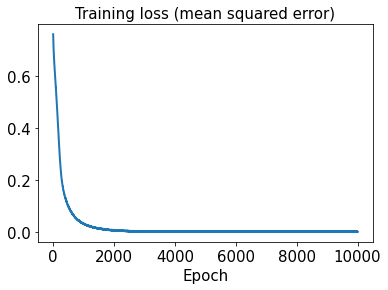

In [22]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

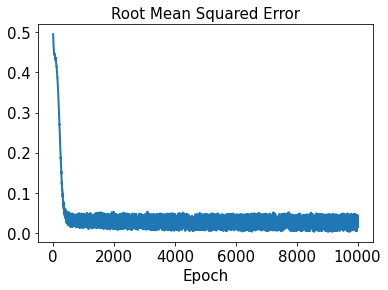

In [23]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [24]:
test_results1 = sd1.evaluate(t_test)

1/1 [==============================] - 0s 134ms/step - loss: 1.6399e-05 - rmse: 0.0000e+00


In [25]:
decoded_train1 = sd1.predict(t_train)

In [26]:
decoded_test1 = sd1.predict(t_test)

In [27]:
error_train_abs1 = np.abs(decoded_train1 - y_train1)

In [28]:
error_test_abs1 = np.abs(decoded_test1 - y_test1)

In [29]:
l2_error_train1 = np.sqrt(np.sum((decoded_train1 - y_train1)**2) / np.sum(y_train1**2))
print(l2_error_train1)

0.043546034004330623


In [30]:
l2_error_test1 = np.sqrt(np.sum((decoded_test1 - y_test1)**2) / np.sum(y_test1**2))
print(l2_error_test1)

0.04373888733338866


In [31]:
l2_error_train_list1 = []
for i in range(0, len(x_train1)):
    l2_error_train_data1 = np.sqrt(np.sum((decoded_train1[i] - y_train1[i])**2) / np.sum(y_train1[i]**2))
    l2_error_train_list1.append(l2_error_train_data1)
print(l2_error_train_list1)

[0.036723871722426464, 0.047741421682398824, 0.015659979791599058, 0.02846373335660537, 0.017581455421176808, 0.0389609147632925, 0.021643965295223225, 0.06919838264110423, 0.020315002980040957, 0.08230303400596208, 0.08074080691989186, 0.04033468555200388, 0.021725406741355834, 0.05177553095411073, 0.031979250828999835, 0.048207110070970165, 0.04599934449520563, 0.002402086563592765, 0.0527718536280149, 0.056504507020961305, 0.08482243383730602, 0.05655704353903194, 0.08347016050957891, 0.004565056330549897, 0.07880424894755929, 0.035661622816203865, 0.002767418262567146, 0.014073251047235825, 0.004886719196406845, 0.04457098261509817, 0.022118520073725802, 0.028659073374428787, 0.08485456269184771]


In [32]:
l2_error_test_list1 = []
for i in range(0, len(x_test1)):
    l2_error_test_data1 = np.sqrt(np.sum((decoded_test1[i] - y_test1[i])**2) / np.sum(y_test1[i]**2))
    l2_error_test_list1.append(l2_error_test_data1)
print(l2_error_test_list1)

[0.007326940694668117, 0.024569319204606598, 0.04269376299946811, 0.010941708608582366, 0.0565859805186859, 0.08480386082711905, 0.00978255705807575, 0.08481265054373222]


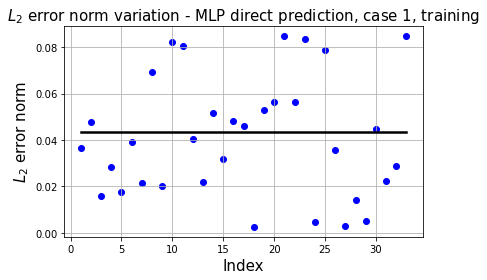

In [107]:
plt.plot(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train1*np.ones(x_train1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train1.shape[0], x_train1.shape[0]), l2_error_train_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

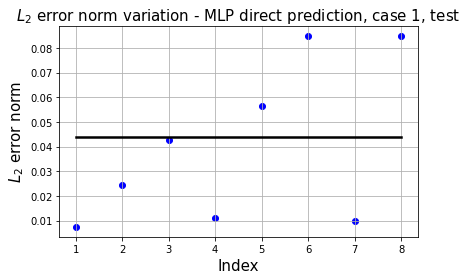

In [108]:
plt.plot(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test1*np.ones(x_test1.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test1.shape[0], x_test1.shape[0]), l2_error_test_list1, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

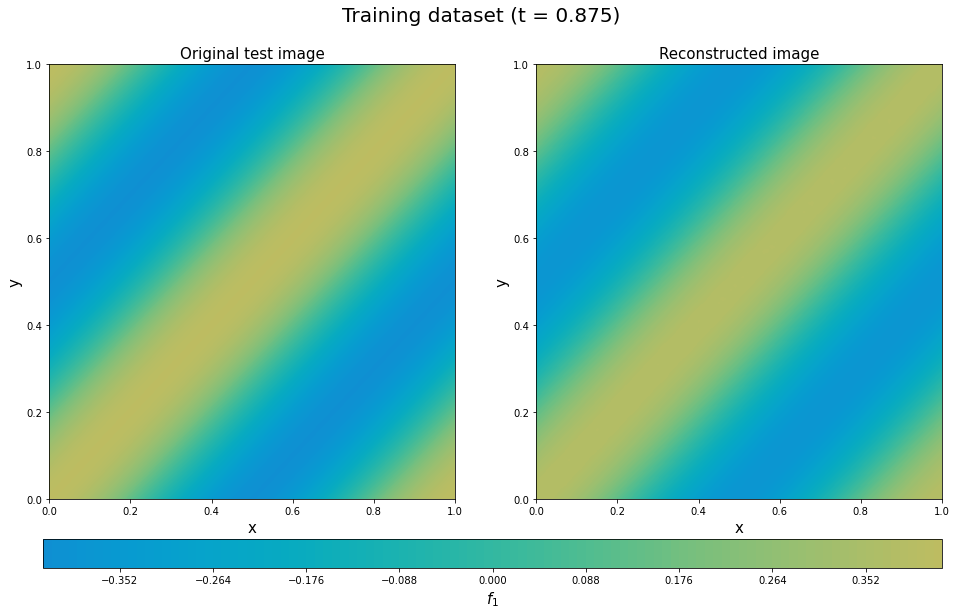

In [35]:
plt.figure(figsize=(16, 8))
y_train1_9_rotate = y_train1[9].T.reshape(101,101)
decoded_rotate1 = decoded_train1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_9_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[35]),fontsize=20)
plt.show()

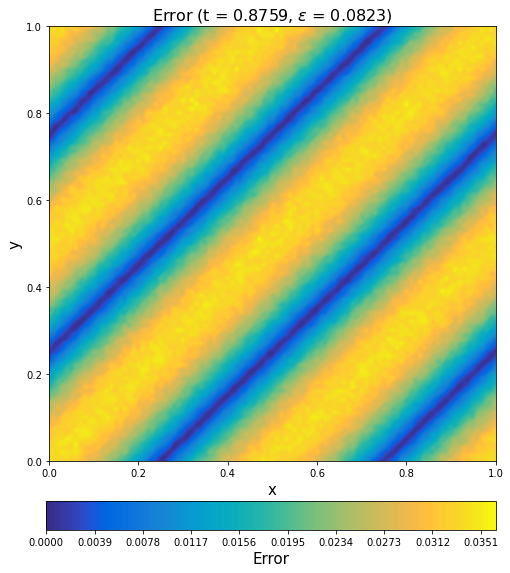

In [36]:
error_train_abs1_rotate9 = error_train_abs1[9].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate9, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.8759, $\epsilon$ = %.4f)' %(l2_error_train_list1[9]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

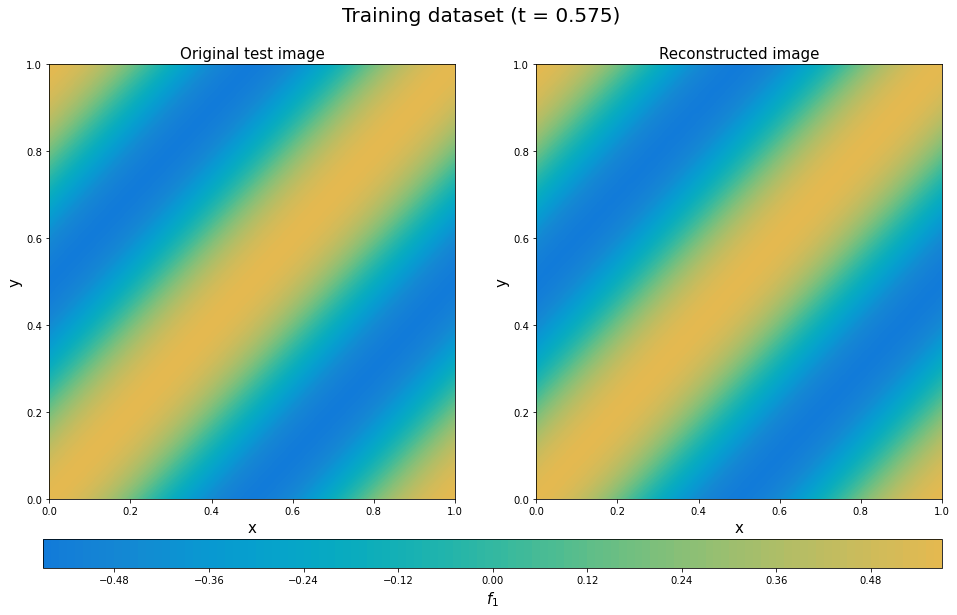

In [37]:
plt.figure(figsize=(16, 8))
y_train1_23_rotate = y_train1[23].T.reshape(101,101)
decoded_rotate1 = decoded_train1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train1_23_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[23]), fontsize=20)
plt.show()

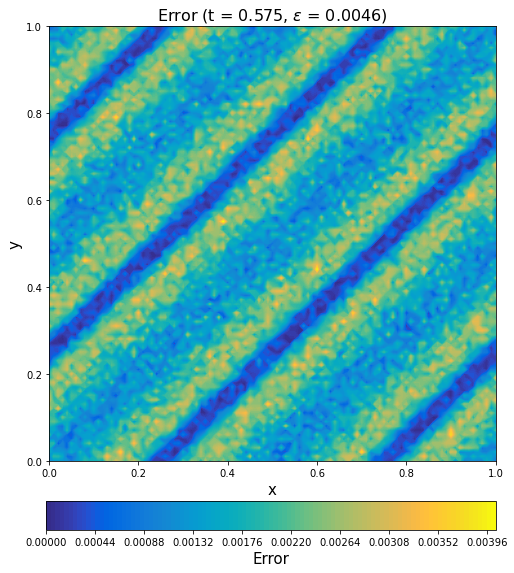

In [38]:
error_train_abs1_rotate23 = error_train_abs1[23].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs1_rotate23, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.575, $\epsilon$ = %.4f)' %(l2_error_train_list1[23]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

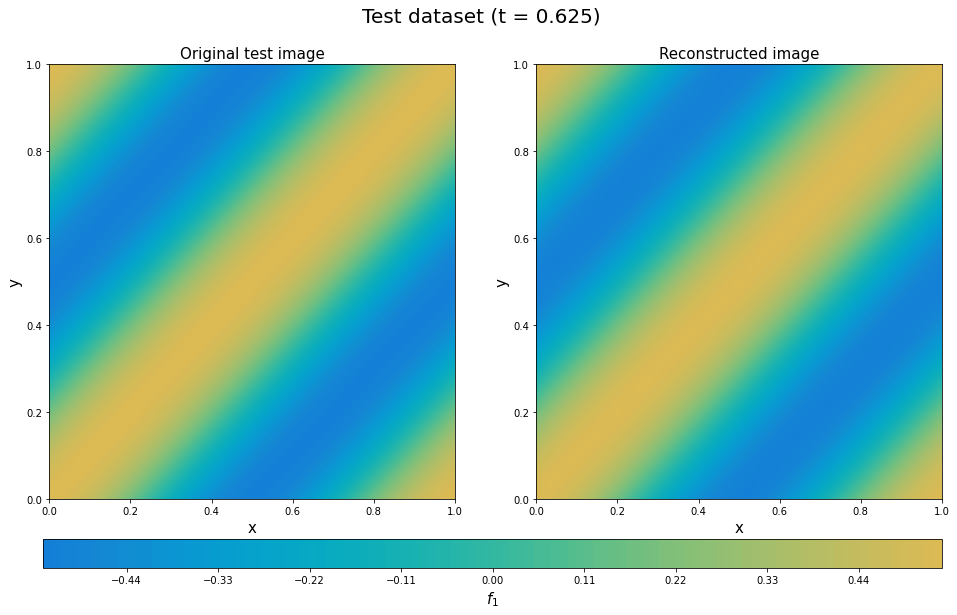

In [39]:
plt.figure(figsize=(16, 8))
y_test1_3_rotate = y_test1[3].T.reshape(101,101)
decoded_rotate1 = decoded_test1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_3_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[25]),fontsize=20)
plt.show()

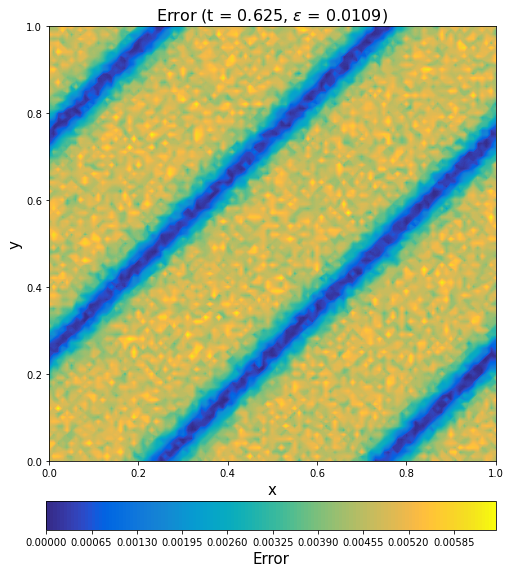

In [40]:
error_test_abs1_rotate3 = error_test_abs1[3].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate3, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.625, $\epsilon$ = %.4f)' %(l2_error_test_list1[3]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

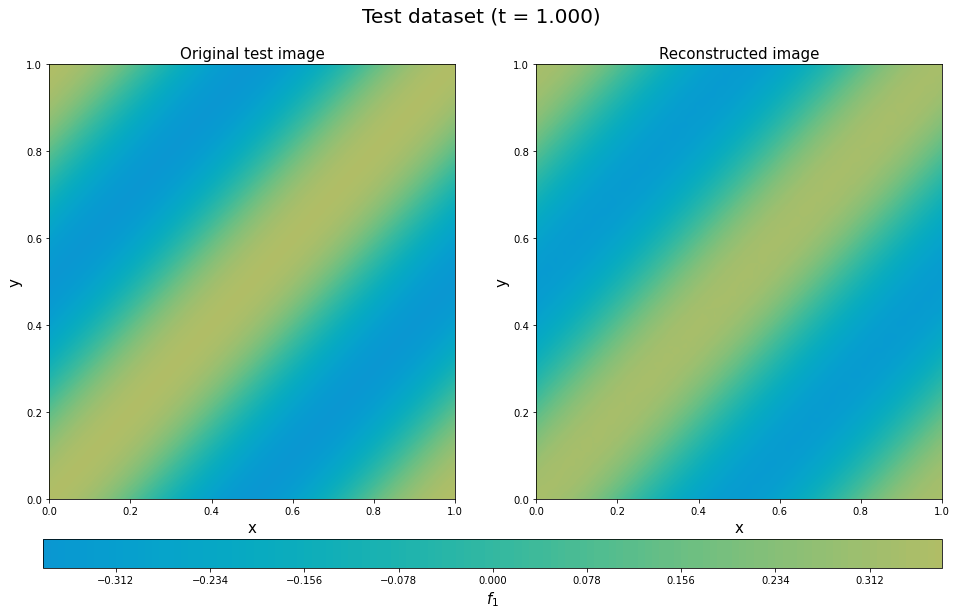

In [41]:
plt.figure(figsize=(16, 8))
y_test1_5_rotate = y_test1[5].T.reshape(101,101)
decoded_rotate1 = decoded_test1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test1_5_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate1, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-1.0,1.0)
a2.set_clim(-1.0,1.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_1$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)'  %(t[40]),fontsize=20)
plt.show()

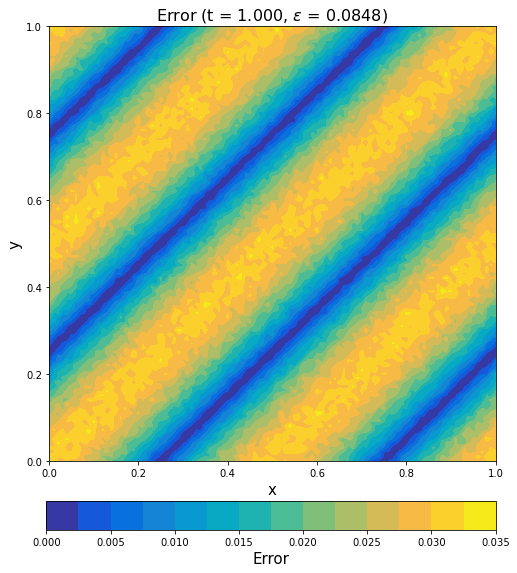

In [42]:
error_test_abs1_rotate5 = error_test_abs1[5].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs1_rotate5, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 1.000, $\epsilon$ = %.4f)' %(l2_error_test_list1[5]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 2: f2

In [43]:
out2 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out2[i, j, k] = x[j] + y[k] + t[i]

In [44]:
sensor2 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor2[i, j, k] = out2[i, 20*(j+1)+1, 20*(k+1)+1]

In [45]:
sensor2 = sensor2.reshape((41, 16, 1))

In [46]:
sensor2.shape

(41, 16, 1)

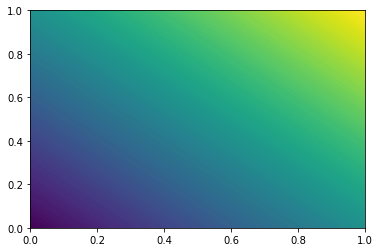

In [47]:
plt.contourf(xmesh, ymesh, out2[0,:,:], levels=128)

In [48]:
x_train2, x_test2, y_train2, y_test2, t_train, t_test = train_test_split(sensor2, out2, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [49]:
x_train2

array([[[1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945],
        [1.545],
        [1.745],
        [1.945],
        [2.145],
        [1.745],
        [1.945],
        [2.145],
        [2.345]],

       [[0.57 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [0.77 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [0.97 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.17 ],
        [1.37 ],
        [1.57 ],
        [1.77 ]],

       [[1.07 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.27 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [1.47 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [1.67 ],
        [1.87 ],
        [2.07 ],
        [2.27 ]],

       [[0.72 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [0.92 ],
        [1.12 ],
        [1.32 ],
        [1.52 ],
        [1.12 ],
        [1.32 ],
        

In [50]:
x_test2

array([[[1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [1.42 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [1.62 ],
        [1.82 ],
        [2.02 ],
        [2.22 ]],

       [[0.745],
        [0.945],
        [1.145],
        [1.345],
        [0.945],
        [1.145],
        [1.345],
        [1.545],
        [1.145],
        [1.345],
        [1.545],
        [1.745],
        [1.345],
        [1.545],
        [1.745],
        [1.945]],

       [[0.62 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [0.82 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.02 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.22 ],
        [1.42 ],
        [1.62 ],
        [1.82 ]],

       [[1.045],
        [1.245],
        [1.445],
        [1.645],
        [1.245],
        [1.445],
        [1.645],
        [1.845],
        [1.445],
        [1.645],
        

In [51]:
sd2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [52]:
start2 = datetime.datetime.now()
history2 = sd2.fit(t_train, y_train2, epochs=10000, shuffle=True)
end2 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 21ms/step - loss: 2.6879 - rmse: 1.6395
Epoch 2/10000
2/2 [==============================] - 0s 20ms/step - loss: 2.6727 - rmse: 1.6348
Epoch 3/10000
2/2 [==============================] - 0s 19ms/step - loss: 2.6596 - rmse: 1.6308
Epoch 4/10000
2/2 [==============================] - 0s 19ms/step - loss: 2.6491 - rmse: 1.6276
Epoch 5/10000
2/2 [==============================] - 0s 19ms/step - loss: 2.6399 - rmse: 1.6248
Epoch 6/10000
2/2 [==============================] - 0s 18ms/step - loss: 2.6319 - rmse: 1.6223
Epoch 7/10000
2/2 [==============================] - 0s 18ms/step - loss: 2.6244 - rmse: 1.6200
Epoch 8/10000
2/2 [==============================] - 0s 18ms/step - loss: 2.6166 - rmse: 1.6176
Epoch 9/10000
2/2 [==============================] - 0s 18ms/step - loss: 2.6084 - rmse: 1.6150
Epoch 10/10000
2/2 [==============================] - 0s 18ms/step - loss: 2.6003 - rmse: 1.6125
Epoch 11/10000
2/2 [===================

2/2 [==============================] - 0s 15ms/step - loss: 2.0301 - rmse: 1.4248
Epoch 86/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.0256 - rmse: 1.4232
Epoch 87/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.0202 - rmse: 1.4213
Epoch 88/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.0120 - rmse: 1.4184
Epoch 89/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.0100 - rmse: 1.4177
Epoch 90/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.9986 - rmse: 1.4137
Epoch 91/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.9919 - rmse: 1.4113
Epoch 92/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.9857 - rmse: 1.4091
Epoch 93/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.9793 - rmse: 1.4068
Epoch 94/10000
2/2 [==============================] - 0s 15ms/step - loss: 1.9750 - rmse: 1.4053
Epoch 95/10000
2/2 [=========================

2/2 [==============================] - 0s 14ms/step - loss: 1.4579 - rmse: 1.2074
Epoch 169/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.4512 - rmse: 1.2046
Epoch 170/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.4439 - rmse: 1.2016
Epoch 171/10000
2/2 [==============================] - 0s 15ms/step - loss: 1.4368 - rmse: 1.1986
Epoch 172/10000
2/2 [==============================] - 0s 15ms/step - loss: 1.4343 - rmse: 1.1976
Epoch 173/10000
2/2 [==============================] - 0s 15ms/step - loss: 1.4213 - rmse: 1.1921
Epoch 174/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.4178 - rmse: 1.1907
Epoch 175/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.4102 - rmse: 1.1875
Epoch 176/10000
2/2 [==============================] - 0s 15ms/step - loss: 1.4049 - rmse: 1.1852
Epoch 177/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.3985 - rmse: 1.1825
Epoch 178/10000
2/2 [===============

2/2 [==============================] - 0s 14ms/step - loss: 0.8772 - rmse: 0.9365
Epoch 252/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.8738 - rmse: 0.9347
Epoch 253/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.8657 - rmse: 0.9304
Epoch 254/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.8620 - rmse: 0.9284
Epoch 255/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.8533 - rmse: 0.9237
Epoch 256/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.8526 - rmse: 0.9233
Epoch 257/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.8458 - rmse: 0.9196
Epoch 258/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.8372 - rmse: 0.9149
Epoch 259/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.8302 - rmse: 0.9111
Epoch 260/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.8272 - rmse: 0.9095
Epoch 261/10000
2/2 [===============

2/2 [==============================] - 0s 14ms/step - loss: 0.4489 - rmse: 0.6699
Epoch 335/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.4441 - rmse: 0.6664
Epoch 336/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.4422 - rmse: 0.6649
Epoch 337/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.4372 - rmse: 0.6611
Epoch 338/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.4384 - rmse: 0.6621
Epoch 339/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.4308 - rmse: 0.6563
Epoch 340/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.4240 - rmse: 0.6511
Epoch 341/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.4194 - rmse: 0.6475
Epoch 342/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.4153 - rmse: 0.6444
Epoch 343/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.4114 - rmse: 0.6413
Epoch 344/10000
2/2 [===============

2/2 [==============================] - 0s 14ms/step - loss: 0.2037 - rmse: 0.4513
Epoch 418/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.2003 - rmse: 0.4475
Epoch 419/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.1961 - rmse: 0.4428
Epoch 420/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.1948 - rmse: 0.4413
Epoch 421/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.1963 - rmse: 0.4430
Epoch 422/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.1945 - rmse: 0.4409
Epoch 423/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.1936 - rmse: 0.4399
Epoch 424/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.1881 - rmse: 0.4336
Epoch 425/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.1857 - rmse: 0.4308
Epoch 426/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.1874 - rmse: 0.4329
Epoch 427/10000
2/2 [===============

2/2 [==============================] - 0s 13ms/step - loss: 0.0836 - rmse: 0.2891
Epoch 501/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0817 - rmse: 0.2857
Epoch 502/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0817 - rmse: 0.2858
Epoch 503/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0869 - rmse: 0.2947
Epoch 504/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0847 - rmse: 0.2909
Epoch 505/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0778 - rmse: 0.2788
Epoch 506/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0780 - rmse: 0.2792
Epoch 507/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0782 - rmse: 0.2795
Epoch 508/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0762 - rmse: 0.2759
Epoch 509/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0744 - rmse: 0.2726
Epoch 510/10000
2/2 [===============

2/2 [==============================] - 0s 14ms/step - loss: 0.0312 - rmse: 0.1765
Epoch 584/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0351 - rmse: 0.1871
Epoch 585/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0325 - rmse: 0.1800
Epoch 586/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0284 - rmse: 0.1683
Epoch 587/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0281 - rmse: 0.1674
Epoch 588/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0289 - rmse: 0.1700
Epoch 589/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0283 - rmse: 0.1679
Epoch 590/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0270 - rmse: 0.1640
Epoch 591/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0307 - rmse: 0.1750
Epoch 592/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0264 - rmse: 0.1622
Epoch 593/10000
2/2 [===============

2/2 [==============================] - 0s 14ms/step - loss: 0.0144 - rmse: 0.1197
Epoch 667/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0104 - rmse: 0.1015
Epoch 668/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0178 - rmse: 0.1332
Epoch 669/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0105 - rmse: 0.1023
Epoch 670/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0121 - rmse: 0.1098
Epoch 671/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0137 - rmse: 0.1168
Epoch 672/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0107 - rmse: 0.1031
Epoch 673/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0151 - rmse: 0.1226
Epoch 674/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0099 - rmse: 0.0990
Epoch 675/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0120 - rmse: 0.1092
Epoch 676/10000
2/2 [===============

2/2 [==============================] - 0s 18ms/step - loss: 0.0075 - rmse: 0.0860
Epoch 750/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0060 - rmse: 0.0768
Epoch 751/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 752/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0585
Epoch 753/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0034 - rmse: 0.0578
Epoch 754/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0085 - rmse: 0.0920
Epoch 755/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0106 - rmse: 0.1027
Epoch 756/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0057 - rmse: 0.0748
Epoch 757/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0052 - rmse: 0.0715
Epoch 758/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0090 - rmse: 0.0944
Epoch 759/10000
2/2 [===============

2/2 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0425
Epoch 833/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0424
Epoch 834/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 835/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 836/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0389
Epoch 837/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 838/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0045 - rmse: 0.0666
Epoch 839/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0079 - rmse: 0.0887
Epoch 840/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 841/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - rmse: 0.0452
Epoch 842/10000
2/2 [===============

2/2 [==============================] - 0s 14ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 916/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 917/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 918/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 919/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0347
Epoch 920/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 921/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 922/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0028 - rmse: 0.0520
Epoch 923/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 924/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0025 - rmse: 0.0494
Epoch 925/10000
2/2 [===============

Epoch 998/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0070 - rmse: 0.0832
Epoch 999/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.9263e-04 - rmse: 0.0119
Epoch 1000/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.1644e-04 - rmse: 0.0294
Epoch 1001/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0049 - rmse: 0.0693
Epoch 1002/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 1003/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 1004/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0074 - rmse: 0.0856
Epoch 1005/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.5720e-04 - rmse: 0.0175
Epoch 1006/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.8026e-04 - rmse: 0.0288
Epoch 1007/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0050 - rmse: 0.0

2/2 [==============================] - 0s 14ms/step - loss: 3.3428e-04 - rmse: 0.0169
Epoch 1081/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 1082/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 1083/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.2607e-04 - rmse: 0.0166
Epoch 1084/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0367
Epoch 1085/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.3476e-04 - rmse: 0.0093
Epoch 1086/10000
2/2 [==============================] - 0s 14ms/step - loss: 3.9969e-04 - rmse: 0.0187
Epoch 1087/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.5197e-04 - rmse: 0.0101
Epoch 1088/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.5178e-04 - rmse: 0.0101
Epoch 1089/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.0999e-04 - rmse: 0.0127

2/2 [==============================] - 0s 14ms/step - loss: 7.3648e-04 - rmse: 0.0262
Epoch 1163/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 1164/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.3086e-04 - rmse: 0.0261
Epoch 1165/10000
2/2 [==============================] - 0s 13ms/step - loss: 7.3429e-04 - rmse: 0.0262
Epoch 1166/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0035 - rmse: 0.0585
Epoch 1167/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 1168/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 1169/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 1170/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 1171/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.4649e-04 - rmse: 0.0223
Epoch 1172/

2/2 [==============================] - 0s 14ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 1245/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0034 - rmse: 0.0583
Epoch 1246/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.8841e-04 - rmse: 0.0233
Epoch 1247/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.4117e-04 - rmse: 0.0244
Epoch 1248/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 1249/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0044 - rmse: 0.0659
Epoch 1250/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0083 - rmse: 0.0908
Epoch 1251/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0011 - rmse: 0.0318
Epoch 1252/10000
2/2 [==============================] - 0s 18ms/step - loss: 9.4484e-04 - rmse: 0.0300
Epoch 1253/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 1254/1000

2/2 [==============================] - 0s 14ms/step - loss: 0.0059 - rmse: 0.0764
Epoch 1327/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0310
Epoch 1328/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0024 - rmse: 0.0481
Epoch 1329/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 1330/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 1331/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.0731e-04 - rmse: 0.0257
Epoch 1332/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0044 - rmse: 0.0659
Epoch 1333/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 1334/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0054 - rmse: 0.0733
Epoch 1335/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 1336/10000
2/2 [=

2/2 [==============================] - 0s 13ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 1409/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0049 - rmse: 0.0696
Epoch 1410/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0027 - rmse: 0.0520
Epoch 1411/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 1412/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 1413/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 1414/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.8134e-04 - rmse: 0.0154
Epoch 1415/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0037 - rmse: 0.0603
Epoch 1416/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 1417/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0064 - rmse: 0.0799
Epoch 1418/10000
2/2 [=

2/2 [==============================] - 0s 14ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 1491/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0390
Epoch 1492/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.2089e-04 - rmse: 0.0167
Epoch 1493/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0026 - rmse: 0.0503
Epoch 1494/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 1495/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0375
Epoch 1496/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0077 - rmse: 0.0875
Epoch 1497/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.6233e-04 - rmse: 0.0179
Epoch 1498/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 1499/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 1500/10000
2/

Epoch 1572/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0023 - rmse: 0.0471
Epoch 1573/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0041 - rmse: 0.0636
Epoch 1574/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0066 - rmse: 0.0812
Epoch 1575/10000
2/2 [==============================] - 0s 14ms/step - loss: 9.2048e-04 - rmse: 0.0296
Epoch 1576/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0070 - rmse: 0.0832
Epoch 1577/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0053 - rmse: 0.0724
Epoch 1578/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 1579/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.9985e-04 - rmse: 0.0161
Epoch 1580/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.7148e-04 - rmse: 0.0152
Epoch 1581/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.0063e-05 - rmse: 0

2/2 [==============================] - 0s 14ms/step - loss: 1.8644e-04 - rmse: 0.0121
Epoch 1654/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 1655/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0070 - rmse: 0.0833
Epoch 1656/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0055 - rmse: 0.0738
Epoch 1657/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0048 - rmse: 0.0687
Epoch 1658/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0033 - rmse: 0.0569
Epoch 1659/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 1660/10000
2/2 [==============================] - 0s 15ms/step - loss: 5.7808e-04 - rmse: 0.0232
Epoch 1661/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 1662/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.3224e-04 - rmse: 0.0096
Epoch 1663/1000

2/2 [==============================] - 0s 14ms/step - loss: 6.6789e-04 - rmse: 0.0251
Epoch 1735/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0063 - rmse: 0.0791
Epoch 1736/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.3980e-04 - rmse: 0.0265
Epoch 1737/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0026 - rmse: 0.0501
Epoch 1738/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 1739/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.6460e-04 - rmse: 0.0229
Epoch 1740/10000
2/2 [==============================] - 0s 14ms/step - loss: 5.7841e-04 - rmse: 0.0232
Epoch 1741/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0072 - rmse: 0.0843
Epoch 1742/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 1743/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.1662e-04 - rmse: 0.0240
Epoch 1

2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 1817/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 1818/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.6801e-04 - rmse: 0.0181
Epoch 1819/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 1820/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0069 - rmse: 0.0826
Epoch 1821/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 1822/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 1823/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.9677e-04 - rmse: 0.0214
Epoch 1824/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0049 - rmse: 0.0694
Epoch 1825/10000
2/2 [==============================] - 0s 14ms/step - loss: 4.8706e-04 - rmse: 0.0212
Epoch 1826/1000

2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 1898/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.1528e-04 - rmse: 0.0088
Epoch 1899/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 1900/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.0121e-04 - rmse: 0.0128
Epoch 1901/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 1902/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.0094e-04 - rmse: 0.0128
Epoch 1903/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 1904/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0022 - rmse: 0.0468
Epoch 1905/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0038 - rmse: 0.0610
Epoch 1906/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0038 - rmse: 0.0610
Epoch 1907/1000

2/2 [==============================] - 0s 14ms/step - loss: 0.0065 - rmse: 0.0802
Epoch 1980/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0051 - rmse: 0.0714
Epoch 1981/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0082 - rmse: 0.0904
Epoch 1982/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0047 - rmse: 0.0682
Epoch 1983/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.0044e-04 - rmse: 0.0237
Epoch 1984/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 1985/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0032 - rmse: 0.0560
Epoch 1986/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 1987/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0022 - rmse: 0.0469
Epoch 1988/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 1989/10000
2/2 [=

2/2 [==============================] - 0s 15ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 2062/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 2063/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.3366e-04 - rmse: 0.0264
Epoch 2064/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 2065/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0076 - rmse: 0.0869
Epoch 2066/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 2067/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0064 - rmse: 0.0801
Epoch 2068/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 2069/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 2070/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.0679e-04 - rmse: 0.0278
Epoch 2071/10000
2/

2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 2144/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0021 - rmse: 0.0450
Epoch 2145/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0079 - rmse: 0.0885
Epoch 2146/10000
2/2 [==============================] - 0s 14ms/step - loss: 7.2196e-04 - rmse: 0.0262
Epoch 2147/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0015 - rmse: 0.0388
Epoch 2148/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0066 - rmse: 0.0813
Epoch 2149/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 2150/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0067 - rmse: 0.0818
Epoch 2151/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0040 - rmse: 0.0627
Epoch 2152/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0013 - rmse: 0.0351
Epoch 2153/10000
2/2 [=

2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 2226/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0363
Epoch 2227/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0037 - rmse: 0.0602
Epoch 2228/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 2229/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 2230/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.0996e-04 - rmse: 0.0240
Epoch 2231/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 2232/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 2233/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0064 - rmse: 0.0799
Epoch 2234/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.8034e-04 - rmse: 0.0291
Epoch 2235/10000
2/

2/2 [==============================] - 0s 14ms/step - loss: 4.8119e-04 - rmse: 0.0211
Epoch 2308/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.3329e-04 - rmse: 0.0099
Epoch 2309/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 2310/10000
2/2 [==============================] - 0s 14ms/step - loss: 1.2177e-04 - rmse: 0.0093
Epoch 2311/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 2312/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0076 - rmse: 0.0872
Epoch 2313/10000
2/2 [==============================] - 0s 14ms/step - loss: 6.4643e-04 - rmse: 0.0247
Epoch 2314/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 2315/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 2316/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 2317/

2/2 [==============================] - 0s 14ms/step - loss: 2.5036e-04 - rmse: 0.0147
Epoch 2389/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0077 - rmse: 0.0874
Epoch 2390/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0062 - rmse: 0.0783
Epoch 2391/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0019 - rmse: 0.0437
Epoch 2392/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.8648e-04 - rmse: 0.0255
Epoch 2393/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 2394/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0061 - rmse: 0.0781
Epoch 2395/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0062 - rmse: 0.0785
Epoch 2396/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.8632e-04 - rmse: 0.0158
Epoch 2397/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.6433e-04 - rmse: 0.0151
Epoch 2398/

2/2 [==============================] - 0s 14ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 2471/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0083 - rmse: 0.0909
Epoch 2472/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 2473/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0020 - rmse: 0.0440
Epoch 2474/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0042 - rmse: 0.0645
Epoch 2475/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 2476/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0051 - rmse: 0.0714
Epoch 2477/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0460
Epoch 2478/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 2479/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0010 - rmse: 0.0315
Epoch 2480/10000
2/2 [=====

2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 2553/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0314
Epoch 2554/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0051 - rmse: 0.0710
Epoch 2555/10000
2/2 [==============================] - 0s 15ms/step - loss: 9.8872e-04 - rmse: 0.0309
Epoch 2556/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0010 - rmse: 0.0314
Epoch 2557/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0363
Epoch 2558/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0047 - rmse: 0.0679
Epoch 2559/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0048 - rmse: 0.0688
Epoch 2560/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 2561/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0048 - rmse: 0.0687
Epoch 2562/10000
2/2 [=

Epoch 2634/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 2635/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 2636/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 2637/10000
2/2 [==============================] - 0s 18ms/step - loss: 1.3759e-04 - rmse: 0.0101
Epoch 2638/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 2639/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0078 - rmse: 0.0880
Epoch 2640/10000
2/2 [==============================] - 0s 18ms/step - loss: 5.4087e-04 - rmse: 0.0225
Epoch 2641/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 2642/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 2643/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.3392e-04 - rmse: 0.014

2/2 [==============================] - 0s 15ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 2717/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0047 - rmse: 0.0682
Epoch 2718/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 2719/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 2720/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 2721/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 2722/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0016 - rmse: 0.0400
Epoch 2723/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 2724/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0062 - rmse: 0.0787
Epoch 2725/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.0308e-04 - rmse: 0.0130
Epoch 2726/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 5.0357e-04 - rmse: 0.0217
Epoch 2799/10000
2/2 [==============================] - 0s 9ms/step - loss: 5.4126e-04 - rmse: 0.0225
Epoch 2800/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0057 - rmse: 0.0750
Epoch 2801/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0743
Epoch 2802/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.8744e-04 - rmse: 0.0188
Epoch 2803/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0513
Epoch 2804/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0018 - rmse: 0.0423
Epoch 2805/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 2806/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 2807/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 2808/10000
2/2 [

2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0610
Epoch 2881/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8642e-04 - rmse: 0.0124
Epoch 2882/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 2883/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0594
Epoch 2884/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0053 - rmse: 0.0723
Epoch 2885/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 2886/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9245e-04 - rmse: 0.0126
Epoch 2887/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.8139e-04 - rmse: 0.0255
Epoch 2888/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0054 - rmse: 0.0730
Epoch 2889/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 2890/10000
2/2

2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - rmse: 0.0973
Epoch 2963/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0028 - rmse: 0.0527
Epoch 2964/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0777
Epoch 2965/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 2966/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0728
Epoch 2967/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0086 - rmse: 0.0924
Epoch 2968/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 2969/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.4719e-04 - rmse: 0.0285
Epoch 2970/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0707
Epoch 2971/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.7781e-04 - rmse: 0.0234
Epoch 2972/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 3045/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 3046/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.8341e-04 - rmse: 0.0292
Epoch 3047/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 3048/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0682
Epoch 3049/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6168e-04 - rmse: 0.0114
Epoch 3050/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 3051/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 3052/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 3053/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 3054/10000
2/2

2/2 [==============================] - 0s 10ms/step - loss: 0.0067 - rmse: 0.0815
Epoch 3127/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0042 - rmse: 0.0649
Epoch 3128/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0666
Epoch 3129/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 3130/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0010 - rmse: 0.0316
Epoch 3131/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0347
Epoch 3132/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0402
Epoch 3133/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.5844e-04 - rmse: 0.0230
Epoch 3134/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0072 - rmse: 0.0848
Epoch 3135/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 3136/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0627
Epoch 3209/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0805
Epoch 3210/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0082 - rmse: 0.0904
Epoch 3211/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 3212/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 3213/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0682
Epoch 3214/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 3215/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.1188e-04 - rmse: 0.0297
Epoch 3216/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 3217/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 3218/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0735
Epoch 3291/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 3292/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.2121e-04 - rmse: 0.0095
Epoch 3293/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.1494e-04 - rmse: 0.0297
Epoch 3294/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0392
Epoch 3295/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0037 - rmse: 0.0609
Epoch 3296/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 3297/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 3298/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 3299/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9625e-04 - rmse: 0.0163
Epoch 3300/10000


2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 3372/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 3373/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 3374/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0079 - rmse: 0.0886
Epoch 3375/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0077 - rmse: 0.0874
Epoch 3376/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.0951e-04 - rmse: 0.0296
Epoch 3377/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.7397e-04 - rmse: 0.0290
Epoch 3378/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0079 - rmse: 0.0886
Epoch 3379/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.8745e-04 - rmse: 0.0236
Epoch 3380/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 3381/1000

2/2 [==============================] - 0s 10ms/step - loss: 0.0091 - rmse: 0.0953
Epoch 3454/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0833
Epoch 3455/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0367
Epoch 3456/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 3457/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 3458/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.8449e-04 - rmse: 0.0292
Epoch 3459/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0628
Epoch 3460/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0658
Epoch 3461/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0496
Epoch 3462/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 3463/10000
2/2 [===

2/2 [==============================] - 0s 13ms/step - loss: 0.0081 - rmse: 0.0898
Epoch 3536/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.7340e-04 - rmse: 0.0307
Epoch 3537/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.5952e-04 - rmse: 0.0230
Epoch 3538/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0586
Epoch 3539/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0541
Epoch 3540/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0313
Epoch 3541/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 3542/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0796
Epoch 3543/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 3544/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 3545/10000
2/

2/2 [==============================] - 0s 13ms/step - loss: 0.0070 - rmse: 0.0833
Epoch 3618/10000
2/2 [==============================] - 0s 9ms/step - loss: 6.7963e-04 - rmse: 0.0255
Epoch 3619/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 3620/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 3621/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0050 - rmse: 0.0707
Epoch 3622/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.9930e-04 - rmse: 0.0239
Epoch 3623/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0190e-04 - rmse: 0.0217
Epoch 3624/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.2069e-04 - rmse: 0.0221
Epoch 3625/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 3626/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0542
Epoch 3627/1

2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0337
Epoch 3699/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 3700/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0413
Epoch 3701/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0059 - rmse: 0.0765
Epoch 3702/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.5648e-04 - rmse: 0.0181
Epoch 3703/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0585
Epoch 3704/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0586
Epoch 3705/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.6386e-04 - rmse: 0.0208
Epoch 3706/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0634
Epoch 3707/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 3708/10000
2/2

2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 3780/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 3781/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0076 - rmse: 0.0869
Epoch 3782/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0392
Epoch 3783/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 3784/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 3785/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1310e-04 - rmse: 0.0091
Epoch 3786/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 3787/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 3788/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 3789/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0789
Epoch 3862/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 3863/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 3864/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1913e-04 - rmse: 0.0138
Epoch 3865/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.2165e-05 - rmse: 0.0066
Epoch 3866/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 3867/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.6994e-04 - rmse: 0.0155
Epoch 3868/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0680
Epoch 3869/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0737
Epoch 3870/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.4248e-04 - rmse: 0.0177
Epoch 3871/

2/2 [==============================] - 0s 12ms/step - loss: 1.8241e-04 - rmse: 0.0124
Epoch 3943/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0038 - rmse: 0.0617
Epoch 3944/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.2254e-04 - rmse: 0.0171
Epoch 3945/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 3946/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.8117e-04 - rmse: 0.0188
Epoch 3947/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0666
Epoch 3948/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0788
Epoch 3949/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 3950/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 3951/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0062 - rmse: 0.0785
Epoch 3952/1000

2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0839
Epoch 4025/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3536e-04 - rmse: 0.0144
Epoch 4026/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0078 - rmse: 0.0880
Epoch 4027/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.0805e-04 - rmse: 0.0241
Epoch 4028/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.9055e-04 - rmse: 0.0294
Epoch 4029/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 4030/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 4031/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.8152e-04 - rmse: 0.0159
Epoch 4032/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.7474e-04 - rmse: 0.0254
Epoch 4033/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 4034

2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0478
Epoch 4106/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0057 - rmse: 0.0756
Epoch 4107/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.3461e-04 - rmse: 0.0175
Epoch 4108/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 4109/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.8214e-04 - rmse: 0.0309
Epoch 4110/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 4111/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.8020e-04 - rmse: 0.0188
Epoch 4112/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 4113/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 4114/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 4115/1000

2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 4188/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0017 - rmse: 0.0410
Epoch 4189/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 4190/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0656
Epoch 4191/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.0886e-04 - rmse: 0.0261
Epoch 4192/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0076 - rmse: 0.0868
Epoch 4193/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 4194/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0823
Epoch 4195/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 4196/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 4197/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 2.4833e-04 - rmse: 0.0149
Epoch 4270/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 4271/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.9874e-04 - rmse: 0.0131
Epoch 4272/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 4273/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0628e-04 - rmse: 0.0089
Epoch 4274/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1370e-04 - rmse: 0.0093
Epoch 4275/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0077 - rmse: 0.0874
Epoch 4276/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0359
Epoch 4277/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.8862e-04 - rmse: 0.0257
Epoch 4278/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4068e-04 - rmse: 0.0106
Epo

2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 4351/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 4352/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 4353/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0436
Epoch 4354/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 4355/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 4356/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0740
Epoch 4357/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 4358/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0643
Epoch 4359/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0396
Epoch 4360/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 1.4012e-04 - rmse: 0.0106
Epoch 4433/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0818
Epoch 4434/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 4435/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 4436/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0503
Epoch 4437/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0666
Epoch 4438/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.4068e-04 - rmse: 0.0248
Epoch 4439/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0750
Epoch 4440/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0587
Epoch 4441/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.4118e-04 - rmse: 0.0248
Epoch 4442/1000

2/2 [==============================] - 0s 10ms/step - loss: 1.8515e-04 - rmse: 0.0126
Epoch 4514/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 4515/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.5207e-04 - rmse: 0.0180
Epoch 4516/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.2379e-04 - rmse: 0.0223
Epoch 4517/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 4518/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0872
Epoch 4519/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 4520/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0559
Epoch 4521/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 4522/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 4523/1000

2/2 [==============================] - 0s 11ms/step - loss: 6.9624e-04 - rmse: 0.0259
Epoch 4596/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.8735e-04 - rmse: 0.0310
Epoch 4597/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.5875e-04 - rmse: 0.0115
Epoch 4598/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.3490e-04 - rmse: 0.0202
Epoch 4599/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 4600/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0391
Epoch 4601/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0732
Epoch 4602/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 4603/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0686
Epoch 4604/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0592
Epoch 4605/1

2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0679
Epoch 4678/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0742
Epoch 4679/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6768e-04 - rmse: 0.0155
Epoch 4680/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0056 - rmse: 0.0749
Epoch 4681/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0512
Epoch 4682/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.9625e-04 - rmse: 0.0130
Epoch 4683/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 4684/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 4685/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.9071e-04 - rmse: 0.0128
Epoch 4686/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 4687/10000


2/2 [==============================] - 0s 11ms/step - loss: 6.6431e-04 - rmse: 0.0252
Epoch 4759/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0611
Epoch 4760/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0049 - rmse: 0.0696
Epoch 4761/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 4762/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0068 - rmse: 0.0821
Epoch 4763/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 4764/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 4765/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.2505e-04 - rmse: 0.0099
Epoch 4766/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.8391e-04 - rmse: 0.0160
Epoch 4767/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0068 - rmse: 0.0821
Epoch 4768/10000

2/2 [==============================] - 0s 10ms/step - loss: 1.8537e-04 - rmse: 0.0126
Epoch 4841/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9239e-04 - rmse: 0.0163
Epoch 4842/10000
2/2 [==============================] - 0s 9ms/step - loss: 1.8283e-04 - rmse: 0.0125
Epoch 4843/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.1509e-05 - rmse: 0.0067
Epoch 4844/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0559
Epoch 4845/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.0384e-04 - rmse: 0.0088
Epoch 4846/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 4847/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.4668e-04 - rmse: 0.0286
Epoch 4848/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0740
Epoch 4849/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0422
Epoch

2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0513
Epoch 4922/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0391
Epoch 4923/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 4924/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 4925/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0499
Epoch 4926/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0531
Epoch 4927/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0062 - rmse: 0.0783
Epoch 4928/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0530
Epoch 4929/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 4930/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 4931/10000
2/2 [=====

2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0637
Epoch 5004/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 5005/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 5006/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9270e-04 - rmse: 0.0163
Epoch 5007/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 5008/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0556
Epoch 5009/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0351
Epoch 5010/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0876
Epoch 5011/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.1773e-05 - rmse: 0.0067
Epoch 5012/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.0203e-04 - rmse: 0.0087
Epoch 5013/10000
2

2/2 [==============================] - 0s 12ms/step - loss: 7.6297e-04 - rmse: 0.0271
Epoch 5086/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0686
Epoch 5087/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.5493e-04 - rmse: 0.0305
Epoch 5088/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0055 - rmse: 0.0738
Epoch 5089/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0718
Epoch 5090/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0643
Epoch 5091/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0567
Epoch 5092/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.6446e-04 - rmse: 0.0306
Epoch 5093/10000
2/2 [==============================] - 0s 13ms/step - loss: 9.8880e-04 - rmse: 0.0310
Epoch 5094/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0578
Epoch 5095/

2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 5168/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.6253e-04 - rmse: 0.0154
Epoch 5169/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0785
Epoch 5170/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 5171/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0415
Epoch 5172/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.8465e-04 - rmse: 0.0126
Epoch 5173/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 5174/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 5175/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 5176/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 5177/10000
2/

Epoch 5249/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 5250/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.8359e-04 - rmse: 0.0236
Epoch 5251/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.3251e-04 - rmse: 0.0202
Epoch 5252/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0057 - rmse: 0.0751
Epoch 5253/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.3424e-04 - rmse: 0.0144
Epoch 5254/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.3447e-04 - rmse: 0.0202
Epoch 5255/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0692
Epoch 5256/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.3942e-04 - rmse: 0.0107
Epoch 5257/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0470
Epoch 5258/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.7843e-04 -

2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0682
Epoch 5331/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.1940e-04 - rmse: 0.0097
Epoch 5332/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.6296e-04 - rmse: 0.0154
Epoch 5333/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 5334/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 5335/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.3033e-04 - rmse: 0.0284
Epoch 5336/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0593
Epoch 5337/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.7114e-04 - rmse: 0.0121
Epoch 5338/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.3822e-05 - rmse: 0.0082
Epoch 5339/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 5

2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0503
Epoch 5413/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 5414/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0415
Epoch 5415/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.2251e-04 - rmse: 0.0282
Epoch 5416/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 5417/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0389
Epoch 5418/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0076 - rmse: 0.0873
Epoch 5419/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 5420/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 5421/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.4932e-04 - rmse: 0.0206
Epoch 5422/10000
2/

2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 5495/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0831
Epoch 5496/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0772
Epoch 5497/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0550
Epoch 5498/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0330
Epoch 5499/10000
2/2 [==============================] - 0s 13ms/step - loss: 8.2342e-04 - rmse: 0.0282
Epoch 5500/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 5501/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 5502/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6477e-04 - rmse: 0.0118
Epoch 5503/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0601
Epoch 5504/10000
2/

2/2 [==============================] - 0s 10ms/step - loss: 6.5271e-04 - rmse: 0.0250
Epoch 5577/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 5578/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 5579/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 5580/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0069 - rmse: 0.0828
Epoch 5581/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0680
Epoch 5582/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0724
Epoch 5583/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.7509e-04 - rmse: 0.0122
Epoch 5584/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.4803e-04 - rmse: 0.0111
Epoch 5585/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0696
Epoch 5586/1000

2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0399
Epoch 5658/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0522
Epoch 5659/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 5660/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 5661/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0786
Epoch 5662/10000
2/2 [==============================] - 0s 13ms/step - loss: 6.4321e-04 - rmse: 0.0249
Epoch 5663/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 5664/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0070 - rmse: 0.0832
Epoch 5665/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 5666/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0044 - rmse: 0.0658
Epoch 5667/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 3.9699e-04 - rmse: 0.0193
Epoch 5740/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 5741/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.5976e-04 - rmse: 0.0271
Epoch 5742/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0070 - rmse: 0.0837
Epoch 5743/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0524
Epoch 5744/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0782
Epoch 5745/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.6311e-04 - rmse: 0.0184
Epoch 5746/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.8240e-04 - rmse: 0.0214
Epoch 5747/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0707
Epoch 5748/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0745
Epoch 5749/

2/2 [==============================] - 0s 9ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 5821/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0826
Epoch 5822/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.7297e-04 - rmse: 0.0157
Epoch 5823/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1450e-04 - rmse: 0.0094
Epoch 5824/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0063 - rmse: 0.0790
Epoch 5825/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 5826/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0448
Epoch 5827/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0363
Epoch 5828/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 5829/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0034 - rmse: 0.0579
Epoch 5830/10000
2/2 

2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0334
Epoch 5902/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 5903/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0550
Epoch 5904/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.1293e-04 - rmse: 0.0197
Epoch 5905/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.9754e-04 - rmse: 0.0193
Epoch 5906/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.2319e-04 - rmse: 0.0264
Epoch 5907/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 5908/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.3635e-04 - rmse: 0.0176
Epoch 5909/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.8136e-04 - rmse: 0.0160
Epoch 5910/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 59

2/2 [==============================] - 0s 12ms/step - loss: 0.0066 - rmse: 0.0813
Epoch 5984/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0351
Epoch 5985/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0335
Epoch 5986/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0050 - rmse: 0.0708
Epoch 5987/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0521
Epoch 5988/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0078 - rmse: 0.0884
Epoch 5989/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0491
Epoch 5990/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0594
Epoch 5991/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 5992/10000
2/2 [==============================] - 0s 22ms/step - loss: 0.0082 - rmse: 0.0906
Epoch 5993/10000
2/2 [=====

2/2 [==============================] - 0s 10ms/step - loss: 9.2100e-04 - rmse: 0.0299
Epoch 6066/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 6067/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.0488e-04 - rmse: 0.0279
Epoch 6068/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0533
Epoch 6069/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0777
Epoch 6070/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0905
Epoch 6071/10000
2/2 [==============================] - 0s 18ms/step - loss: 9.7985e-04 - rmse: 0.0309
Epoch 6072/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 6073/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 6074/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 6075/1000

2/2 [==============================] - 0s 10ms/step - loss: 3.9330e-04 - rmse: 0.0191
Epoch 6148/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0839
Epoch 6149/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.2012e-04 - rmse: 0.0171
Epoch 6150/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 6151/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0071 - rmse: 0.0838
Epoch 6152/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0659
Epoch 6153/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0664
Epoch 6154/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 6155/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 6156/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0066 - rmse: 0.0808
Epoch 6157/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 6230/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 6231/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0532
Epoch 6232/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 6233/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0776
Epoch 6234/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0424
Epoch 6235/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0533
Epoch 6236/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.7461e-04 - rmse: 0.0273
Epoch 6237/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0029 - rmse: 0.0539
Epoch 6238/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 6239/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0376
Epoch 6312/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.1781e-04 - rmse: 0.0243
Epoch 6313/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 6314/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 6315/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.0964e-04 - rmse: 0.0242
Epoch 6316/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0447
Epoch 6317/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 6318/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 6319/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 6320/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0312
Epoch 6321/10000
2/2

2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 6393/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.4812e-04 - rmse: 0.0269
Epoch 6394/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0728
Epoch 6395/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 6396/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.7075e-04 - rmse: 0.0211
Epoch 6397/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0680
Epoch 6398/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 6399/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 6400/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 6401/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 6402/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0372
Epoch 6475/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 6476/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 6477/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 6478/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 6479/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0331
Epoch 6480/10000
2/2 [==============================] - 0s 16ms/step - loss: 1.8294e-04 - rmse: 0.0126
Epoch 6481/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0062 - rmse: 0.0787
Epoch 6482/10000
2/2 [==============================] - 0s 16ms/step - loss: 7.6637e-04 - rmse: 0.0272
Epoch 6483/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 6484/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 6557/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 6558/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0070 - rmse: 0.0833
Epoch 6559/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 6560/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0071 - rmse: 0.0843
Epoch 6561/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 6562/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0057 - rmse: 0.0754
Epoch 6563/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0013 - rmse: 0.0358
Epoch 6564/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0040 - rmse: 0.0632
Epoch 6565/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0029 - rmse: 0.0533
Epoch 6566/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 6639/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 6640/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 6641/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 6642/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7426e-04 - rmse: 0.0122
Epoch 6643/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0562
Epoch 6644/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.7203e-04 - rmse: 0.0157
Epoch 6645/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0055 - rmse: 0.0739
Epoch 6646/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 6647/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0041 - rmse: 0.0637
Epoch 6648/10000
2/

2/2 [==============================] - 0s 10ms/step - loss: 0.0067 - rmse: 0.0819
Epoch 6721/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.3836e-04 - rmse: 0.0285
Epoch 6722/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 6723/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.6868e-04 - rmse: 0.0211
Epoch 6724/10000
2/2 [==============================] - 0s 23ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 6725/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 6726/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 6727/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0016 - rmse: 0.0392
Epoch 6728/10000
2/2 [==============================] - 0s 16ms/step - loss: 8.5143e-05 - rmse: 0.0078
Epoch 6729/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0037 - rmse: 0.0610
Epoch 6730/1000

Epoch 6802/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 6803/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 6804/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 6805/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0013 - rmse: 0.0350
Epoch 6806/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0053 - rmse: 0.0729
Epoch 6807/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0770
Epoch 6808/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0872
Epoch 6809/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.4886e-04 - rmse: 0.0229
Epoch 6810/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0077 - rmse: 0.0877
Epoch 6811/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 

Epoch 6884/10000
2/2 [==============================] - 0s 18ms/step - loss: 9.4532e-04 - rmse: 0.0304
Epoch 6885/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 6886/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 6887/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0051 - rmse: 0.0709
Epoch 6888/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.1457e-04 - rmse: 0.0281
Epoch 6889/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.6069e-04 - rmse: 0.0184
Epoch 6890/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0783
Epoch 6891/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.0372e-04 - rmse: 0.0134
Epoch 6892/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1724e-04 - rmse: 0.0139
Epoch 6893/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0011 - rmse

2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 6966/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.9146e-04 - rmse: 0.0216
Epoch 6967/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0050 - rmse: 0.0706
Epoch 6968/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.1173e-04 - rmse: 0.0197
Epoch 6969/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 6970/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0695
Epoch 6971/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.2930e-04 - rmse: 0.0201
Epoch 6972/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 6973/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 6974/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0636
Epoch 6975/1000

Epoch 7047/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0689
Epoch 7048/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.0553e-04 - rmse: 0.0195
Epoch 7049/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 7050/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0690
Epoch 7051/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 7052/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0352
Epoch 7053/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 7054/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 7055/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 7056/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0030 - rmse: 0.0548
Epoch 

2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 7129/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 7130/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 7131/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0460
Epoch 7132/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 7133/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.3534e-04 - rmse: 0.0285
Epoch 7134/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0077 - rmse: 0.0877
Epoch 7135/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0871
Epoch 7136/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.0948e-04 - rmse: 0.0242
Epoch 7137/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0427
Epoch 7138/10000
2/2

2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 7210/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 7211/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.5472e-04 - rmse: 0.0152
Epoch 7212/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 7213/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.7241e-05 - rmse: 0.0086
Epoch 7214/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0387
Epoch 7215/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.7558e-04 - rmse: 0.0213
Epoch 7216/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 7217/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0827
Epoch 7218/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0337
Epoch 7219/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0377
Epoch 7291/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0067 - rmse: 0.0817
Epoch 7292/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 7293/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 7294/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 7295/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.5984e-05 - rmse: 0.0073
Epoch 7296/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0657
Epoch 7297/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 7298/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0567
Epoch 7299/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0077 - rmse: 0.0874
Epoch 7300/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 7373/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0770
Epoch 7374/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0609
Epoch 7375/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0781
Epoch 7376/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 7377/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 7378/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.0176e-04 - rmse: 0.0296
Epoch 7379/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.5208e-04 - rmse: 0.0230
Epoch 7380/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 7381/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 7382/10000
2/

2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 7454/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.7167e-04 - rmse: 0.0274
Epoch 7455/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.8308e-04 - rmse: 0.0237
Epoch 7456/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.4560e-04 - rmse: 0.0149
Epoch 7457/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 7458/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.3384e-04 - rmse: 0.0247
Epoch 7459/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 7460/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 7461/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0832
Epoch 7462/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8236e-04 - rmse: 0.0190
Epoch 7

2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 7536/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.7910e-04 - rmse: 0.0160
Epoch 7537/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0650
Epoch 7538/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 7539/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 7540/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 7541/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.1023e-04 - rmse: 0.0137
Epoch 7542/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1080e-04 - rmse: 0.0094
Epoch 7543/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0730
Epoch 7544/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 7545/1000

2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0842
Epoch 7617/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 7618/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.4022e-04 - rmse: 0.0204
Epoch 7619/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 7620/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 7621/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.4014e-04 - rmse: 0.0147
Epoch 7622/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 7623/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0523
Epoch 7624/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0061 - rmse: 0.0778
Epoch 7625/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 7626/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 7699/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 7700/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0063 - rmse: 0.0794
Epoch 7701/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 7702/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0603
Epoch 7703/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 7704/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 7705/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.6049e-04 - rmse: 0.0209
Epoch 7706/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 7707/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.3984e-05 - rmse: 0.0034
Epoch 7708/10000
2/2

2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 7780/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.6635e-04 - rmse: 0.0273
Epoch 7781/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0066 - rmse: 0.0810
Epoch 7782/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 7783/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0068 - rmse: 0.0823
Epoch 7784/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0361
Epoch 7785/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0067 - rmse: 0.0815
Epoch 7786/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0364
Epoch 7787/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 7788/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0054 - rmse: 0.0730
Epoch 7789/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 7862/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 7863/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 7864/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0596e-04 - rmse: 0.0220
Epoch 7865/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0489
Epoch 7866/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.0647e-04 - rmse: 0.0261
Epoch 7867/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 7868/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 7869/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 7870/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0719
Epoch 7871/10000
2/

2/2 [==============================] - 0s 10ms/step - loss: 5.1332e-04 - rmse: 0.0222
Epoch 7944/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 7945/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0077 - rmse: 0.0875
Epoch 7946/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 7947/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 7948/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 7949/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0054 - rmse: 0.0734
Epoch 7950/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 7951/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.1650e-04 - rmse: 0.0222
Epoch 7952/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 7953/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0365
Epoch 8026/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0081 - rmse: 0.0896
Epoch 8027/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 8028/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0070 - rmse: 0.0836
Epoch 8029/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 8030/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0686
Epoch 8031/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 8032/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 8033/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 8034/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 8035/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 2.9440e-05 - rmse: 0.0026
Epoch 8107/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0068 - rmse: 0.0826
Epoch 8108/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0856e-04 - rmse: 0.0220
Epoch 8109/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 8110/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 8111/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 8112/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0075 - rmse: 0.0867
Epoch 8113/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0397
Epoch 8114/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 8115/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.7220e-04 - rmse: 0.0187
Epoch 8116/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0059 - rmse: 0.0765
Epoch 8189/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0086 - rmse: 0.0929
Epoch 8190/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 8191/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0528
Epoch 8192/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 8193/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0525
Epoch 8194/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0618
Epoch 8195/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0602
Epoch 8196/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 8197/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0598
Epoch 8198/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 6.2061e-04 - rmse: 0.0245
Epoch 8271/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0073 - rmse: 0.0852
Epoch 8272/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.7809e-04 - rmse: 0.0236
Epoch 8273/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 8274/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 8275/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 8276/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.4794e-04 - rmse: 0.0229
Epoch 8277/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 8278/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0472
Epoch 8279/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.8367e-04 - rmse: 0.0257
Epoch 8280/1

2/2 [==============================] - 0s 13ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 8353/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 8354/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 8355/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0088 - rmse: 0.0936
Epoch 8356/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 8357/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 8358/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0465
Epoch 8359/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0472
Epoch 8360/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0085 - rmse: 0.0920
Epoch 8361/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0072 - rmse: 0.0848
Epoch 8362/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0807
Epoch 8434/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 8435/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.6880e-04 - rmse: 0.0254
Epoch 8436/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 8437/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0025 - rmse: 0.0494
Epoch 8438/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0492
Epoch 8439/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.8933e-04 - rmse: 0.0163
Epoch 8440/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0643
Epoch 8441/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0744
Epoch 8442/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0963e-04 - rmse: 0.0170
Epoch 8443/10000

2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0728
Epoch 8516/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 8517/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.0929e-05 - rmse: 0.0070
Epoch 8518/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 8519/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.5019e-05 - rmse: 0.0073
Epoch 8520/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 8521/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 8522/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.0397e-04 - rmse: 0.0168
Epoch 8523/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.1433e-04 - rmse: 0.0171
Epoch 8524/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 8525/

2/2 [==============================] - 0s 11ms/step - loss: 2.5626e-04 - rmse: 0.0153
Epoch 8598/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0609
Epoch 8599/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0513
Epoch 8600/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 8601/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 8602/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.9980e-04 - rmse: 0.0133
Epoch 8603/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 8604/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0482
Epoch 8605/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0786
Epoch 8606/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0055 - rmse: 0.0741
Epoch 8607/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 8679/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.1111e-04 - rmse: 0.0197
Epoch 8680/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0662
Epoch 8681/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0080 - rmse: 0.0893
Epoch 8682/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.5789e-04 - rmse: 0.0271
Epoch 8683/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0348
Epoch 8684/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.0540e-04 - rmse: 0.0220
Epoch 8685/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0081 - rmse: 0.0900
Epoch 8686/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.0847e-04 - rmse: 0.0280
Epoch 8687/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0844
Epoch 8688/

2/2 [==============================] - 0s 10ms/step - loss: 4.1156e-04 - rmse: 0.0197
Epoch 8761/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.1758e-04 - rmse: 0.0199
Epoch 8762/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0439
Epoch 8763/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0686
Epoch 8764/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0511
Epoch 8765/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 8766/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0077 - rmse: 0.0875
Epoch 8767/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.3120e-04 - rmse: 0.0105
Epoch 8768/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.7092e-04 - rmse: 0.0255
Epoch 8769/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 8770/

2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 8842/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 8843/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 8844/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.5218e-04 - rmse: 0.0152
Epoch 8845/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0471
Epoch 8846/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 8847/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 8848/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6239e-04 - rmse: 0.0155
Epoch 8849/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0874
Epoch 8850/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 8851/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0680
Epoch 8924/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.3065e-04 - rmse: 0.0104
Epoch 8925/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0056 - rmse: 0.0744
Epoch 8926/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 8927/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0041 - rmse: 0.0642
Epoch 8928/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.1121e-04 - rmse: 0.0243
Epoch 8929/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0078 - rmse: 0.0879
Epoch 8930/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 8931/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0733
Epoch 8932/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 8933/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 9006/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0068 - rmse: 0.0821
Epoch 9007/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0067 - rmse: 0.0818
Epoch 9008/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.8184e-04 - rmse: 0.0161
Epoch 9009/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0054 - rmse: 0.0736
Epoch 9010/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 9011/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0670
Epoch 9012/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0468
Epoch 9013/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0056 - rmse: 0.0746
Epoch 9014/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0336
Epoch 9015/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 1.0589e-04 - rmse: 0.0092
Epoch 9088/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 9089/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 9090/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0560
Epoch 9091/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 9092/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0574
Epoch 9093/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0024 - rmse: 0.0485
Epoch 9094/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 9095/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.6370e-04 - rmse: 0.0185
Epoch 9096/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.8808e-04 - rmse: 0.0258
Epoch 9097/10000

Epoch 9169/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 9170/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 9171/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 9172/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 9173/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 9174/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0538
Epoch 9175/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0605
Epoch 9176/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 9177/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 9178/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0065 - rmse: 0.0806
Epoch 9179

2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 9251/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 9252/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0549
Epoch 9253/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0869
Epoch 9254/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9463e-04 - rmse: 0.0132
Epoch 9255/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0748
Epoch 9256/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.3011e-04 - rmse: 0.0176
Epoch 9257/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 9258/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0053 - rmse: 0.0728
Epoch 9259/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.5745e-04 - rmse: 0.0252
Epoch 9260/1000

2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0600
Epoch 9333/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0078 - rmse: 0.0881
Epoch 9334/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 9335/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0609
Epoch 9336/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0724
Epoch 9337/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0441
Epoch 9338/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0374
Epoch 9339/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0561
Epoch 9340/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0575
Epoch 9341/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0634
Epoch 9342/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 9415/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0346
Epoch 9416/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0371
Epoch 9417/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 9418/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 9419/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 9420/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0685
Epoch 9421/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0463
Epoch 9422/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0076 - rmse: 0.0870
Epoch 9423/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0523
Epoch 9424/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 9497/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.0245e-04 - rmse: 0.0135
Epoch 9498/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 9499/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0640
Epoch 9500/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.0242e-04 - rmse: 0.0261
Epoch 9501/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 9502/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 9503/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0061 - rmse: 0.0782
Epoch 9504/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0019 - rmse: 0.0438
Epoch 9505/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0462
Epoch 9506/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0794
Epoch 9578/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 9579/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0058 - rmse: 0.0762
Epoch 9580/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0048 - rmse: 0.0689
Epoch 9581/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0078 - rmse: 0.0884
Epoch 9582/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0041 - rmse: 0.0639
Epoch 9583/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 9584/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 9585/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0041 - rmse: 0.0637
Epoch 9586/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0020 - rmse: 0.0449
Epoch 9587/10000
2/2 [=====

2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 9660/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 9661/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.5180e-04 - rmse: 0.0251
Epoch 9662/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.6366e-04 - rmse: 0.0156
Epoch 9663/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.5000e-04 - rmse: 0.0251
Epoch 9664/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0559
Epoch 9665/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 9666/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.3471e-04 - rmse: 0.0107
Epoch 9667/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.8700e-04 - rmse: 0.0163
Epoch 9668/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0061 - rmse: 0.0782
Epoch 9

2/2 [==============================] - 0s 12ms/step - loss: 7.8253e-05 - rmse: 0.0076
Epoch 9741/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6410e-04 - rmse: 0.0120
Epoch 9742/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.2256e-04 - rmse: 0.0142
Epoch 9743/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0069 - rmse: 0.0832
Epoch 9744/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 9745/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.1800e-04 - rmse: 0.0223
Epoch 9746/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 9747/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0788
Epoch 9748/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0038 - rmse: 0.0612
Epoch 9749/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0056 - rmse: 0.0747
Epoch 9750/

2/2 [==============================] - 0s 10ms/step - loss: 2.8847e-04 - rmse: 0.0164
Epoch 9822/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 9823/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0830
Epoch 9824/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0688
Epoch 9825/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0345
Epoch 9826/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0054 - rmse: 0.0735
Epoch 9827/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 9828/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.9929e-04 - rmse: 0.0219
Epoch 9829/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 9830/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0026 - rmse: 0.0510
Epoch 9831/10000
2/

2/2 [==============================] - 0s 10ms/step - loss: 1.3239e-04 - rmse: 0.0106
Epoch 9903/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0391
Epoch 9904/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0608
Epoch 9905/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1581e-04 - rmse: 0.0098
Epoch 9906/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0053 - rmse: 0.0726
Epoch 9907/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0561e-04 - rmse: 0.0169
Epoch 9908/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 9909/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 9910/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.7392e-05 - rmse: 0.0026
Epoch 9911/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0031 - rmse: 0.0558
Epoch 9912/

2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0658
Epoch 9985/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0694
Epoch 9986/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0792
Epoch 9987/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 9988/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 9989/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0053 - rmse: 0.0723
Epoch 9990/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4705e-04 - rmse: 0.0150
Epoch 9991/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0025 - rmse: 0.0502
Epoch 9992/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0021 - rmse: 0.0458
Epoch 9993/10000
2/2 [==============================] - 0s 19ms/step - loss: 0.0053 - rmse: 0.0724
Epoch 9994/10000
2/2 [==

In [53]:
time2 = end2 - start2
print("Training time (Case 2):", time2)

Training time (Case 2): 0:04:30.117932


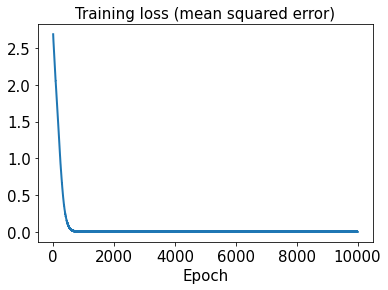

In [54]:
hist2 = history2.history
plt.plot(hist2['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

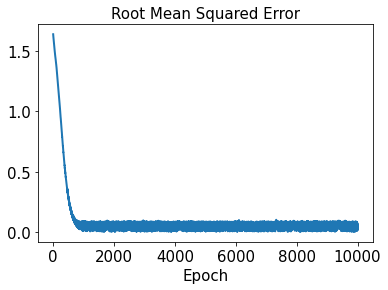

In [55]:
plt.plot(hist2['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [57]:
test_results2 = sd2.evaluate(t_test)

1/1 [==============================] - 0s 115ms/step - loss: 2.0611e-05 - rmse: 0.0000e+00


In [58]:
decoded_train2 = sd2.predict(t_train)

In [59]:
decoded_test2 = sd2.predict(t_test)

In [60]:
error_train_abs2 = np.abs(decoded_train2 - y_train2)

In [61]:
error_test_abs2 = np.abs(decoded_test2 - y_test2)

In [62]:
l2_error_train2 = np.sqrt(np.sum((decoded_train2 - y_train2)**2) / np.sum(y_train2**2))
print(l2_error_train2)

0.03582684800199273


In [63]:
l2_error_test2 = np.sqrt(np.sum((decoded_test2 - y_test2)**2) / np.sum(y_test2**2))
print(l2_error_test2)

0.031957223589989196


In [64]:
l2_error_train_list2 = []
for i in range(0, len(x_train2)):
    l2_error_train_data2 = np.sqrt(np.sum((decoded_train2[i] - y_train2[i])**2) / np.sum(y_train2[i]**2))
    l2_error_train_list2.append(l2_error_train_data2)
print(l2_error_train_list2)

[0.033194842634526336, 0.04338965609622331, 0.025947534785670672, 0.021574740648118308, 0.0013107717948379993, 0.03782691042321449, 0.006175848867941631, 0.03978240830190383, 0.0027210506142934816, 0.04464384578046214, 0.042831812403420495, 0.06417307604566869, 0.02826673833735111, 0.04826833768892408, 0.02775468759330648, 0.06226485386202252, 0.03550902774706094, 0.013280542145804805, 0.05879944679356883, 0.0379250460726941, 0.04694353592983821, 0.05547358631644372, 0.04635311019830368, 0.018579754184765596, 0.041402899233932304, 0.033240874749496684, 0.01597906649004601, 0.0038149145566746126, 0.010323335284314991, 0.04041157510241681, 0.009353474420803093, 0.030882156952024998, 0.04358713663645789]


In [65]:
l2_error_test_list2 = []
for i in range(0, len(x_test2)):
    l2_error_test_data2 = np.sqrt(np.sum((decoded_test2[i] - y_test2[i])**2) / np.sum(y_test2[i]**2))
    l2_error_test_list2.append(l2_error_test_data2)
print(l2_error_test_list2)

[0.02110650938267213, 0.013894803639964873, 0.0402586090486746, 0.02356160034788811, 0.052280183735975046, 0.03624117207140089, 0.006996123697377512, 0.039554256809232864]


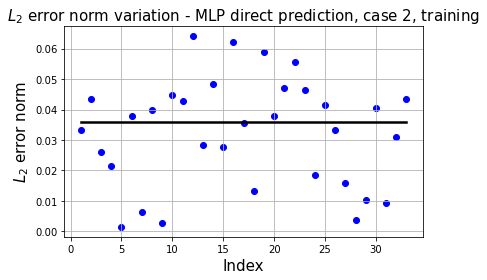

In [109]:
plt.plot(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train2*np.ones(x_train2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train2.shape[0], x_train2.shape[0]), l2_error_train_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 2, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

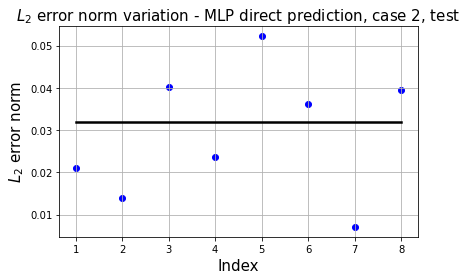

In [110]:
plt.plot(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test2*np.ones(x_test2.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test2.shape[0], x_test2.shape[0]), l2_error_test_list2, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 2, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

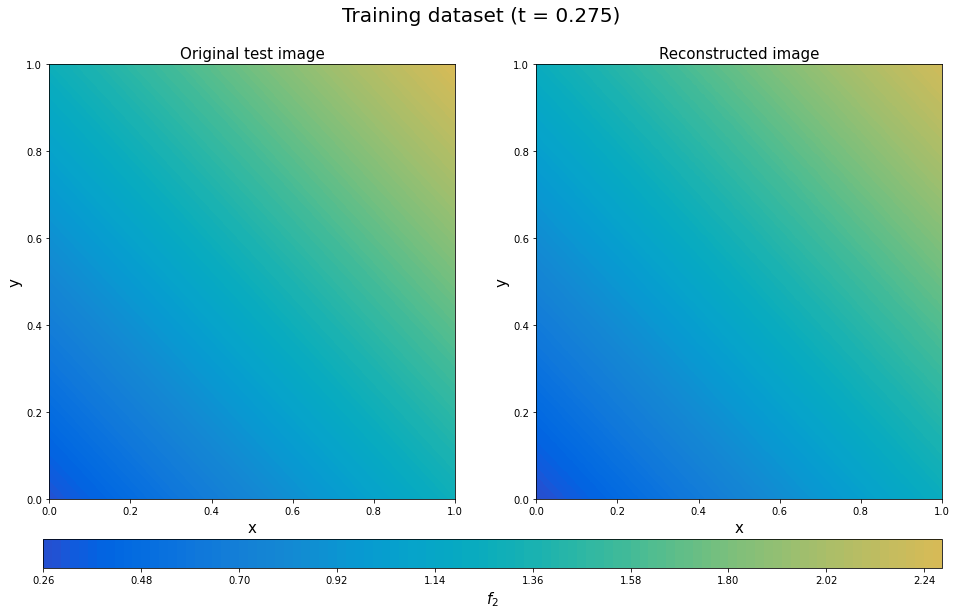

In [68]:
plt.figure(figsize=(16, 8))
y_train2_14_rotate = y_train2[14].T.reshape(101,101)
decoded_rotate2 = decoded_train2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_14_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[11]),fontsize=20)
plt.show()

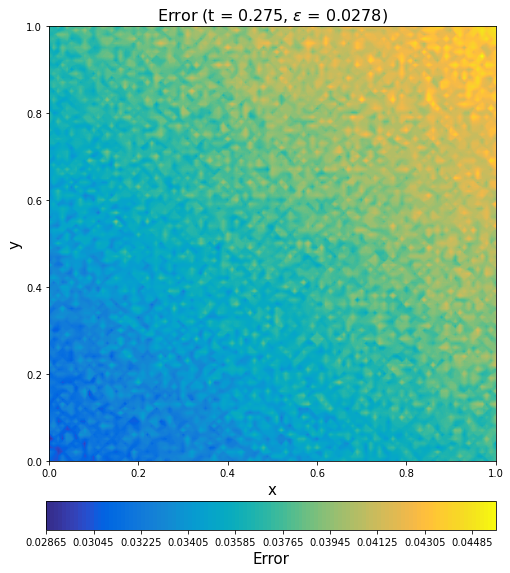

In [69]:
error_train_abs2_rotate14 = error_train_abs2[14].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate14, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.275, $\epsilon$ = %.4f)' %(l2_error_train_list2[14]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

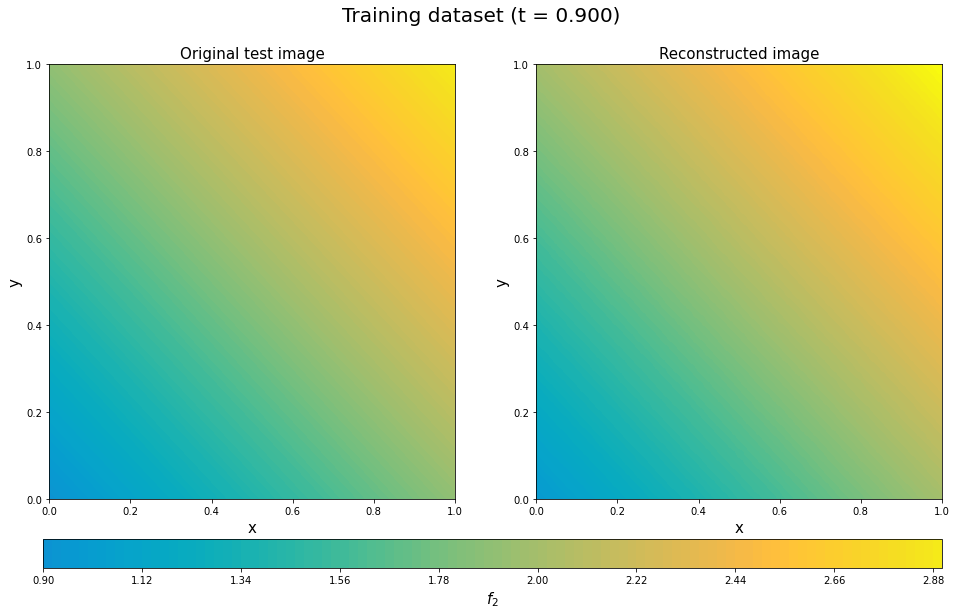

In [70]:
plt.figure(figsize=(16, 8))
y_train2_22_rotate = y_train2[22].T.reshape(101,101)
decoded_rotate2 = decoded_train2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train2_22_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[36]), fontsize=20)
plt.show()

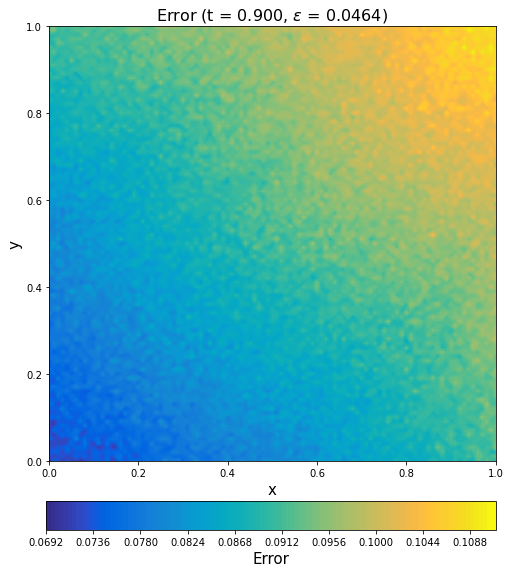

In [71]:
error_train_abs2_rotate22 = error_train_abs2[22].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs2_rotate22, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.900, $\epsilon$ = %.4f)' %(l2_error_train_list2[22]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

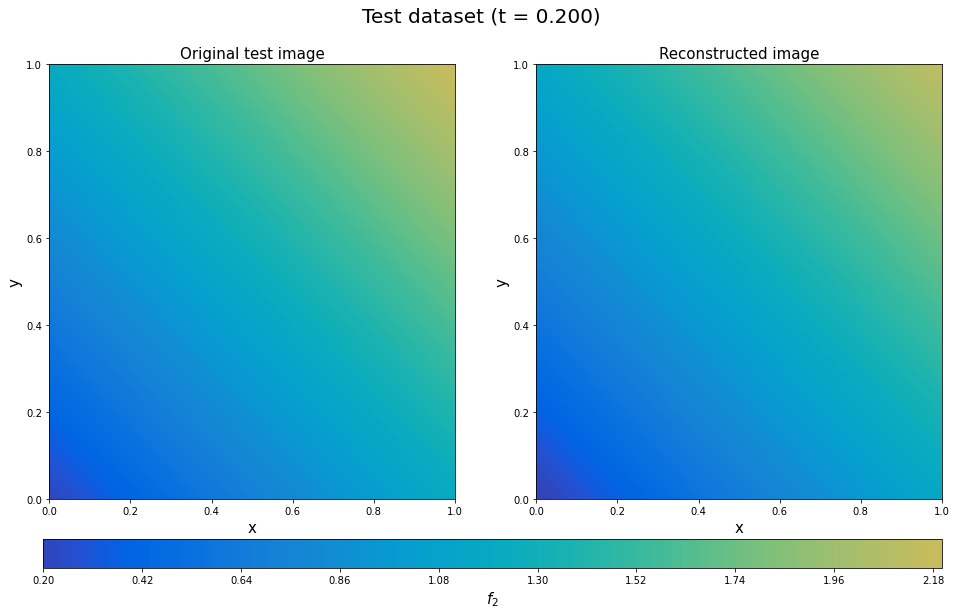

In [72]:
plt.figure(figsize=(16, 8))
y_test2_2_rotate = y_test2[2].T.reshape(101,101)
decoded_rotate2 = decoded_test2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

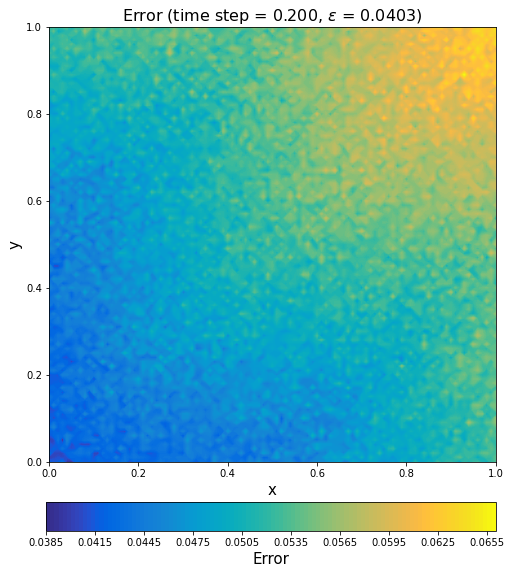

In [73]:
error_test_abs2_rotate2 = error_test_abs2[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (time step = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list2[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

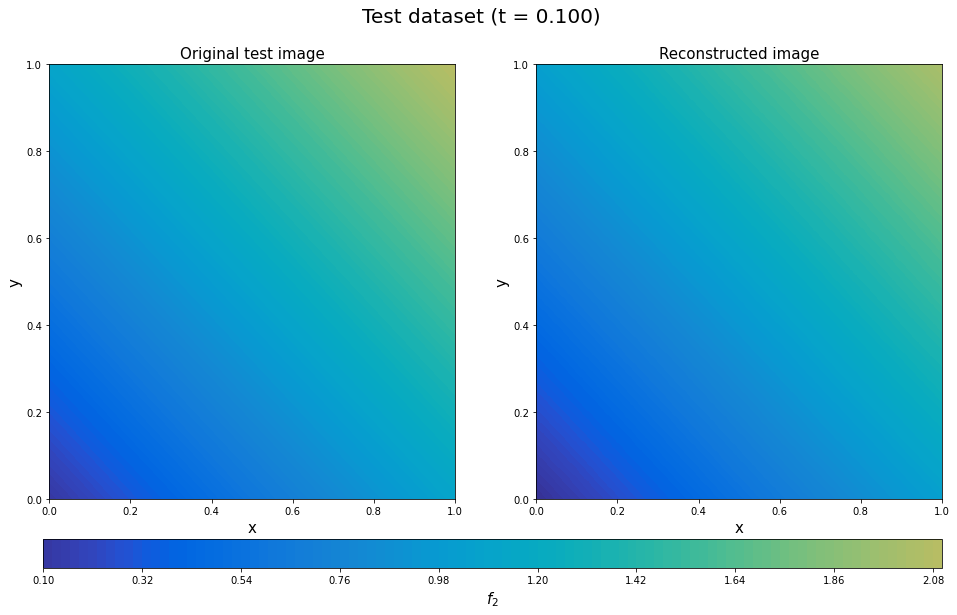

In [74]:
plt.figure(figsize=(16, 8))
y_test2_4_rotate = y_test2[4].T.reshape(101,101)
decoded_rotate2 = decoded_test2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test2_4_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate2, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(0.0,3.0)
a2.set_clim(0.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_2$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[4]),fontsize=20)
plt.show()

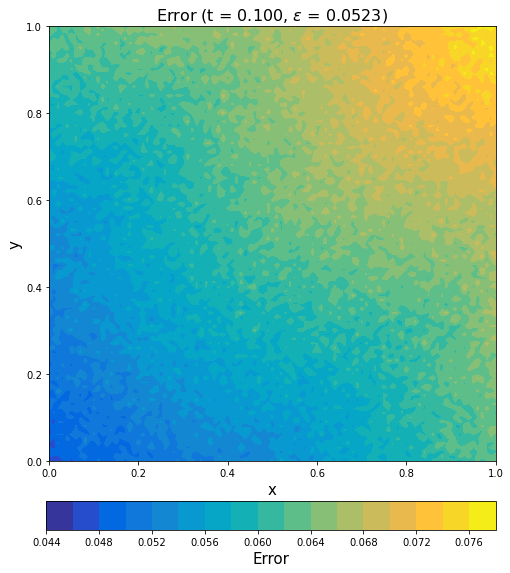

In [75]:
error_test_abs2_rotate4 = error_test_abs2[4].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs2_rotate4, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.100, $\epsilon$ = %.4f)' %(l2_error_test_list2[4]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

Case 3: f3

In [76]:
out3 = np.zeros((41, 101, 101))
for i in range(0, 41):
    for j in range(0, 101):
        for k in range(0, 101):
            out3[i, j, k] = np.exp(-t[i])*(2*np.sin(2*np.pi*x[j]) + np.sin(2*np.pi*x[j])*np.cos(2*np.pi*y[k]))

In [77]:
sensor3 = np.zeros((41, 4, 4))
for i in range(0, len(t)):
    for j in range(0, 4):
        for k in range(0, 4):
            sensor3[i, j, k] = out3[i, 20*(j+1)+1, 20*(k+1)+1]

In [78]:
sensor3 = sensor3.reshape((41, 16, 1))

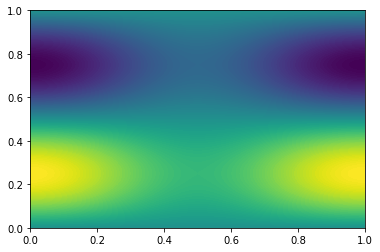

In [79]:
plt.contourf(xmesh, ymesh, out3[0,:,:], levels=128)

In [80]:
x_train3, x_test3, y_train3, y_test3, t_train, t_test = train_test_split(sensor3, out3, t.reshape((41, 1)), test_size=0.18, random_state=42)

In [81]:
x_test3

array([[[ 1.19533543],
        [ 0.61432027],
        [ 0.65355792],
        [ 1.25882328],
        [ 0.66126769],
        [ 0.33984615],
        [ 0.36155269],
        [ 0.6963896 ],
        [-0.78664952],
        [-0.4042838 ],
        [-0.43010607],
        [-0.82843084],
        [-1.14744383],
        [-0.58970728],
        [-0.62737286],
        [-1.20838802]],

       [[ 1.57369576],
        [ 0.80877148],
        [ 0.86042905],
        [ 1.65727946],
        [ 0.8705792 ],
        [ 0.44741788],
        [ 0.4759952 ],
        [ 0.91681827],
        [-1.03564822],
        [-0.53225202],
        [-0.56624783],
        [-1.09065461],
        [-1.510645  ],
        [-0.77636772],
        [-0.82595561],
        [-1.59087989]],

       [[ 1.78323092],
        [ 0.91645815],
        [ 0.97499384],
        [ 1.87794366],
        [ 0.98649548],
        [ 0.50699088],
        [ 0.53937323],
        [ 1.03889121],
        [-1.17354318],
        [-0.60312055],
        [-0.64164286],
       

In [82]:
sd3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [83]:
start3 = datetime.datetime.now()
history3 = sd3.fit(t_train, y_train3, epochs=10000, shuffle=True)
end3 = datetime.datetime.now()

Epoch 1/10000
2/2 [==============================] - 1s 143ms/step - loss: 3.9472 - rmse: 1.9868
Epoch 2/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.9045 - rmse: 1.9760
Epoch 3/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8649 - rmse: 1.9659
Epoch 4/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.8328 - rmse: 1.9578
Epoch 5/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8043 - rmse: 1.9505
Epoch 6/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.7769 - rmse: 1.9434
Epoch 7/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.7524 - rmse: 1.9371
Epoch 8/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.7304 - rmse: 1.9314
Epoch 9/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.7097 - rmse: 1.9260
Epoch 10/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.6895 - rmse: 1.9208
Epoch 11/10000
2/2 [==================

2/2 [==============================] - 0s 12ms/step - loss: 2.4661 - rmse: 1.5704
Epoch 86/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.4527 - rmse: 1.5661
Epoch 87/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.4424 - rmse: 1.5628
Epoch 88/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4260 - rmse: 1.5575
Epoch 89/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.4139 - rmse: 1.5536
Epoch 90/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.4025 - rmse: 1.5500
Epoch 91/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.3903 - rmse: 1.5460
Epoch 92/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.3776 - rmse: 1.5419
Epoch 93/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.3652 - rmse: 1.5379
Epoch 94/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.3539 - rmse: 1.5342
Epoch 95/10000
2/2 [=========================

2/2 [==============================] - 0s 10ms/step - loss: 1.6840 - rmse: 1.2977
Epoch 169/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.6691 - rmse: 1.2919
Epoch 170/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6630 - rmse: 1.2895
Epoch 171/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6557 - rmse: 1.2867
Epoch 172/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6505 - rmse: 1.2847
Epoch 173/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6430 - rmse: 1.2817
Epoch 174/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6354 - rmse: 1.2788
Epoch 175/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.6264 - rmse: 1.2753
Epoch 176/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6188 - rmse: 1.2723
Epoch 177/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6183 - rmse: 1.2720
Epoch 178/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 1.1927 - rmse: 1.0920
Epoch 252/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1860 - rmse: 1.0890
Epoch 253/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1830 - rmse: 1.0876
Epoch 254/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.1798 - rmse: 1.0861
Epoch 255/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1718 - rmse: 1.0824
Epoch 256/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1680 - rmse: 1.0807
Epoch 257/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1645 - rmse: 1.0790
Epoch 258/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1617 - rmse: 1.0778
Epoch 259/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.1541 - rmse: 1.0742
Epoch 260/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.1523 - rmse: 1.0734
Epoch 261/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.8662 - rmse: 0.9306
Epoch 335/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.8614 - rmse: 0.9280
Epoch 336/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8663 - rmse: 0.9307
Epoch 337/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8564 - rmse: 0.9253
Epoch 338/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.8570 - rmse: 0.9256
Epoch 339/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.8494 - rmse: 0.9216
Epoch 340/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8452 - rmse: 0.9192
Epoch 341/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8494 - rmse: 0.9215
Epoch 342/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8401 - rmse: 0.9165
Epoch 343/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.8358 - rmse: 0.9141
Epoch 344/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 0.6399 - rmse: 0.7998
Epoch 418/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6390 - rmse: 0.7992
Epoch 419/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6374 - rmse: 0.7983
Epoch 420/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6352 - rmse: 0.7969
Epoch 421/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6311 - rmse: 0.7943
Epoch 422/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6288 - rmse: 0.7928
Epoch 423/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.6265 - rmse: 0.7914
Epoch 424/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.6243 - rmse: 0.7900
Epoch 425/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6224 - rmse: 0.7888
Epoch 426/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.6232 - rmse: 0.7893
Epoch 427/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 0.4793 - rmse: 0.6922
Epoch 501/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4774 - rmse: 0.6908
Epoch 502/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4737 - rmse: 0.6881
Epoch 503/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4711 - rmse: 0.6862
Epoch 504/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4761 - rmse: 0.6899
Epoch 505/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.4689 - rmse: 0.6846
Epoch 506/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4683 - rmse: 0.6842
Epoch 507/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4652 - rmse: 0.6819
Epoch 508/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.4625 - rmse: 0.6799
Epoch 509/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.4618 - rmse: 0.6794
Epoch 510/10000
2/2 [================

2/2 [==============================] - 0s 11ms/step - loss: 0.3439 - rmse: 0.5863
Epoch 584/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3428 - rmse: 0.5853
Epoch 585/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3503 - rmse: 0.5917
Epoch 586/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3412 - rmse: 0.5839
Epoch 587/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3390 - rmse: 0.5821
Epoch 588/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3374 - rmse: 0.5807
Epoch 589/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.3376 - rmse: 0.5809
Epoch 590/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3385 - rmse: 0.5817
Epoch 591/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.3366 - rmse: 0.5800
Epoch 592/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.3320 - rmse: 0.5760
Epoch 593/10000
2/2 [===============

2/2 [==============================] - 0s 10ms/step - loss: 0.2407 - rmse: 0.4904
Epoch 667/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2390 - rmse: 0.4887
Epoch 668/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2375 - rmse: 0.4872
Epoch 669/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2399 - rmse: 0.4897
Epoch 670/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2352 - rmse: 0.4848
Epoch 671/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.2356 - rmse: 0.4852
Epoch 672/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2400 - rmse: 0.4897
Epoch 673/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2359 - rmse: 0.4855
Epoch 674/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.2330 - rmse: 0.4826
Epoch 675/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.2341 - rmse: 0.4837
Epoch 676/10000
2/2 [===============

2/2 [==============================] - 0s 10ms/step - loss: 0.1650 - rmse: 0.4060
Epoch 750/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1624 - rmse: 0.4028
Epoch 751/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1599 - rmse: 0.3997
Epoch 752/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1594 - rmse: 0.3991
Epoch 753/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1610 - rmse: 0.4011
Epoch 754/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1591 - rmse: 0.3986
Epoch 755/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1583 - rmse: 0.3977
Epoch 756/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1618 - rmse: 0.4020
Epoch 757/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1554 - rmse: 0.3940
Epoch 758/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1602 - rmse: 0.4001
Epoch 759/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 0.1082 - rmse: 0.3288
Epoch 833/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1067 - rmse: 0.3264
Epoch 834/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1126 - rmse: 0.3354
Epoch 835/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1053 - rmse: 0.3243
Epoch 836/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1060 - rmse: 0.3253
Epoch 837/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1039 - rmse: 0.3221
Epoch 838/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1029 - rmse: 0.3206
Epoch 839/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.1058 - rmse: 0.3250
Epoch 840/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.1031 - rmse: 0.3209
Epoch 841/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.1079 - rmse: 0.3282
Epoch 842/10000
2/2 [===============

2/2 [==============================] - 0s 11ms/step - loss: 0.0685 - rmse: 0.2616
Epoch 916/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0652 - rmse: 0.2551
Epoch 917/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0639 - rmse: 0.2525
Epoch 918/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0649 - rmse: 0.2545
Epoch 919/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0633 - rmse: 0.2513
Epoch 920/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0667 - rmse: 0.2581
Epoch 921/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0716 - rmse: 0.2674
Epoch 922/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0645 - rmse: 0.2538
Epoch 923/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0631 - rmse: 0.2510
Epoch 924/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0700 - rmse: 0.2644
Epoch 925/10000
2/2 [===============

2/2 [==============================] - 0s 12ms/step - loss: 0.0421 - rmse: 0.2048
Epoch 999/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0381 - rmse: 0.1949
Epoch 1000/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0385 - rmse: 0.1959
Epoch 1001/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0375 - rmse: 0.1934
Epoch 1002/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0382 - rmse: 0.1952
Epoch 1003/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0376 - rmse: 0.1937
Epoch 1004/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0448 - rmse: 0.2113
Epoch 1005/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0371 - rmse: 0.1924
Epoch 1006/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0418 - rmse: 0.2042
Epoch 1007/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0401 - rmse: 0.2000
Epoch 1008/10000
2/2 [======

Epoch 1081/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0205 - rmse: 0.1429
Epoch 1082/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0220 - rmse: 0.1479
Epoch 1083/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0235 - rmse: 0.1529
Epoch 1084/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0212 - rmse: 0.1451
Epoch 1085/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0220 - rmse: 0.1479
Epoch 1086/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0210 - rmse: 0.1445
Epoch 1087/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0195 - rmse: 0.1393
Epoch 1088/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0207 - rmse: 0.1435
Epoch 1089/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0233 - rmse: 0.1523
Epoch 1090/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0192 - rmse: 0.1381
Epoch 1091

2/2 [==============================] - 0s 12ms/step - loss: 0.0164 - rmse: 0.1277
Epoch 1164/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0135 - rmse: 0.1156
Epoch 1165/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0134 - rmse: 0.1154
Epoch 1166/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0123 - rmse: 0.1106
Epoch 1167/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0131 - rmse: 0.1142
Epoch 1168/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0122 - rmse: 0.1099
Epoch 1169/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0148 - rmse: 0.1211
Epoch 1170/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0122 - rmse: 0.1099
Epoch 1171/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0136 - rmse: 0.1163
Epoch 1172/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0126 - rmse: 0.1117
Epoch 1173/10000
2/2 [=====

2/2 [==============================] - 0s 10ms/step - loss: 0.0127 - rmse: 0.1122
Epoch 1246/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0102 - rmse: 0.1007
Epoch 1247/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0068 - rmse: 0.0816
Epoch 1248/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0100 - rmse: 0.0994
Epoch 1249/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0090 - rmse: 0.0943
Epoch 1250/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0077 - rmse: 0.0872
Epoch 1251/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0070 - rmse: 0.0828
Epoch 1252/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0069 - rmse: 0.0823
Epoch 1253/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0103 - rmse: 0.1010
Epoch 1254/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0079 - rmse: 0.0886
Epoch 1255/10000
2/2 [=====

2/2 [==============================] - 0s 13ms/step - loss: 0.0044 - rmse: 0.0654
Epoch 1328/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0673
Epoch 1329/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0064 - rmse: 0.0795
Epoch 1330/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0535
Epoch 1331/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0073 - rmse: 0.0850
Epoch 1332/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0832
Epoch 1333/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0591
Epoch 1334/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0783
Epoch 1335/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0044 - rmse: 0.0657
Epoch 1336/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0785
Epoch 1337/10000
2/2 [=====

Epoch 1410/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0625
Epoch 1411/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0529
Epoch 1412/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0399
Epoch 1413/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 1414/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0532
Epoch 1415/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 1416/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0657
Epoch 1417/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0653
Epoch 1418/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0568
Epoch 1419/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0556
Epoch 1420

2/2 [==============================] - 0s 12ms/step - loss: 0.0049 - rmse: 0.0690
Epoch 1493/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0036 - rmse: 0.0591
Epoch 1494/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0590
Epoch 1495/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0408
Epoch 1496/10000
2/2 [==============================] - 0s 12ms/step - loss: 7.9171e-04 - rmse: 0.0265
Epoch 1497/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.2414e-04 - rmse: 0.0252
Epoch 1498/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0089 - rmse: 0.0937
Epoch 1499/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0319
Epoch 1500/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0593
Epoch 1501/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.0416e-04 - rmse: 0.0248
Epoch 1502/10000

2/2 [==============================] - 0s 12ms/step - loss: 7.8027e-04 - rmse: 0.0264
Epoch 1575/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0103 - rmse: 0.1009
Epoch 1576/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 1577/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0568
Epoch 1578/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.4422e-04 - rmse: 0.0276
Epoch 1579/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0589
Epoch 1580/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 1581/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0591
Epoch 1582/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0611
Epoch 1583/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.5073e-04 - rmse: 0.0191
Epoch 1584/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0594
Epoch 1656/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0331
Epoch 1657/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0672
Epoch 1658/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0051 - rmse: 0.0709
Epoch 1659/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 1660/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0601
Epoch 1661/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0318
Epoch 1662/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0469
Epoch 1663/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0555
Epoch 1664/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0449
Epoch 1665/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0368
Epoch 1738/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0456
Epoch 1739/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0540
Epoch 1740/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0350
Epoch 1741/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0662
Epoch 1742/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0090 - rmse: 0.0944
Epoch 1743/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0598
Epoch 1744/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0482
Epoch 1745/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0682
Epoch 1746/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0052 - rmse: 0.0716
Epoch 1747/10000
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 4.2455e-04 - rmse: 0.0186
Epoch 1820/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0063 - rmse: 0.0791
Epoch 1821/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0662
Epoch 1822/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0844
Epoch 1823/10000
2/2 [==============================] - 0s 11ms/step - loss: 8.8235e-04 - rmse: 0.0284
Epoch 1824/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0349
Epoch 1825/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 1826/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.9912e-04 - rmse: 0.0228
Epoch 1827/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.4190e-04 - rmse: 0.0191
Epoch 1828/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0017 - rmse: 0.0399
Epoch 1829/

2/2 [==============================] - 0s 11ms/step - loss: 5.8410e-04 - rmse: 0.0225
Epoch 1901/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.3877e-04 - rmse: 0.0161
Epoch 1902/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1913e-04 - rmse: 0.0119
Epoch 1903/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0599
Epoch 1904/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 1905/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 1906/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0337
Epoch 1907/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 1908/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0483
Epoch 1909/10000
2/2 [==============================] - 0s 15ms/step - loss: 2.4811e-04 - rmse: 0.0130
Epoch 1910/

2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0674
Epoch 1982/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0096 - rmse: 0.0975
Epoch 1983/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 1984/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0070 - rmse: 0.0833
Epoch 1985/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0316
Epoch 1986/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0770
Epoch 1987/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0071 - rmse: 0.0840
Epoch 1988/10000
2/2 [==============================] - 0s 17ms/step - loss: 6.5766e-04 - rmse: 0.0241
Epoch 1989/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 1990/10000
2/2 [==============================] - 0s 17ms/step - loss: 2.3885e-04 - rmse: 0.0127
Epoch 1991/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 2064/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.2426e-04 - rmse: 0.0211
Epoch 2065/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.8102e-04 - rmse: 0.0143
Epoch 2066/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0084 - rmse: 0.0913
Epoch 2067/10000
2/2 [==============================] - 0s 14ms/step - loss: 2.4938e-04 - rmse: 0.0131
Epoch 2068/10000
2/2 [==============================] - 0s 15ms/step - loss: 2.4159e-04 - rmse: 0.0128
Epoch 2069/10000
2/2 [==============================] - 0s 16ms/step - loss: 2.7119e-04 - rmse: 0.0139
Epoch 2070/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0016 - rmse: 0.0392
Epoch 2071/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0062 - rmse: 0.0782
Epoch 2072/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0040 - rmse: 0.0624
Epoch 2

2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 2145/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0021 - rmse: 0.0445
Epoch 2146/10000
2/2 [==============================] - 0s 15ms/step - loss: 7.4807e-04 - rmse: 0.0260
Epoch 2147/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0017 - rmse: 0.0398
Epoch 2148/10000
2/2 [==============================] - 0s 15ms/step - loss: 4.6641e-04 - rmse: 0.0198
Epoch 2149/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 2150/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 2151/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0682
Epoch 2152/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0358
Epoch 2153/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.6120e-04 - rmse: 0.0169
Epoch 2154/1000

Epoch 2226/10000
2/2 [==============================] - 0s 16ms/step - loss: 4.9190e-04 - rmse: 0.0204
Epoch 2227/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 2228/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0096 - rmse: 0.0973
Epoch 2229/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.4110e-04 - rmse: 0.0215
Epoch 2230/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0559
Epoch 2231/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0348
Epoch 2232/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0307
Epoch 2233/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 2234/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0551
Epoch 2235/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.5224e-04 - rmse: 0.016

Epoch 2308/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 2309/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.9045e-04 - rmse: 0.0147
Epoch 2310/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5740e-04 - rmse: 0.0090
Epoch 2311/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.6266e-04 - rmse: 0.0281
Epoch 2312/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.0697e-04 - rmse: 0.0115
Epoch 2313/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.1731e-04 - rmse: 0.0119
Epoch 2314/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 2315/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 2316/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.1209e-04 - rmse: 0.0154
Epoch 2317/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 -

2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 2390/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0413
Epoch 2391/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 2392/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.6654e-04 - rmse: 0.0222
Epoch 2393/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5535e-04 - rmse: 0.0090
Epoch 2394/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.7367e-04 - rmse: 0.0141
Epoch 2395/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0316
Epoch 2396/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.1657e-04 - rmse: 0.0185
Epoch 2397/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 2398/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0360
Epoch 2399/

2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 2471/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 2472/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 2473/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0768
Epoch 2474/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0093 - rmse: 0.0959
Epoch 2475/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0347
Epoch 2476/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.8665e-04 - rmse: 0.0147
Epoch 2477/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0084 - rmse: 0.0915
Epoch 2478/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.7368e-04 - rmse: 0.0283
Epoch 2479/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0836
Epoch 2480/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0667
Epoch 2553/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0097 - rmse: 0.0979
Epoch 2554/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0390
Epoch 2555/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.1055e-04 - rmse: 0.0290
Epoch 2556/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.9960e-04 - rmse: 0.0181
Epoch 2557/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0102 - rmse: 0.1004
Epoch 2558/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.3589e-04 - rmse: 0.0163
Epoch 2559/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0010 - rmse: 0.0306
Epoch 2560/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0571
Epoch 2561/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0564
Epoch 2562/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 2634/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.5469e-04 - rmse: 0.0219
Epoch 2635/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0041 - rmse: 0.0635
Epoch 2636/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0751e-04 - rmse: 0.0058
Epoch 2637/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0832
Epoch 2638/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0321
Epoch 2639/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0831
Epoch 2640/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 2641/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0061 - rmse: 0.0774
Epoch 2642/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 2643/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 2716/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 2717/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0100 - rmse: 0.0998
Epoch 2718/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0584
Epoch 2719/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0666
Epoch 2720/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0410
Epoch 2721/10000
2/2 [==============================] - 0s 9ms/step - loss: 7.8849e-04 - rmse: 0.0268
Epoch 2722/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0080 - rmse: 0.0890
Epoch 2723/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0101 - rmse: 0.1001
Epoch 2724/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0499
Epoch 2725/10000
2/2 [==

2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0386
Epoch 2798/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.8383e-04 - rmse: 0.0176
Epoch 2799/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0410
Epoch 2800/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0096 - rmse: 0.0977
Epoch 2801/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 2802/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 2803/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0389
Epoch 2804/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 2805/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.2153e-04 - rmse: 0.0157
Epoch 2806/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.5616e-04 - rmse: 0.0168
Epoch 2807/1000

Epoch 2879/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0538
Epoch 2880/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 2881/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.9676e-04 - rmse: 0.0180
Epoch 2882/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0539
Epoch 2883/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 2884/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0537
Epoch 2885/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0389
Epoch 2886/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - rmse: 0.0972
Epoch 2887/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.0356e-04 - rmse: 0.0182
Epoch 2888/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0070 - rmse: 0.0834
Ep

2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 2961/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 2962/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 2963/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0095 - rmse: 0.0971
Epoch 2964/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.6047e-04 - rmse: 0.0222
Epoch 2965/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0894
Epoch 2966/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0673
Epoch 2967/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 2968/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 2969/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.4599e-04 - rmse: 0.0088
Epoch 2970/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 5.1826e-04 - rmse: 0.0212
Epoch 3042/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0558
Epoch 3043/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.7015e-04 - rmse: 0.0174
Epoch 3044/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0390
Epoch 3045/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1800e-04 - rmse: 0.0122
Epoch 3046/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0412
Epoch 3047/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.2056e-04 - rmse: 0.0159
Epoch 3048/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0040 - rmse: 0.0629
Epoch 3049/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0647
Epoch 3050/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 3051/

2/2 [==============================] - 0s 11ms/step - loss: 4.8277e-04 - rmse: 0.0203
Epoch 3123/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0609
Epoch 3124/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 3125/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0028 - rmse: 0.0522
Epoch 3126/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0449
Epoch 3127/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.1666e-04 - rmse: 0.0234
Epoch 3128/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0895e-04 - rmse: 0.0209
Epoch 3129/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.5581e-04 - rmse: 0.0136
Epoch 3130/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0361
Epoch 3131/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0625
Epoch 3132/1

2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0687
Epoch 3204/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0462
Epoch 3205/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.2044e-04 - rmse: 0.0188
Epoch 3206/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0907e-04 - rmse: 0.0210
Epoch 3207/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0365
Epoch 3208/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0087 - rmse: 0.0928
Epoch 3209/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 3210/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0423
Epoch 3211/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.9579e-04 - rmse: 0.0207
Epoch 3212/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.5452e-04 - rmse: 0.0220
Epoch 3213/

2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 3286/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0449
Epoch 3287/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0670
Epoch 3288/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 3289/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.5456e-04 - rmse: 0.0197
Epoch 3290/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0378
Epoch 3291/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0565
Epoch 3292/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0096 - rmse: 0.0977
Epoch 3293/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0831
Epoch 3294/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0314
Epoch 3295/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0682
Epoch 3368/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.3273e-04 - rmse: 0.0258
Epoch 3369/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0405
Epoch 3370/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0692
Epoch 3371/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 3372/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0370
Epoch 3373/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0183e-04 - rmse: 0.0208
Epoch 3374/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.6598e-04 - rmse: 0.0200
Epoch 3375/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 3376/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.8839e-04 - rmse: 0.0228
Epoch 3377/

2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0785
Epoch 3449/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 3450/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0405
Epoch 3451/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.9484e-04 - rmse: 0.0206
Epoch 3452/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 3453/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 3454/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.0130e-04 - rmse: 0.0182
Epoch 3455/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.1710e-04 - rmse: 0.0211
Epoch 3456/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0096 - rmse: 0.0975
Epoch 3457/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0609
Epoch 3458/1000

2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0332
Epoch 3531/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0095 - rmse: 0.0973
Epoch 3532/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.4696e-04 - rmse: 0.0241
Epoch 3533/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 3534/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.7334e-04 - rmse: 0.0175
Epoch 3535/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0537
Epoch 3536/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0448
Epoch 3537/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 3538/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6521e-04 - rmse: 0.0099
Epoch 3539/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0414
Epoch 3540/1000

2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 3612/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 3613/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0619
Epoch 3614/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0647
Epoch 3615/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0440
Epoch 3616/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0538
Epoch 3617/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0084 - rmse: 0.0915
Epoch 3618/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 3619/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0093 - rmse: 0.0964
Epoch 3620/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0409
Epoch 3621/10000
2/2 [=====

2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0844
Epoch 3694/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 3695/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0041 - rmse: 0.0634
Epoch 3696/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.7202e-04 - rmse: 0.0225
Epoch 3697/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7965e-04 - rmse: 0.0106
Epoch 3698/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0100 - rmse: 0.0997
Epoch 3699/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.3318e-04 - rmse: 0.0081
Epoch 3700/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 3701/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.4359e-04 - rmse: 0.0166
Epoch 3702/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0036 - rmse: 0.0592
Epoch 3703/

2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0434
Epoch 3776/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0650
Epoch 3777/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0390
Epoch 3778/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 3779/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0656
Epoch 3780/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0674
Epoch 3781/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0330
Epoch 3782/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0418
Epoch 3783/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0350
Epoch 3784/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.5064e-04 - rmse: 0.0168
Epoch 3785/10000
2/2 [==

2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0780
Epoch 3858/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 3859/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0313
Epoch 3860/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 3861/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.3075e-04 - rmse: 0.0128
Epoch 3862/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0682
Epoch 3863/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0433
Epoch 3864/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 3865/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 3866/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 3867/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 1.8803e-04 - rmse: 0.0110
Epoch 3939/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9805e-04 - rmse: 0.0115
Epoch 3940/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 3941/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0082 - rmse: 0.0900
Epoch 3942/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0499
Epoch 3943/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.9824e-04 - rmse: 0.0182
Epoch 3944/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 3945/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 3946/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0014 - rmse: 0.0367
Epoch 3947/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0847
Epoch 3948/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0056 - rmse: 0.0744
Epoch 4020/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0685
Epoch 4021/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0050 - rmse: 0.0701
Epoch 4022/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0656
Epoch 4023/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0333
Epoch 4024/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.8200e-04 - rmse: 0.0302
Epoch 4025/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 4026/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.9541e-04 - rmse: 0.0288
Epoch 4027/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0492
Epoch 4028/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0630
Epoch 4029/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0038 - rmse: 0.0614
Epoch 4102/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0663
Epoch 4103/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 4104/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0468
Epoch 4105/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 4106/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 4107/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 4108/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.0846
Epoch 4109/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0346
Epoch 4110/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.7915e-04 - rmse: 0.0226
Epoch 4111/10000
2/2 [=

Epoch 4183/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.9299e-04 - rmse: 0.0150
Epoch 4184/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.7715e-04 - rmse: 0.0176
Epoch 4185/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0085 - rmse: 0.0919
Epoch 4186/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0491
Epoch 4187/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0413
Epoch 4188/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0626
Epoch 4189/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0623
Epoch 4190/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0661
Epoch 4191/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.4527e-04 - rmse: 0.0296
Epoch 4192/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0072 - rmse: 0.084

2/2 [==============================] - 0s 12ms/step - loss: 0.0081 - rmse: 0.0898
Epoch 4265/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 4266/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0565
Epoch 4267/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 4268/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0046 - rmse: 0.0674
Epoch 4269/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.0234e-04 - rmse: 0.0154
Epoch 4270/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0391
Epoch 4271/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0096 - rmse: 0.0976
Epoch 4272/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 4273/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 4274/10000
2/2 [=

2/2 [==============================] - 0s 12ms/step - loss: 0.0040 - rmse: 0.0626
Epoch 4347/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0403
Epoch 4348/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0030 - rmse: 0.0540
Epoch 4349/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0902
Epoch 4350/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0413
Epoch 4351/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0312
Epoch 4352/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0410
Epoch 4353/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 4354/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.9924e-04 - rmse: 0.0182
Epoch 4355/10000
2/2 [==============================] - 0s 9ms/step - loss: 2.4947e-04 - rmse: 0.0135
Epoch 4356/10000
2/2

2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 4428/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.5412e-04 - rmse: 0.0197
Epoch 4429/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 4430/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 4431/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 4432/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0673
Epoch 4433/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 4434/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0482
Epoch 4435/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0901
Epoch 4436/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0594
Epoch 4437/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0516
Epoch 4510/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0018 - rmse: 0.0422
Epoch 4511/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0570
Epoch 4512/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 4513/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.6434e-04 - rmse: 0.0142
Epoch 4514/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0333
Epoch 4515/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.8233e-04 - rmse: 0.0228
Epoch 4516/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4908e-04 - rmse: 0.0093
Epoch 4517/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0674
Epoch 4518/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0480
Epoch 4519/1000

2/2 [==============================] - 0s 12ms/step - loss: 3.0979e-04 - rmse: 0.0156
Epoch 4591/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0686
Epoch 4592/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0491
Epoch 4593/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0095 - rmse: 0.0972
Epoch 4594/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.8579e-04 - rmse: 0.0228
Epoch 4595/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0022 - rmse: 0.0467
Epoch 4596/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0843
Epoch 4597/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 4598/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0426
Epoch 4599/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0047 - rmse: 0.0680
Epoch 4600/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 4.7782e-04 - rmse: 0.0204
Epoch 4672/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 4673/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 4674/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0776
Epoch 4675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 4676/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 4677/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0648
Epoch 4678/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 4679/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0966
Epoch 4680/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0093 - rmse: 0.0960
Epoch 4681/10000
2/2 [==

Epoch 4753/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.0319e-04 - rmse: 0.0209
Epoch 4754/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0505
Epoch 4755/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5597e-04 - rmse: 0.0095
Epoch 4756/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 4757/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0095 - rmse: 0.0971
Epoch 4758/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.9956e-04 - rmse: 0.0306
Epoch 4759/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.2291e-04 - rmse: 0.0161
Epoch 4760/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 4761/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 4762/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6092e-04 - rms

2/2 [==============================] - 0s 12ms/step - loss: 4.7471e-04 - rmse: 0.0203
Epoch 4835/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0455
Epoch 4836/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0315
Epoch 4837/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0639
Epoch 4838/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0686
Epoch 4839/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0784
Epoch 4840/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0425
Epoch 4841/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0583
Epoch 4842/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 4843/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0099 - rmse: 0.0994
Epoch 4844/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 5.1121e-04 - rmse: 0.0211
Epoch 4916/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.5294e-04 - rmse: 0.0137
Epoch 4917/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 4918/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.7353e-05 - rmse: 0.0057
Epoch 4919/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 4920/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0655
Epoch 4921/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0540
Epoch 4922/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.7907e-04 - rmse: 0.0146
Epoch 4923/10000
2/2 [==============================] - 0s 12ms/step - loss: 9.2376e-04 - rmse: 0.0293
Epoch 4924/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0364
Epoch 4

2/2 [==============================] - 0s 10ms/step - loss: 2.6213e-04 - rmse: 0.0141
Epoch 4998/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.4808e-04 - rmse: 0.0136
Epoch 4999/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 5000/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 5001/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0774
Epoch 5002/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.1080e-04 - rmse: 0.0157
Epoch 5003/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.4579e-04 - rmse: 0.0241
Epoch 5004/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0419
Epoch 5005/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.9037e-04 - rmse: 0.0113
Epoch 5006/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0346
Epoch 5

2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0567
Epoch 5079/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0558
Epoch 5080/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0096 - rmse: 0.0977
Epoch 5081/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.1940e-04 - rmse: 0.0160
Epoch 5082/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0436
Epoch 5083/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0624
Epoch 5084/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 5085/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 5086/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0094 - rmse: 0.0964
Epoch 5087/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 5088/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 4.8464e-04 - rmse: 0.0205
Epoch 5161/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0413
Epoch 5162/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0786
Epoch 5163/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0439
Epoch 5164/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0062 - rmse: 0.0783
Epoch 5165/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0584
Epoch 5166/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.8752e-04 - rmse: 0.0206
Epoch 5167/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.5661e-04 - rmse: 0.0198
Epoch 5168/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0074 - rmse: 0.0857
Epoch 5169/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0582
Epoch 5170/1000

2/2 [==============================] - 0s 10ms/step - loss: 9.6598e-05 - rmse: 0.0058
Epoch 5242/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0900
Epoch 5243/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0769
Epoch 5244/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 5245/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0830
Epoch 5246/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.2113e-04 - rmse: 0.0189
Epoch 5247/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0018 - rmse: 0.0412
Epoch 5248/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0679
Epoch 5249/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5620e-04 - rmse: 0.0097
Epoch 5250/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.0556e-04 - rmse: 0.0185
Epoch 5251/

2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0342
Epoch 5323/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0099 - rmse: 0.0989
Epoch 5324/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 5325/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.2345e-04 - rmse: 0.0215
Epoch 5326/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 5327/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.5799e-04 - rmse: 0.0199
Epoch 5328/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.4167e-04 - rmse: 0.0240
Epoch 5329/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 5330/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0337
Epoch 5331/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.4155e-04 - rmse: 0.0167
Epoch 5332/

2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 5405/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.2435e-04 - rmse: 0.0128
Epoch 5406/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.5389e-04 - rmse: 0.0139
Epoch 5407/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0514
Epoch 5408/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 5409/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0602
Epoch 5410/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0083 - rmse: 0.0907
Epoch 5411/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0093 - rmse: 0.0964
Epoch 5412/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0071 - rmse: 0.0842
Epoch 5413/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0081 - rmse: 0.0897
Epoch 5414/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 5486/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 5487/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0447
Epoch 5488/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 5489/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 5490/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.2300e-04 - rmse: 0.0191
Epoch 5491/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.2804e-04 - rmse: 0.0084
Epoch 5492/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 5493/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.7755e-04 - rmse: 0.0109
Epoch 5494/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0044 - rmse: 0.0655
Epoch 5495/1000

2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0446
Epoch 5568/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0585
Epoch 5569/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0528
Epoch 5570/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - rmse: 0.0983
Epoch 5571/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0616
Epoch 5572/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0031 - rmse: 0.0548
Epoch 5573/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 5574/10000
2/2 [==============================] - 0s 16ms/step - loss: 7.8575e-04 - rmse: 0.0268
Epoch 5575/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0039 - rmse: 0.0616
Epoch 5576/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 5577/10000
2/2 [=

2/2 [==============================] - 0s 13ms/step - loss: 0.0067 - rmse: 0.0814
Epoch 5650/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 5651/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0316
Epoch 5652/10000
2/2 [==============================] - 0s 17ms/step - loss: 7.8004e-04 - rmse: 0.0268
Epoch 5653/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0022 - rmse: 0.0463
Epoch 5654/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0010 - rmse: 0.0311
Epoch 5655/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0046 - rmse: 0.0671
Epoch 5656/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0022 - rmse: 0.0466
Epoch 5657/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0050 - rmse: 0.0700
Epoch 5658/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 5659/10000
2/2 [=

2/2 [==============================] - 0s 16ms/step - loss: 0.0015 - rmse: 0.0382
Epoch 5732/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0025 - rmse: 0.0491
Epoch 5733/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0047 - rmse: 0.0678
Epoch 5734/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0075 - rmse: 0.0864
Epoch 5735/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0064 - rmse: 0.0799
Epoch 5736/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 5737/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0392
Epoch 5738/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0569
Epoch 5739/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0803
Epoch 5740/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 5741/10000
2/2 [======

2/2 [==============================] - 0s 16ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 5814/10000
2/2 [==============================] - 0s 16ms/step - loss: 3.1561e-04 - rmse: 0.0159
Epoch 5815/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0025 - rmse: 0.0489
Epoch 5816/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0072 - rmse: 0.0842
Epoch 5817/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0399
Epoch 5818/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 5819/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0034 - rmse: 0.0578
Epoch 5820/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 5821/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 5822/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0097 - rmse: 0.0980
Epoch 5823/10000
2/2 [==

Epoch 5895/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 5896/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 5897/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0599
Epoch 5898/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.5596e-04 - rmse: 0.0093
Epoch 5899/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0621
Epoch 5900/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0033 - rmse: 0.0565
Epoch 5901/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 5902/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0095 - rmse: 0.0970
Epoch 5903/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0437
Epoch 5904/10000
2/2 [==============================] - 0s 9ms/step - loss: 3.3444e-04 - rmse: 0.0163
Epo

2/2 [==============================] - 0s 11ms/step - loss: 5.2899e-04 - rmse: 0.0216
Epoch 5977/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0094 - rmse: 0.0966
Epoch 5978/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0070 - rmse: 0.0831
Epoch 5979/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0334
Epoch 5980/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.8820e-04 - rmse: 0.0150
Epoch 5981/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0900
Epoch 5982/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0425
Epoch 5983/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0399e-04 - rmse: 0.0155
Epoch 5984/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 5985/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 5986/1000

2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0439
Epoch 6059/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0385
Epoch 6060/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 6061/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.2331e-04 - rmse: 0.0162
Epoch 6062/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.3632e-04 - rmse: 0.0218
Epoch 6063/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.7463e-04 - rmse: 0.0177
Epoch 6064/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0040 - rmse: 0.0624
Epoch 6065/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 6066/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 6067/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 6068/10000

2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - rmse: 0.0547
Epoch 6141/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0623
Epoch 6142/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.5071e-04 - rmse: 0.0197
Epoch 6143/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0965
Epoch 6144/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 6145/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0374
Epoch 6146/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0061 - rmse: 0.0775
Epoch 6147/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6098e-04 - rmse: 0.0098
Epoch 6148/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0016 - rmse: 0.0389
Epoch 6149/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0040 - rmse: 0.0626
Epoch 6150/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 2.9255e-04 - rmse: 0.0152
Epoch 6223/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0095 - rmse: 0.0971
Epoch 6224/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0094 - rmse: 0.0967
Epoch 6225/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0405
Epoch 6226/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.8026e-04 - rmse: 0.0228
Epoch 6227/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.5092e-04 - rmse: 0.0197
Epoch 6228/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0565
Epoch 6229/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0345
Epoch 6230/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0319
Epoch 6231/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0336
Epoch 6232/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0408
Epoch 6305/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 6306/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0565
Epoch 6307/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0050 - rmse: 0.0701
Epoch 6308/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.7431e-04 - rmse: 0.0247
Epoch 6309/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0510
Epoch 6310/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0099 - rmse: 0.0993
Epoch 6311/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 6312/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 6313/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 6314/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 6387/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0518
Epoch 6388/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.4192e-04 - rmse: 0.0135
Epoch 6389/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0460
Epoch 6390/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0063 - rmse: 0.0791
Epoch 6391/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0493
Epoch 6392/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0062 - rmse: 0.0780
Epoch 6393/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0389
Epoch 6394/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0495
Epoch 6395/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 6396/10000
2/2 [=

Epoch 6468/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0671
Epoch 6469/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.8006e-04 - rmse: 0.0109
Epoch 6470/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 6471/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0620
Epoch 6472/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0670
Epoch 6473/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0770
Epoch 6474/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.8055e-04 - rmse: 0.0205
Epoch 6475/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 6476/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0310
Epoch 6477/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0380
Ep

2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0313
Epoch 6550/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 6551/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.3734e-04 - rmse: 0.0134
Epoch 6552/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0592
Epoch 6553/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0319
Epoch 6554/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0426
Epoch 6555/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0375
Epoch 6556/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 6557/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0903
Epoch 6558/10000
2/2 [==============================] - 0s 11ms/step - loss: 4.1756e-04 - rmse: 0.0190
Epoch 6559/10000
2/

2/2 [==============================] - 0s 13ms/step - loss: 1.2898e-04 - rmse: 0.0082
Epoch 6631/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0416
Epoch 6632/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.0628e-04 - rmse: 0.0121
Epoch 6633/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0044 - rmse: 0.0656
Epoch 6634/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 6635/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 6636/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0833
Epoch 6637/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0351
Epoch 6638/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0431
Epoch 6639/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.4928e-05 - rmse: 0.0039
Epoch 6640/1000

2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0553
Epoch 6713/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.4430e-04 - rmse: 0.0242
Epoch 6714/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0085 - rmse: 0.0917
Epoch 6715/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0018 - rmse: 0.0414
Epoch 6716/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0565
Epoch 6717/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0029 - rmse: 0.0536
Epoch 6718/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0013 - rmse: 0.0355
Epoch 6719/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0460
Epoch 6720/10000
2/2 [==============================] - 0s 9ms/step - loss: 4.6194e-04 - rmse: 0.0200
Epoch 6721/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0031 - rmse: 0.0555
Epoch 6722/10000
2/2

2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 6795/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0081 - rmse: 0.0898
Epoch 6796/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 6797/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 6798/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.5999e-04 - rmse: 0.0141
Epoch 6799/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.2693e-04 - rmse: 0.0163
Epoch 6800/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.6014e-04 - rmse: 0.0200
Epoch 6801/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6215e-04 - rmse: 0.0101
Epoch 6802/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.9791e-04 - rmse: 0.0209
Epoch 6803/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0446
Epoch 6

2/2 [==============================] - 0s 11ms/step - loss: 0.0065 - rmse: 0.0802
Epoch 6876/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0098 - rmse: 0.0989
Epoch 6877/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0373
Epoch 6878/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 6879/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.9263e-04 - rmse: 0.0305
Epoch 6880/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0436
Epoch 6881/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0519
Epoch 6882/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0509
Epoch 6883/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0472
Epoch 6884/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0664
Epoch 6885/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 3.9715e-04 - rmse: 0.0184
Epoch 6957/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0099 - rmse: 0.0994
Epoch 6958/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0456
Epoch 6959/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0438
Epoch 6960/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.1094e-04 - rmse: 0.0235
Epoch 6961/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0434
Epoch 6962/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0317
Epoch 6963/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 6964/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0041 - rmse: 0.0638
Epoch 6965/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 6966/10000
2/2

2/2 [==============================] - 0s 16ms/step - loss: 0.0040 - rmse: 0.0626
Epoch 7038/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0870e-04 - rmse: 0.0158
Epoch 7039/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0913
Epoch 7040/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0093 - rmse: 0.0961
Epoch 7041/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0374
Epoch 7042/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.3158e-04 - rmse: 0.0278
Epoch 7043/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0061 - rmse: 0.0775
Epoch 7044/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.2024e-04 - rmse: 0.0161
Epoch 7045/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0391
Epoch 7046/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8107e-04 - rmse: 0.0178
Epoch 7047/

2/2 [==============================] - 0s 11ms/step - loss: 2.8926e-04 - rmse: 0.0152
Epoch 7119/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 7120/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.8064e-04 - rmse: 0.0149
Epoch 7121/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 7122/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.1330e-04 - rmse: 0.0213
Epoch 7123/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 7124/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.7981e-04 - rmse: 0.0111
Epoch 7125/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.9761e-04 - rmse: 0.0155
Epoch 7126/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0024 - rmse: 0.0479
Epoch 7127/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0905
Epoch 7

Epoch 7200/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0684
Epoch 7201/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 7202/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.5412e-04 - rmse: 0.0223
Epoch 7203/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0021 - rmse: 0.0449
Epoch 7204/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0608
Epoch 7205/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 7206/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0096 - rmse: 0.0976
Epoch 7207/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0044 - rmse: 0.0659
Epoch 7208/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0585
Epoch 7209/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0601
Epoch 

2/2 [==============================] - 0s 28ms/step - loss: 0.0043 - rmse: 0.0648
Epoch 7282/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0507
Epoch 7283/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0319
Epoch 7284/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 7285/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0312
Epoch 7286/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.9855e-04 - rmse: 0.0185
Epoch 7287/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0035 - rmse: 0.0591
Epoch 7288/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.1871e-04 - rmse: 0.0127
Epoch 7289/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.7692e-04 - rmse: 0.0179
Epoch 7290/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 7291/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 7363/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.0457e-04 - rmse: 0.0186
Epoch 7364/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0014 - rmse: 0.0366
Epoch 7365/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 7366/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.1734e-04 - rmse: 0.0126
Epoch 7367/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0085 - rmse: 0.0916
Epoch 7368/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0487
Epoch 7369/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0013 - rmse: 0.0358
Epoch 7370/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0600
Epoch 7371/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0677
Epoch 7372/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0311
Epoch 7444/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0649
Epoch 7445/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0363
Epoch 7446/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 7447/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0082 - rmse: 0.0902
Epoch 7448/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0094 - rmse: 0.0965
Epoch 7449/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.3283e-04 - rmse: 0.0165
Epoch 7450/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0030 - rmse: 0.0542
Epoch 7451/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0081 - rmse: 0.0896
Epoch 7452/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 7453/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0512
Epoch 7526/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 7527/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 7528/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.0140e-04 - rmse: 0.0067
Epoch 7529/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0026 - rmse: 0.0504
Epoch 7530/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.4506e-04 - rmse: 0.0170
Epoch 7531/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.6077e-04 - rmse: 0.0102
Epoch 7532/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 7533/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.8154e-04 - rmse: 0.0180
Epoch 7534/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.8823e-04 - rmse: 0.0208
Epoch 7

2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0435
Epoch 7608/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0034 - rmse: 0.0581
Epoch 7609/10000
2/2 [==============================] - 0s 11ms/step - loss: 7.2441e-04 - rmse: 0.0258
Epoch 7610/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0086 - rmse: 0.0923
Epoch 7611/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0557
Epoch 7612/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0033 - rmse: 0.0566
Epoch 7613/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0395
Epoch 7614/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0314
Epoch 7615/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0010 - rmse: 0.0312
Epoch 7616/10000
2/2 [==============================] - 0s 17ms/step - loss: 4.9579e-04 - rmse: 0.0209
Epoch 7617/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0546
Epoch 7690/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.2052e-04 - rmse: 0.0127
Epoch 7691/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0429
Epoch 7692/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0098 - rmse: 0.0984
Epoch 7693/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0432
Epoch 7694/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0082 - rmse: 0.0901
Epoch 7695/10000
2/2 [==============================] - 0s 15ms/step - loss: 4.9317e-04 - rmse: 0.0208
Epoch 7696/10000
2/2 [==============================] - 0s 15ms/step - loss: 0.0028 - rmse: 0.0524
Epoch 7697/10000
2/2 [==============================] - 0s 14ms/step - loss: 0.0044 - rmse: 0.0658
Epoch 7698/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0017 - rmse: 0.0399
Epoch 7699/10000
2/

Epoch 7771/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0541
Epoch 7772/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.2142e-04 - rmse: 0.0128
Epoch 7773/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0415
Epoch 7774/10000
2/2 [==============================] - 0s 16ms/step - loss: 1.6326e-04 - rmse: 0.0103
Epoch 7775/10000
2/2 [==============================] - 0s 18ms/step - loss: 4.6943e-04 - rmse: 0.0203
Epoch 7776/10000
2/2 [==============================] - 0s 14ms/step - loss: 8.2229e-04 - rmse: 0.0277
Epoch 7777/10000
2/2 [==============================] - 0s 20ms/step - loss: 9.1461e-05 - rmse: 0.0059
Epoch 7778/10000
2/2 [==============================] - 0s 18ms/step - loss: 0.0043 - rmse: 0.0648
Epoch 7779/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0060 - rmse: 0.0769
Epoch 7780/10000
2/2 [==============================] - 0s 13ms/step - loss: 2.5099e-04 -

2/2 [==============================] - 0s 17ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 7853/10000
2/2 [==============================] - 0s 17ms/step - loss: 2.8938e-04 - rmse: 0.0152
Epoch 7854/10000
2/2 [==============================] - 0s 17ms/step - loss: 2.4080e-04 - rmse: 0.0135
Epoch 7855/10000
2/2 [==============================] - 0s 16ms/step - loss: 2.4225e-04 - rmse: 0.0136
Epoch 7856/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0083 - rmse: 0.0910
Epoch 7857/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0013 - rmse: 0.0350
Epoch 7858/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0451
Epoch 7859/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 7860/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.7170e-04 - rmse: 0.0146
Epoch 7861/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0427
Epoch 7862/

2/2 [==============================] - 0s 17ms/step - loss: 9.1767e-04 - rmse: 0.0293
Epoch 7935/10000
2/2 [==============================] - 0s 23ms/step - loss: 0.0014 - rmse: 0.0360
Epoch 7936/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0653
Epoch 7937/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0018 - rmse: 0.0420
Epoch 7938/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0061 - rmse: 0.0780
Epoch 7939/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0604
Epoch 7940/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.9348e-04 - rmse: 0.0154
Epoch 7941/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 7942/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0027 - rmse: 0.0515
Epoch 7943/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0601
Epoch 7944/10000
2/

2/2 [==============================] - 0s 16ms/step - loss: 0.0038 - rmse: 0.0610
Epoch 8016/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0011 - rmse: 0.0318
Epoch 8017/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0406
Epoch 8018/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0020 - rmse: 0.0445
Epoch 8019/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0039 - rmse: 0.0616
Epoch 8020/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0063 - rmse: 0.0789
Epoch 8021/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.0325e-04 - rmse: 0.0234
Epoch 8022/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0014 - rmse: 0.0364
Epoch 8023/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0557
Epoch 8024/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0498
Epoch 8025/10000
2/2 [=

2/2 [==============================] - 0s 17ms/step - loss: 0.0010 - rmse: 0.0314
Epoch 8097/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.1539e-04 - rmse: 0.0275
Epoch 8098/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0563
Epoch 8099/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 8100/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0426
Epoch 8101/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 8102/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0017 - rmse: 0.0411
Epoch 8103/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0671
Epoch 8104/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0045 - rmse: 0.0668
Epoch 8105/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.2524e-04 - rmse: 0.0217
Epoch 8106/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 2.6915e-04 - rmse: 0.0146
Epoch 8179/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0060 - rmse: 0.0772
Epoch 8180/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0021 - rmse: 0.0454
Epoch 8181/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0651
Epoch 8182/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0676
Epoch 8183/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 8184/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 8185/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 8186/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.3231e-04 - rmse: 0.0218
Epoch 8187/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0097 - rmse: 0.0982
Epoch 8188/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 4.9045e-04 - rmse: 0.0209
Epoch 8261/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0010 - rmse: 0.0311
Epoch 8262/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0084 - rmse: 0.0915
Epoch 8263/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.8776e-04 - rmse: 0.0183
Epoch 8264/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 8265/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.1342e-04 - rmse: 0.0293
Epoch 8266/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0098 - rmse: 0.0988
Epoch 8267/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0336
Epoch 8268/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0070 - rmse: 0.0831
Epoch 8269/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 8270/1000

2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 8343/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0624
Epoch 8344/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0493
Epoch 8345/10000
2/2 [==============================] - 0s 11ms/step - loss: 2.6192e-04 - rmse: 0.0143
Epoch 8346/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0072 - rmse: 0.0845
Epoch 8347/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 8348/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.4659e-04 - rmse: 0.0137
Epoch 8349/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0769
Epoch 8350/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0069 - rmse: 0.0829
Epoch 8351/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.9126e-04 - rmse: 0.0305
Epoch 8352/1000

2/2 [==============================] - 0s 11ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 8425/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0100 - rmse: 0.0999
Epoch 8426/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0648
Epoch 8427/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0034 - rmse: 0.0577
Epoch 8428/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0073 - rmse: 0.0852
Epoch 8429/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 8430/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 8431/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0074 - rmse: 0.0855
Epoch 8432/10000
2/2 [==============================] - 0s 11ms/step - loss: 6.8972e-04 - rmse: 0.0252
Epoch 8433/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0341
Epoch 8434/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - rmse: 0.0450
Epoch 8507/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0019 - rmse: 0.0428
Epoch 8508/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 8509/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0011 - rmse: 0.0328
Epoch 8510/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 8511/10000
2/2 [==============================] - 0s 11ms/step - loss: 1.5977e-04 - rmse: 0.0102
Epoch 8512/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0590
Epoch 8513/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0029 - rmse: 0.0535
Epoch 8514/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0094 - rmse: 0.0966
Epoch 8515/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0336
Epoch 8516/10000
2/2 [=

2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0622
Epoch 8588/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.8632e-04 - rmse: 0.0207
Epoch 8589/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0442
Epoch 8590/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0013 - rmse: 0.0354
Epoch 8591/10000
2/2 [==============================] - 0s 10ms/step - loss: 3.7811e-04 - rmse: 0.0179
Epoch 8592/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.0034e-04 - rmse: 0.0156
Epoch 8593/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.3560e-04 - rmse: 0.0219
Epoch 8594/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 8595/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0046 - rmse: 0.0670
Epoch 8596/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0036 - rmse: 0.0595
Epoch 8597/

2/2 [==============================] - 0s 12ms/step - loss: 0.0048 - rmse: 0.0691
Epoch 8670/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0048 - rmse: 0.0689
Epoch 8671/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0012 - rmse: 0.0339
Epoch 8672/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0644
Epoch 8673/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0837
Epoch 8674/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0091 - rmse: 0.0951
Epoch 8675/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0020 - rmse: 0.0443
Epoch 8676/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0027 - rmse: 0.0517
Epoch 8677/10000
2/2 [==============================] - 0s 12ms/step - loss: 8.9567e-04 - rmse: 0.0290
Epoch 8678/10000
2/2 [==============================] - 0s 9ms/step - loss: 8.8608e-04 - rmse: 0.0288
Epoch 8679/10000
2/2

2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0591
Epoch 8752/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0052 - rmse: 0.0719
Epoch 8753/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0052 - rmse: 0.0718
Epoch 8754/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0014 - rmse: 0.0366
Epoch 8755/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0338
Epoch 8756/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0039 - rmse: 0.0617
Epoch 8757/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 8758/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0625
Epoch 8759/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0045 - rmse: 0.0669
Epoch 8760/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0049 - rmse: 0.0696
Epoch 8761/10000
2/2 [=====

2/2 [==============================] - 0s 12ms/step - loss: 0.0024 - rmse: 0.0484
Epoch 8834/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 8835/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0539
Epoch 8836/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0506
Epoch 8837/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.7148e-04 - rmse: 0.0147
Epoch 8838/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0776
Epoch 8839/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.0064e-04 - rmse: 0.0186
Epoch 8840/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.7421e-04 - rmse: 0.0109
Epoch 8841/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.8516e-04 - rmse: 0.0182
Epoch 8842/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0593
Epoch 8843/

Epoch 8915/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0593
Epoch 8916/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0081 - rmse: 0.0898
Epoch 8917/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.8162e-04 - rmse: 0.0112
Epoch 8918/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - rmse: 0.0430
Epoch 8919/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0674
Epoch 8920/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0381
Epoch 8921/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.1504e-04 - rmse: 0.0077
Epoch 8922/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0043 - rmse: 0.0654
Epoch 8923/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.0497e-04 - rmse: 0.0187
Epoch 8924/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.1286e-04 - rmse: 0

2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 8997/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 8998/10000
2/2 [==============================] - 0s 10ms/step - loss: 4.6629e-04 - rmse: 0.0203
Epoch 8999/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0558
Epoch 9000/10000
2/2 [==============================] - 0s 10ms/step - loss: 6.1196e-04 - rmse: 0.0236
Epoch 9001/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0022 - rmse: 0.0464
Epoch 9002/10000
2/2 [==============================] - 0s 10ms/step - loss: 7.2942e-04 - rmse: 0.0260
Epoch 9003/10000
2/2 [==============================] - 0s 13ms/step - loss: 4.7296e-04 - rmse: 0.0204
Epoch 9004/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0675
Epoch 9005/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0025 - rmse: 0.0490
Epoch 9006/

2/2 [==============================] - 0s 10ms/step - loss: 0.0038 - rmse: 0.0611
Epoch 9079/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0044 - rmse: 0.0663
Epoch 9080/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0040 - rmse: 0.0631
Epoch 9081/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0037 - rmse: 0.0600
Epoch 9082/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0028 - rmse: 0.0521
Epoch 9083/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.5498e-04 - rmse: 0.0245
Epoch 9084/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 9085/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0039 - rmse: 0.0619
Epoch 9086/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - rmse: 0.0559
Epoch 9087/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.8754e-04 - rmse: 0.0152
Epoch 9088/10000
2/

2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - rmse: 0.0340
Epoch 9160/10000
2/2 [==============================] - 0s 11ms/step - loss: 9.1094e-04 - rmse: 0.0293
Epoch 9161/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 9162/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0071 - rmse: 0.0838
Epoch 9163/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0593
Epoch 9164/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0596
Epoch 9165/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0081 - rmse: 0.0894
Epoch 9166/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0391
Epoch 9167/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0769
Epoch 9168/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.2322e-04 - rmse: 0.0277
Epoch 9169/10000
2/

2/2 [==============================] - 0s 12ms/step - loss: 3.8028e-04 - rmse: 0.0181
Epoch 9241/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 9242/10000
2/2 [==============================] - 0s 12ms/step - loss: 3.8381e-04 - rmse: 0.0182
Epoch 9243/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0072 - rmse: 0.0844
Epoch 9244/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 9245/10000
2/2 [==============================] - 0s 12ms/step - loss: 6.5625e-04 - rmse: 0.0246
Epoch 9246/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 9247/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0386
Epoch 9248/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0438
Epoch 9249/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - rmse: 0.0380
Epoch 9250/1000

2/2 [==============================] - 0s 16ms/step - loss: 8.3235e-04 - rmse: 0.0279
Epoch 9323/10000
2/2 [==============================] - 0s 17ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 9324/10000
2/2 [==============================] - 0s 16ms/step - loss: 0.0095 - rmse: 0.0972
Epoch 9325/10000
2/2 [==============================] - 0s 15ms/step - loss: 1.8220e-04 - rmse: 0.0113
Epoch 9326/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0026 - rmse: 0.0509
Epoch 9327/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0035 - rmse: 0.0589
Epoch 9328/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0035 - rmse: 0.0589
Epoch 9329/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.6164e-04 - rmse: 0.0202
Epoch 9330/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0012 - rmse: 0.0344
Epoch 9331/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.4637e-04 - rmse: 0.0096
Epoch 9332/

2/2 [==============================] - 0s 12ms/step - loss: 4.5412e-04 - rmse: 0.0200
Epoch 9404/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0061 - rmse: 0.0777
Epoch 9405/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0015 - rmse: 0.0378
Epoch 9406/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0554
Epoch 9407/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0012 - rmse: 0.0343
Epoch 9408/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0048 - rmse: 0.0688
Epoch 9409/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0062 - rmse: 0.0786
Epoch 9410/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0025 - rmse: 0.0490
Epoch 9411/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0044 - rmse: 0.0659
Epoch 9412/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0031 - rmse: 0.0548
Epoch 9413/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 7.4914e-04 - rmse: 0.0263
Epoch 9486/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0023 - rmse: 0.0469
Epoch 9487/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0374
Epoch 9488/10000
2/2 [==============================] - 0s 10ms/step - loss: 2.7752e-04 - rmse: 0.0149
Epoch 9489/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.7777e-04 - rmse: 0.0206
Epoch 9490/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0037 - rmse: 0.0600
Epoch 9491/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0027 - rmse: 0.0511
Epoch 9492/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0046 - rmse: 0.0673
Epoch 9493/10000
2/2 [==============================] - 0s 13ms/step - loss: 3.6436e-04 - rmse: 0.0176
Epoch 9494/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0026 - rmse: 0.0508
Epoch 9495/

2/2 [==============================] - 0s 13ms/step - loss: 1.6098e-04 - rmse: 0.0103
Epoch 9567/10000
2/2 [==============================] - 0s 13ms/step - loss: 1.6600e-04 - rmse: 0.0106
Epoch 9568/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0537
Epoch 9569/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0070 - rmse: 0.0832
Epoch 9570/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 9571/10000
2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0383
Epoch 9572/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0094 - rmse: 0.0966
Epoch 9573/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.4217e-04 - rmse: 0.0298
Epoch 9574/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0017 - rmse: 0.0404
Epoch 9575/10000
2/2 [==============================] - 0s 11ms/step - loss: 5.8369e-04 - rmse: 0.0230
Epoch 9576/

2/2 [==============================] - 0s 12ms/step - loss: 0.0042 - rmse: 0.0647
Epoch 9649/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0029 - rmse: 0.0538
Epoch 9650/10000
2/2 [==============================] - 0s 12ms/step - loss: 1.5743e-04 - rmse: 0.0101
Epoch 9651/10000
2/2 [==============================] - 0s 10ms/step - loss: 9.5982e-05 - rmse: 0.0064
Epoch 9652/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0597
Epoch 9653/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0071 - rmse: 0.0839
Epoch 9654/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0671
Epoch 9655/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0025 - rmse: 0.0497
Epoch 9656/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0043 - rmse: 0.0652
Epoch 9657/10000
2/2 [==============================] - 0s 10ms/step - loss: 8.1543e-05 - rmse: 0.0051
Epoch 9658/1000

2/2 [==============================] - 0s 13ms/step - loss: 0.0015 - rmse: 0.0384
Epoch 9731/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 9732/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0011 - rmse: 0.0315
Epoch 9733/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0015 - rmse: 0.0378
Epoch 9734/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0444
Epoch 9735/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0029 - rmse: 0.0534
Epoch 9736/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0095 - rmse: 0.0971
Epoch 9737/10000
2/2 [==============================] - 0s 9ms/step - loss: 0.0014 - rmse: 0.0362
Epoch 9738/10000
2/2 [==============================] - 0s 12ms/step - loss: 2.7524e-04 - rmse: 0.0147
Epoch 9739/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0036 - rmse: 0.0591
Epoch 9740/10000
2/2 [==

2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0394
Epoch 9813/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0046 - rmse: 0.0676
Epoch 9814/10000
2/2 [==============================] - 0s 10ms/step - loss: 1.6400e-04 - rmse: 0.0104
Epoch 9815/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0082 - rmse: 0.0903
Epoch 9816/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0016 - rmse: 0.0393
Epoch 9817/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0673
Epoch 9818/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0042 - rmse: 0.0646
Epoch 9819/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0032 - rmse: 0.0564
Epoch 9820/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0030 - rmse: 0.0542
Epoch 9821/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0082 - rmse: 0.0905
Epoch 9822/10000
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: 0.0095 - rmse: 0.0973
Epoch 9895/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.1731e-04 - rmse: 0.0191
Epoch 9896/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0047 - rmse: 0.0681
Epoch 9897/10000
2/2 [==============================] - 0s 12ms/step - loss: 4.1124e-04 - rmse: 0.0189
Epoch 9898/10000
2/2 [==============================] - 0s 10ms/step - loss: 5.6373e-04 - rmse: 0.0226
Epoch 9899/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0100 - rmse: 0.0996
Epoch 9900/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0020 - rmse: 0.0446
Epoch 9901/10000
2/2 [==============================] - 0s 12ms/step - loss: 5.4082e-04 - rmse: 0.0221
Epoch 9902/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0060 - rmse: 0.0773
Epoch 9903/10000
2/2 [==============================] - 0s 12ms/step - loss: 0.0046 - rmse: 0.0676
Epoch 9904/

Epoch 9976/10000
2/2 [==============================] - 0s 11ms/step - loss: 3.9092e-04 - rmse: 0.0183
Epoch 9977/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0036 - rmse: 0.0599
Epoch 9978/10000
2/2 [==============================] - 0s 10ms/step - loss: 0.0016 - rmse: 0.0391
Epoch 9979/10000
2/2 [==============================] - 0s 13ms/step - loss: 5.6411e-04 - rmse: 0.0225
Epoch 9980/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0072 - rmse: 0.0846
Epoch 9981/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - rmse: 0.0435
Epoch 9982/10000
2/2 [==============================] - 0s 11ms/step - loss: 0.0060 - rmse: 0.0771
Epoch 9983/10000
2/2 [==============================] - 0s 22ms/step - loss: 0.0044 - rmse: 0.0656
Epoch 9984/10000
2/2 [==============================] - 0s 25ms/step - loss: 0.0037 - rmse: 0.0601
Epoch 9985/10000
2/2 [==============================] - 0s 17ms/step - loss: 5.3101e-04 - rmse: 0.021

In [84]:
time3 = end3 - start3
print("Training time (Case 3):", time3)

Training time (Case 3): 0:04:14.482213


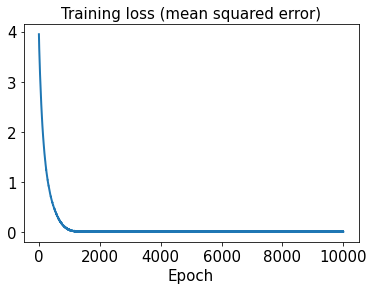

In [85]:
hist3 = history3.history
plt.plot(hist3['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

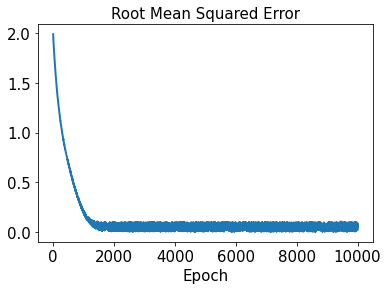

In [86]:
plt.plot(hist3['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [87]:
test_results3 = sd3.evaluate(t_test)

1/1 [==============================] - 0s 105ms/step - loss: 5.6555e-05 - rmse: 0.0000e+00


In [88]:
decoded_train3 = sd3.predict(t_train)

In [89]:
decoded_test3 = sd3.predict(t_test)

In [90]:
error_train_abs3 = np.abs(decoded_train3 - y_train3)

In [91]:
error_test_abs3 = np.abs(decoded_test3 - y_test3)

In [92]:
l2_error_train3 = np.sqrt(np.sum((decoded_train3 - y_train3)**2) / np.sum(y_train3**2))
print(l2_error_train3)

0.420557623125443


In [93]:
l2_error_test3 = np.sqrt(np.sum((decoded_test3 - y_test3)**2) / np.sum(y_test3**2))
print(l2_error_test3)

0.41867299958918613


In [94]:
l2_error_train_list3 = []
for i in range(0, len(x_train3)):
    l2_error_train_data3 = np.sqrt(np.sum((decoded_train3[i] - y_train3[i])**2) / np.sum(y_train3[i]**2))
    l2_error_train_list3.append(l2_error_train_data3)
print(l2_error_train_list3)

[0.37113680910732527, 0.45302047862381994, 0.2358981899808904, 0.29106694169225505, 0.12200230483150475, 0.3761103246383045, 0.1970025642852283, 0.5086386616060249, 0.16079724012676763, 0.6582379461095799, 0.6066910961933369, 0.5418847955073847, 0.2771855625545913, 0.47676464631397664, 0.31852964058883054, 0.5480798690086124, 0.41555671255826077, 0.05327158646939143, 0.5395116367852002, 0.46165645139796224, 0.7649539091377575, 0.5205487297154172, 0.7116578566875549, 0.12659102904258426, 0.5570456994983449, 0.3482579958745618, 0.08841006914395928, 0.08961645697264724, 0.008205555849911101, 0.42825822312690554, 0.23071711363971162, 0.32620696669135224, 0.8064078861139228]


In [95]:
l2_error_test_list3 = []
for i in range(0, len(x_test3)):
    l2_error_test_data3 = np.sqrt(np.sum((decoded_test3[i] - y_test3[i])**2) / np.sum(y_test3[i]**2))
    l2_error_test_list3.append(l2_error_test_data3)
print(l2_error_test_list3)

[0.16069114815818653, 0.2620396704325182, 0.4017659411243483, 0.1970979281771415, 0.499639596367422, 0.8693882155539618, 0.0626539616271396, 0.8418713678779561]


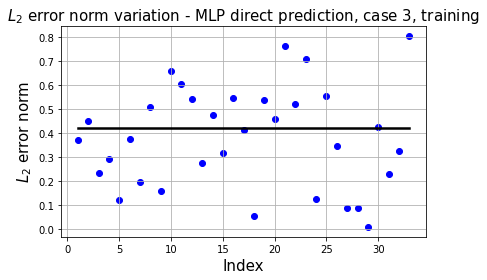

In [111]:
plt.plot(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train3*np.ones(x_train3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train3.shape[0], x_train3.shape[0]), l2_error_train_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

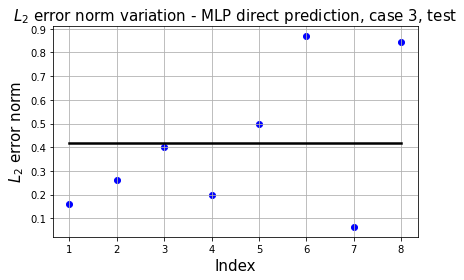

In [112]:
plt.plot(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test3*np.ones(x_test3.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test3.shape[0], x_test3.shape[0]), l2_error_test_list3, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - MLP direct prediction, case 3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

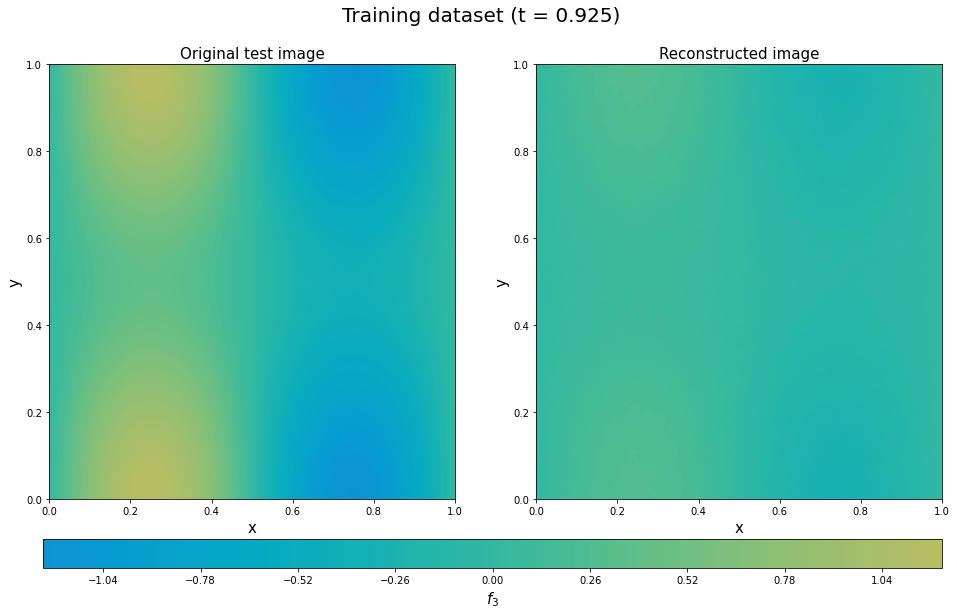

In [98]:
plt.figure(figsize=(16, 8))
y_train3_20_rotate = y_train3[20].T.reshape(101,101)
decoded_rotate3 = decoded_train3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_20_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[37]),fontsize=20)
plt.show()

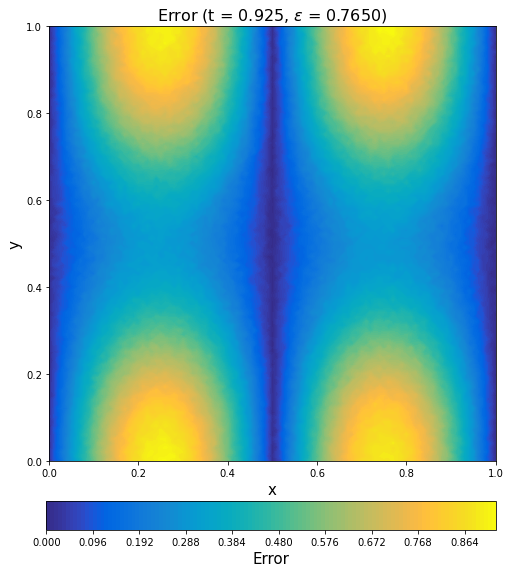

In [99]:
error_train_abs3_rotate20 = error_train_abs3[20].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate20, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.925, $\epsilon$ = %.4f)' %(l2_error_train_list3[20]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

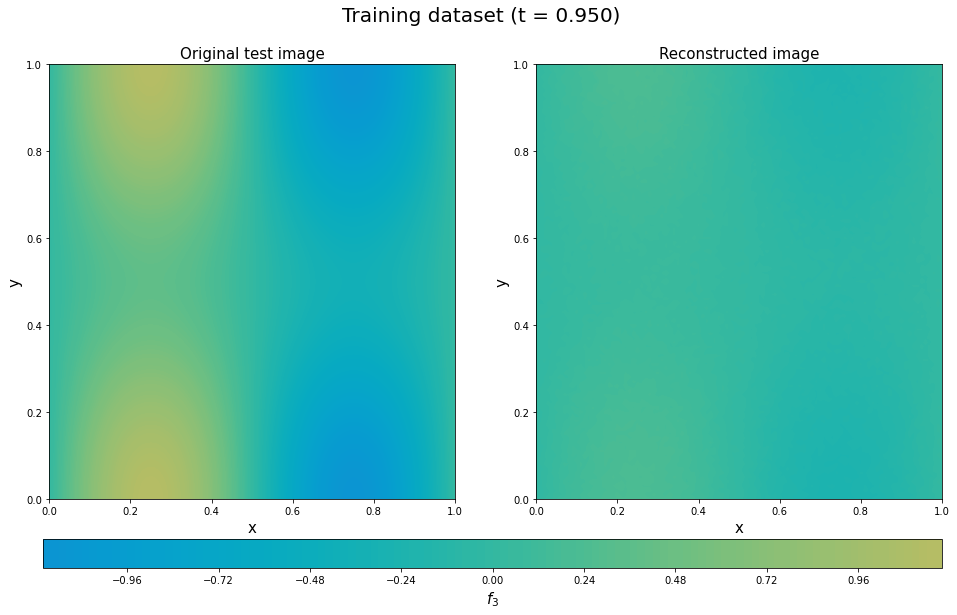

In [100]:
plt.figure(figsize=(16, 8))
y_train3_32_rotate = y_train3[32].T.reshape(101,101)
decoded_rotate3 = decoded_train3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_train3_32_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Training dataset (t = %.3f)' %(t[38]), fontsize=20)
plt.show()

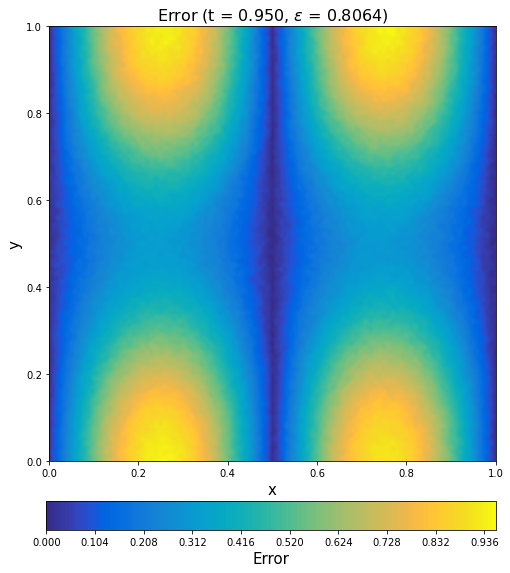

In [101]:
error_train_abs3_rotate32 = error_train_abs3[32].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train_abs3_rotate32, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.950, $\epsilon$ = %.4f)' %(l2_error_train_list3[32]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)
#cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

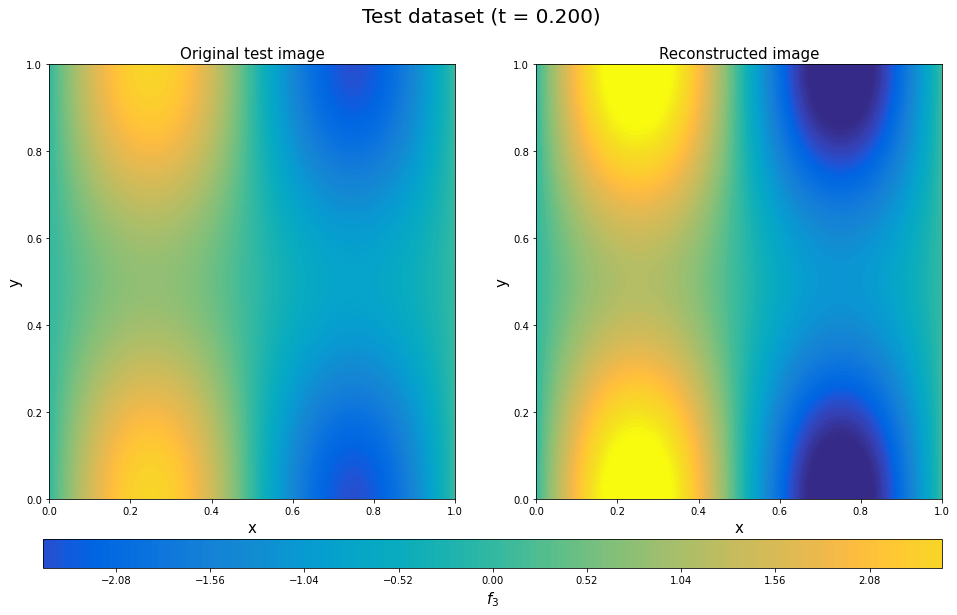

In [102]:
plt.figure(figsize=(16, 8))
y_test3_2_rotate = y_test3[2].T.reshape(101,101)
decoded_rotate3 = decoded_test3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_2_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[8]),fontsize=20)
plt.show()

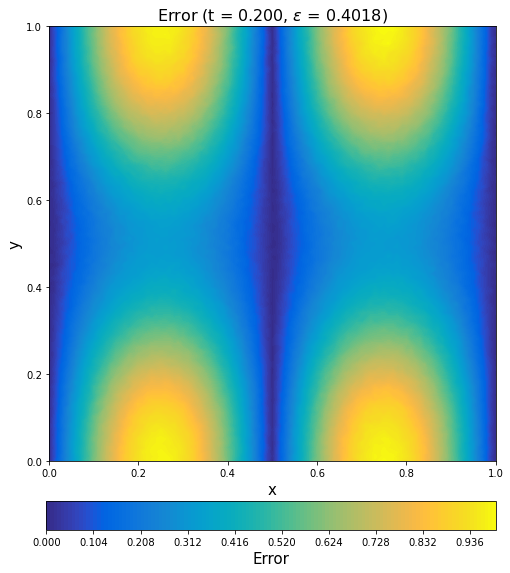

In [103]:
error_test_abs3_rotate2 = error_test_abs3[2].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate2, levels=128, cmap=parula_map)
ax5.set_title(r'Error (t = 0.200, $\epsilon$ = %.4f)' %(l2_error_test_list3[2]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()

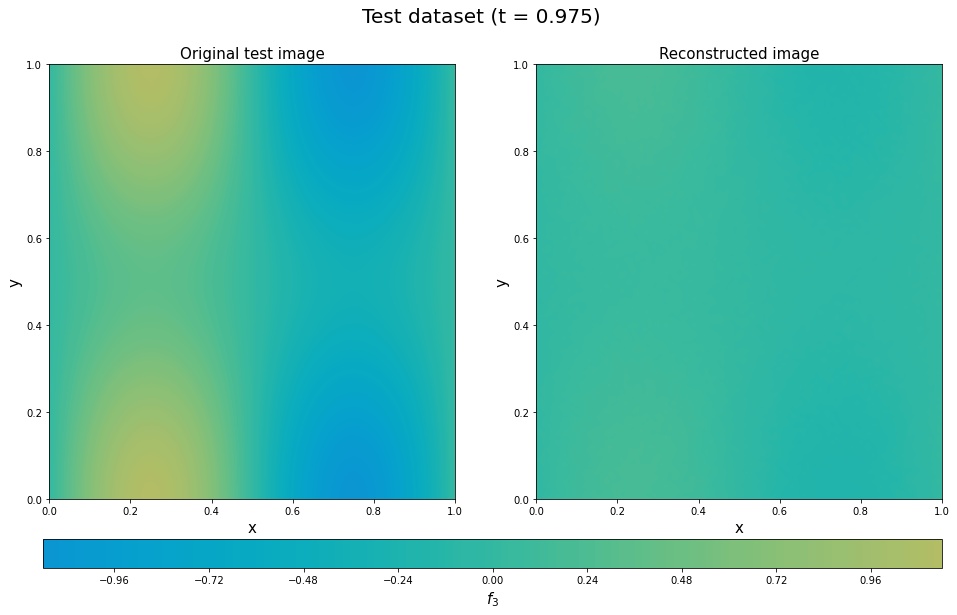

In [104]:
plt.figure(figsize=(16, 8))
y_test3_7_rotate = y_test3[7].T.reshape(101,101)
decoded_rotate3 = decoded_test3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

ax = plt.subplot(1, 2, 1)
a1 = plt.contourf(xmesh, ymesh, y_test3_7_rotate, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate3, levels=128, cmap=cmap)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-3.0,3.0)
a2.set_clim(-3.0,3.0)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('$f_3$', fontsize=15)

plt.suptitle(r'Test dataset (t = %.3f)' %(t[39]),fontsize=20)
plt.show()

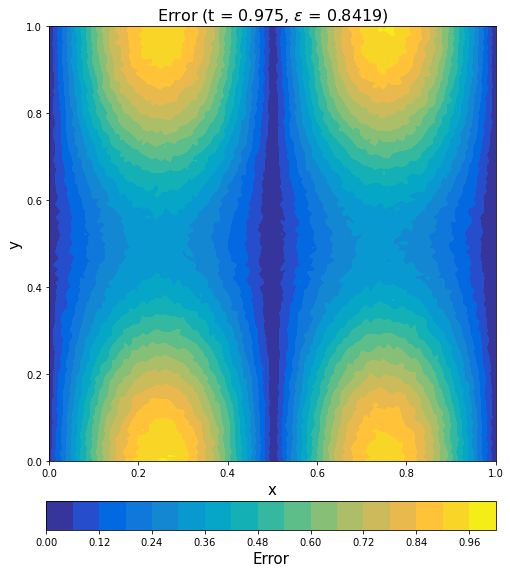

In [105]:
error_test_abs3_rotate7 = error_test_abs3[7].T.reshape(101,101)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate7, levels=16, cmap=parula_map)
ax5.set_title(r'Error (t = 0.975, $\epsilon$ = %.4f)' %(l2_error_test_list3[7]), fontsize=16)
ax5.set_xlabel('x', fontsize=15)
ax5.set_ylabel('y', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()